### Import the Necessary Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
%matplotlib inline
import os

In [2]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

## Pandas Rows and columns configuration:

In [3]:
## set this display max columns and rows as 300,assuming max rows and columns can be 300.
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## 1. Read CSV Files from Dataset Directory:

In [4]:
## get the current directory path
os.getcwd()

'C:\\Users\\Gayathri\\Desktop\\UpGrad\\CREDIT-EDA\\Credit-EDA'

In [5]:
## go to the datsets directory in current path 
file_path = os.path.join(os.getcwd(), os.getcwd()+"/Datasets", "application_data.csv")

In [6]:
file_path

'C:\\Users\\Gayathri\\Desktop\\UpGrad\\CREDIT-EDA\\Credit-EDA/Datasets\\application_data.csv'

In [7]:
## read the csv file
application_dataset = pd.read_csv(file_path)

In [8]:
application_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2. Structure of the Dataset :

In [9]:
# Finding the no.of Columns & Rows in the dataset:
application_dataset.shape

(307511, 122)

#### From the Shape,there are 307511 rows and 122 columns, in the application_dataset.

In [10]:
# Finding the Totoal records,Column, emtries & data types:
application_dataset.info(max_cols = 300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [11]:
# Columns in the dataset
application_dataset.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [12]:
# Statistical Summary of the numerical columns:
application_dataset.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## 3. Data Quality Check & Missing Values:


### 3.1 Missing values Identification :

In [13]:
#Calculate the Missing values percentage:
#formula = (missing values in each row/ total rows) * 100 for each and every column.

missing_values = (application_dataset.isnull().sum()/len(application_dataset)) * 100

In [14]:
missing_values

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

### 3.2 Dropping the Columns having null percentage above 50%.

In [15]:
## drop the columns whenever missing values greater than 40% because we cant use these for analysis

columns_to_drop = application_dataset.columns[application_dataset.isnull().sum() >= (0.50*len(application_dataset))]
len(columns_to_drop)

41

In [16]:
application_dataset.drop(columns_to_drop, inplace = True, axis = 1)

### 3.3 Check the Columns having missing values percentage less than 50

In [17]:
application_dataset.isnull().sum()/len(application_dataset) * 100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

### Null Percentage between 0-5% :

In [18]:
Five_percentage_columns =application_dataset.columns[(application_dataset.isnull().sum() <= (0.05*len(application_dataset)))&(application_dataset.isnull().sum() > (0*len(application_dataset)))]
Five_percentage_columns

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

#### Suggestion :
1.Eliminate the records as missing values percentage greater than 0% and less than or equal to 5% as they donot infur any useful insights in the analysis.


In [19]:
### Use the below code snippet to delete the records:

#columns used : ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE'],
#application_dataset = application_dataset.dropna(subset=Five_percentage_columns).reset_index(drop=True)

### Null Percentage between 5 - 50%:

### Categorical Columns:

In [20]:
## identify the categorical columns
categorical_columns = application_dataset.select_dtypes(include=["bool","object","category"]).columns
categorical_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [21]:
## Null percentage for categorical columns
((application_dataset[categorical_columns].isnull().sum())/len(application_dataset))*100

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.345545
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
EMERGENCYSTATE_MODE           47.398304
dtype: float64

### OCCUPATION_TYPE :

Unique Values & Counts:
 Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64


<AxesSubplot:>

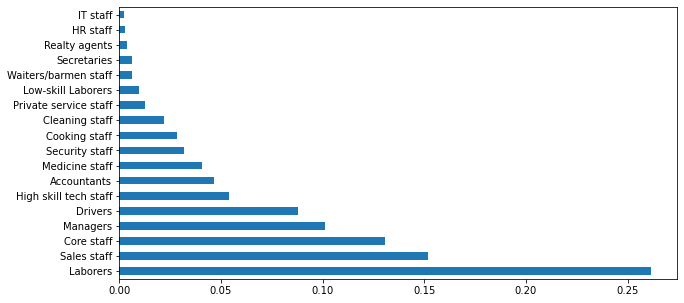

In [22]:
print("Unique Values & Counts:\n", application_dataset["OCCUPATION_TYPE"].value_counts(normalize = True) )
application_dataset["OCCUPATION_TYPE"].value_counts(normalize = True).plot.barh(figsize = (10,5))

### Insights:
1. Laborers is the most frequest & occupies the highest percentage of customers applied for Credit.
2. If the missing values percentage is between 5-13%, Mode is the best method of metric to impute.
3. Here,the missing values percentage is 31.34 & mode might not be the correct imputation metric & deviates the analysis from the original pattern.
4. There is no enough data or source of income and information about the various occupational salary ranges & cannot impute with Laborers.
5. The best technique is to create a new catergoty "Other" and impute the missing values. 

####  Replace the missing value for occupation_type as other_category
##application_dataset["OCCUPATION_TYPE"] = application_dataset["OCCUPATION_TYPE"].fillna("Other_Category")

### EMERGENCYSTATE_MODE

Unique Values & Counts:
 No     0.985608
Yes    0.014392
Name: EMERGENCYSTATE_MODE, dtype: float64


<AxesSubplot:>

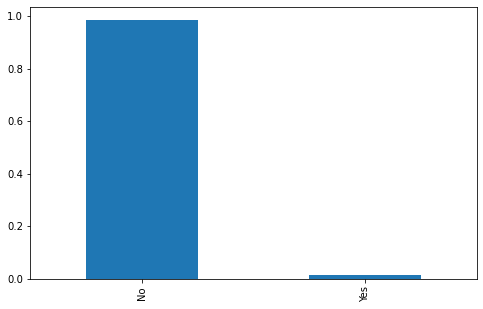

In [23]:
print("Unique Values & Counts:\n", application_dataset["EMERGENCYSTATE_MODE"].value_counts(normalize = True) )
application_dataset["EMERGENCYSTATE_MODE"].value_counts(normalize = True).plot.bar(figsize = (8,5))

#### Insights:
1. Here the the most frequemnt type is mode - 'No', 
2. The mising data is 47.39% & is huge. Hence imputing with 'No' might enhance the inisghts about No category people & might be helful for further analysis.
3. The best technique is to create a new catergoty "Other" and impute missing values. 

####  Replace the missing value for EMERGENCYSTATE_MODE as other_category
##application_dataset["EMERGENCYSTATE_MODE"] = application_dataset["EMERGENCYSTATE_MODE"].fillna("Other_Category")

### Numerical Columns:

In [24]:
numerical_columns = application_dataset.select_dtypes(include=["number"]).columns
numerical_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [25]:
((application_dataset[numerical_columns].isnull().sum())/len(application_dataset))*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0.000000
FLAG_CONT_MOBILE                 0.000000
FLAG_PHONE                       0.000000
FLAG_EMAIL                       0.000000
CNT_FAM_MEMBERS                  0.000650
REGION_RATING_CLIENT             0.000000
REGION_RATING_CLIENT_W_CITY      0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_LIVE_REGION       0.000000
REG_REGION_NOT_WORK_REGION       0

### AMT_REQ_CREDIT_BUREAU_HOUR:

Statistical Summary :
 count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


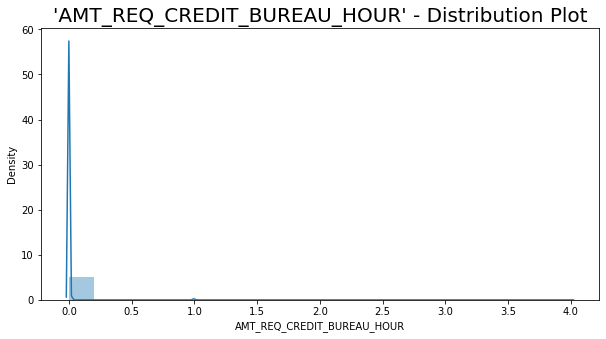

Missing values can be imputed with Average value : 0.006402448193930645


In [26]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].describe())

plt.figure(figsize = (10,5))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_HOUR' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Average value : {application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()}")

In [27]:
## Impute the missing value with mean

## application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'] = application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].mean())

###  AMT_REQ_CREDIT_BUREAU_DAY

Statistical Summary :
 count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


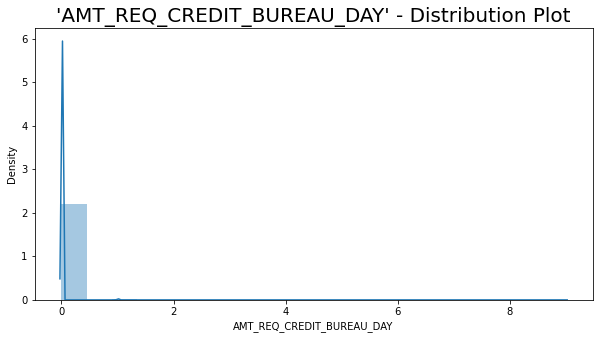

Missing values can be imputed with Average Column value : 0.0070002105326475985


In [28]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].describe())

plt.figure(figsize = (10,5))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_DAY' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Average Column value : {application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].mean()}")

In [29]:
## Impute the missing value for occupation_type as other_category
## application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'] = application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].mean())

### AMT_REQ_CREDIT_BUREAU_WEEK

Statistical Summary :
 count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


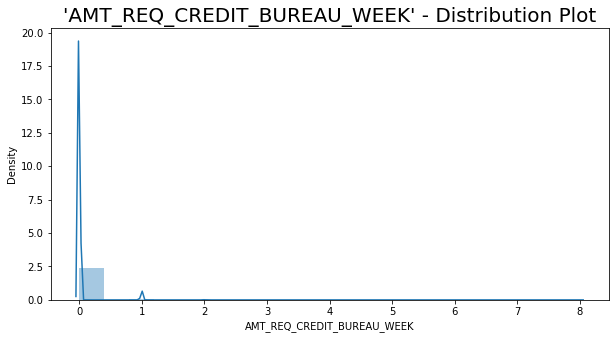

Missing values can be imputed with Average Column value : 0.0343619356973142


In [30]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].describe())

plt.figure(figsize = (10,5))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_WEEK' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Average Column value : {application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()}")

In [31]:
## Impute the missing value for occupation_type as other_category
## application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'] = application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].mean())

### AMT_REQ_CREDIT_BUREAU_MON

Statistical Summary :
 count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


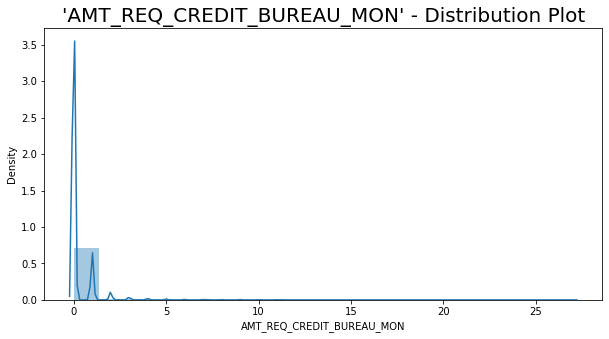

Missing values can be imputed with Average Column value : 0.26739526000781977


In [32]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_MON'].describe())

plt.figure(figsize = (10,5))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_MON'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_MON' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Average Column value : {application_dataset['AMT_REQ_CREDIT_BUREAU_MON'].mean()}")

In [33]:
## Impute the missing value for occupation_type as other_category
## application_dataset['AMT_REQ_CREDIT_BUREAU_MON'] = application_dataset['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_MON'].mean())

### AMT_REQ_CREDIT_BUREAU_QRT

Statistical Summary :
 count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


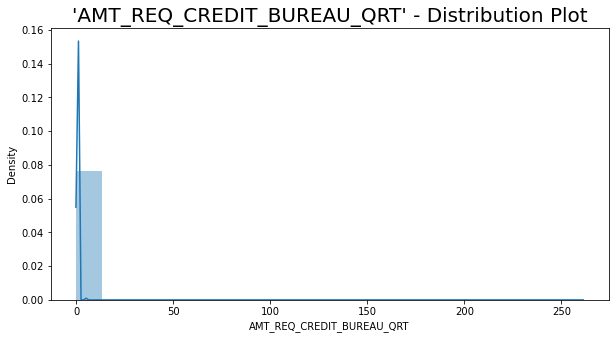

Missing values can be imputed with Average Column value : 0.26547414959848414


In [34]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'].describe())

plt.figure(figsize = (10,5))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_QRT' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Average Column value : {application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'].mean()}")

In [35]:
## Impute the missing value for occupation_type as other_category
## application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'] = application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'].mean())

### AMT_REQ_CREDIT_BUREAU_YEAR

Statistical Summary :
 count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


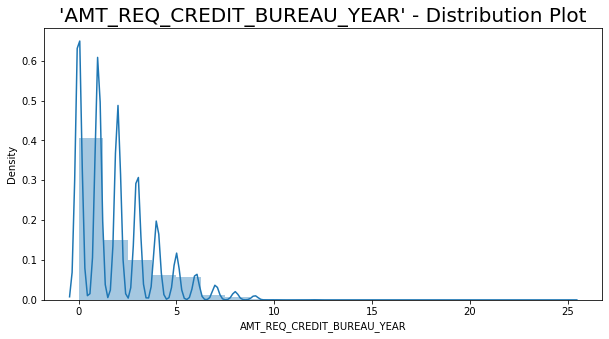

Missing values can be imputed with Average Column value : 1.899974435321363


In [36]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].describe())

plt.figure(figsize = (10,5))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_YEAR' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Average Column value : {application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()}")

In [37]:
## Impute the missing value for occupation_type as other_category
## application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'] = application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].mean())

### 3.4. Sanity Check

### 3.4.1 Typecast DataTypes:

In [38]:
application_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [39]:
application_dataset.nunique().sort_values()

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

In [40]:
# To Convert object to Numeric:
# application_dataset[''] = pd.to_numeric(application_dataset[''], error = 'coerce')

In [41]:
application_dataset['DAYS_BIRTH'] = application_dataset['DAYS_BIRTH'].astype(int)
application_dataset['DAYS_EMPLOYED'] = application_dataset['DAYS_EMPLOYED'].astype(int)
application_dataset['DAYS_REGISTRATION'] = application_dataset['DAYS_REGISTRATION'].astype(int)
application_dataset['DAYS_ID_PUBLISH'] = application_dataset['DAYS_ID_PUBLISH'].astype(int)

application_dataset['LIVE_CITY_NOT_WORK_CITY'] = application_dataset['LIVE_CITY_NOT_WORK_CITY'].astype('str')
application_dataset['REG_CITY_NOT_WORK_CITY'] = application_dataset['REG_CITY_NOT_WORK_CITY'].astype('str')
application_dataset['REG_CITY_NOT_LIVE_CITY'] = application_dataset['REG_CITY_NOT_WORK_CITY'].astype('str')
application_dataset['LIVE_REGION_NOT_WORK_REGION'] = application_dataset['LIVE_CITY_NOT_WORK_CITY'].astype('str')
application_dataset['REG_REGION_NOT_WORK_REGION'] = application_dataset['REG_CITY_NOT_WORK_CITY'].astype('str')
application_dataset['REG_REGION_NOT_LIVE_REGION'] = application_dataset['REG_CITY_NOT_WORK_CITY'].astype('str')
application_dataset['FLAG_EMAIL'] = application_dataset['FLAG_EMAIL'].astype('str')
application_dataset['FLAG_CONT_MOBILE'] = application_dataset['FLAG_CONT_MOBILE'].astype('str')
application_dataset['FLAG_WORK_PHONE'] = application_dataset['FLAG_WORK_PHONE'].astype('str')
application_dataset['FLAG_EMP_PHONE'] = application_dataset['FLAG_EMP_PHONE'].astype('str')
application_dataset['FLAG_MOBIL'] = application_dataset['FLAG_MOBIL'].astype('str')
application_dataset['FLAG_PHONE'] = application_dataset['FLAG_PHONE'].astype('str')


#application_dataset['CNT_FAM_MEMBERS'] = application_dataset['CNT_FAM_MEMBERS'].astype(int)
#application_dataset['DAYS_LAST_PHONE_CHANGE'] = application_dataset['DAYS_LAST_PHONE_CHANGE'].astype(int)
#application_dataset['OBS_30_CNT_SOCIAL_CIRCLE'] = application_dataset['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int)                     
#application_dataset['OBS_60_CNT_SOCIAL_CIRCLE'] = application_dataset['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int)
#application_dataset['DEF_30_CNT_SOCIAL_CIRCLE'] = application_dataset['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int)                     
#application_dataset['DEF_60_CNT_SOCIAL_CIRCLE'] = application_dataset['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int)
#application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'] = application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int)
#application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'] = application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int)
#application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'] = application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int)
#application_dataset['AMT_REQ_CREDIT_BUREAU_MON'] = application_dataset['AMT_REQ_CREDIT_BUREAU_MON'].astype(int)
#application_dataset['AMT_REQ_CREDIT_BUREAU_QTR'] = application_dataset['AMT_REQ_CREDIT_BUREAU_QTR'].astype(int)
#application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'] = application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int)

### 3.4.1 Convertion of  Negative data in Day & :

In [42]:
# Finding thte negative values using Statistics of all the columns :
application_dataset.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120327,-2994.202373,2.152665,2.052463,2.031521,12.063419,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.910682,0.509034,0.502737,3.265832,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,2.000000,2.000000,10.000000,3.924574e-01,0.370650,0.976700,0.166700,0.976700,0.166700,0.976700,0.166700,0.041200,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [43]:
application_dataset['DAYS_BIRTH'] = application_dataset['DAYS_BIRTH'].abs()
application_dataset['DAYS_EMPLOYED'] = application_dataset['DAYS_EMPLOYED'].abs()
application_dataset['DAYS_REGISTRATION'] = application_dataset['DAYS_REGISTRATION'].abs()
application_dataset['DAYS_ID_PUBLISH'] = application_dataset['DAYS_ID_PUBLISH'].abs()
application_dataset['DAYS_LAST_PHONE_CHANGE'] = application_dataset['DAYS_LAST_PHONE_CHANGE'].abs()

#### Why should we convert the above columns into positive values:
For all these columns,Days cannot be negative,hence converted into positive values.

### 3.5 Outliers Detection in Numerical Columns:

### CNT_CHILDREN

Statistical Summary :
 count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


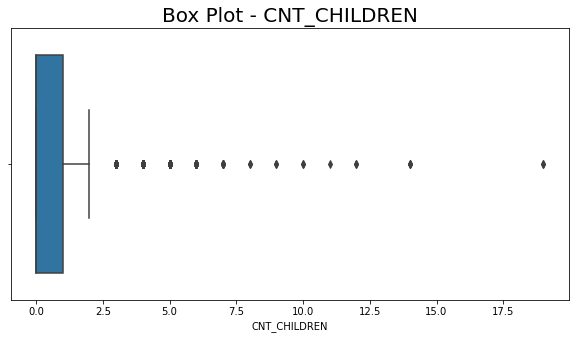

Data points appear above the UPPER_WHISKER 3 can be statistically considered as the Outliers and can be imputed with the upper_Whisker.


In [44]:
print("Statistical Summary :\n",application_dataset['CNT_CHILDREN'].describe())
#print("Unique Values & Counts\n",application_dataset['CNT_CHILDREN'].value_counts(normalize =True) * 100)
plt.figure(figsize = (10,5))

sns.boxplot(application_dataset['CNT_CHILDREN'])
plt.title("Box Plot - CNT_CHILDREN", fontsize = 20 )
plt.show()
Q1 = application_dataset['CNT_CHILDREN'].quantile(0.25)
Q3 = application_dataset['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)
print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers and can be imputed with the upper_Whisker.".format(math.ceil(upper_whisker)))

#### Many data points appear above the UPPER_WHISKER 2.5 can be statistically considered as the Outliers.
#### But in real time,there exists families with 10-12 childern

### AMT_INCOME_TOTAL

Satitistical Summary :
 count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


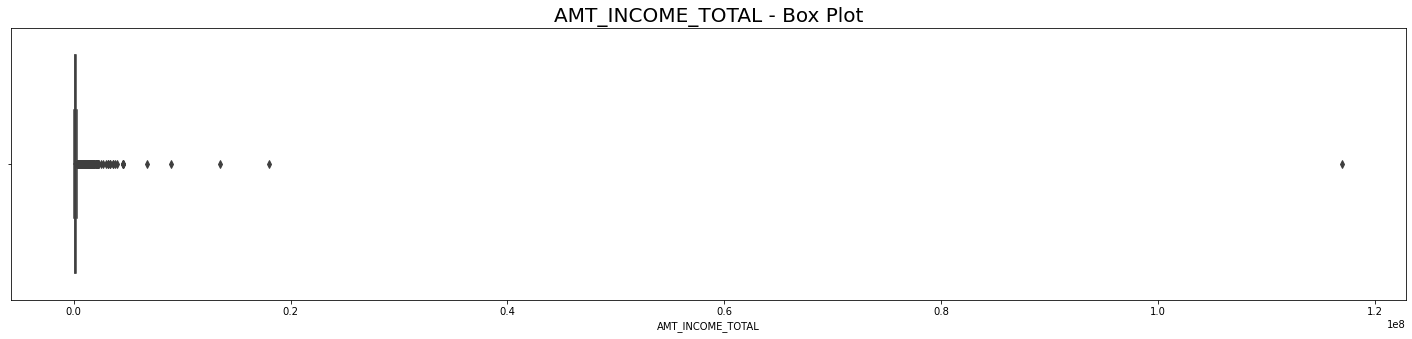

Data points appear above the UPPER_WHISKER 337500.0 can be statistically considered as the Outliers


In [45]:
print("Satitistical Summary :\n",application_dataset['AMT_INCOME_TOTAL'].describe())
plt.figure(figsize = (25,5))

sns.boxplot(application_dataset['AMT_INCOME_TOTAL'])
plt.title("AMT_INCOME_TOTAL - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = application_dataset['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers".format(upper_whisker))

#### Many data points appear above the UPPER_WHISKER 337500.0 are clustered and one data is tto far away.
#### But in real time the Income has no boundaries and can be high for different Income Types.

### AMT_CREDIT

 Statistical Summary :
 count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


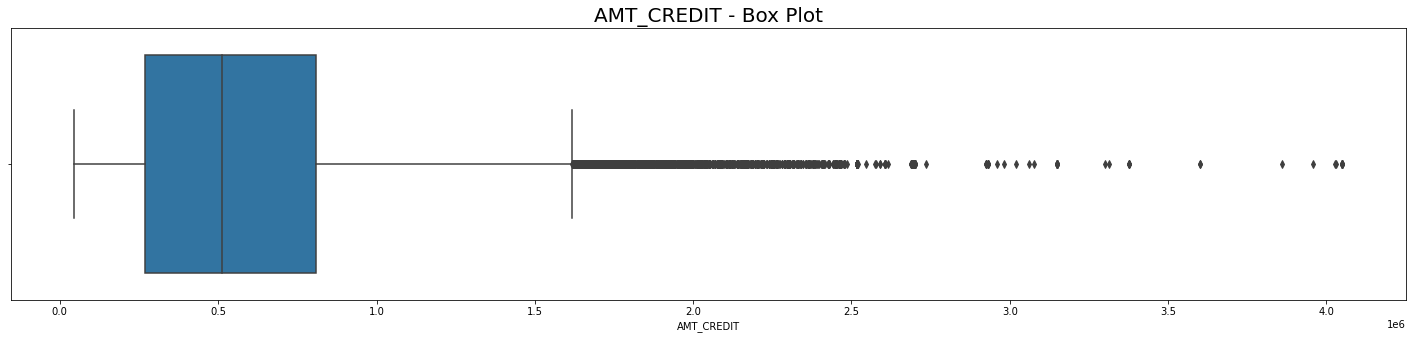

Data points appear above the UPPER_WHISKER 1616625.0 can be statistically considered as the Outliers.


In [46]:
print(" Statistical Summary :\n",application_dataset['AMT_CREDIT'].describe())
plt.figure(figsize = (25,5))

sns.boxplot(application_dataset['AMT_CREDIT'])
plt.title("AMT_CREDIT - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_CREDIT'].quantile(0.25)
Q3 = application_dataset['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))

#### Many data points appear to be clustered above the UPPER_WHISKER 1616625.0  and many far away from the Upper_WHISKER.
#### But these values cannot be considered as outliers in real time as the Credit amount might be high for high Income groups

### AMT_ANNUITY

 Statistical Summary :
 count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


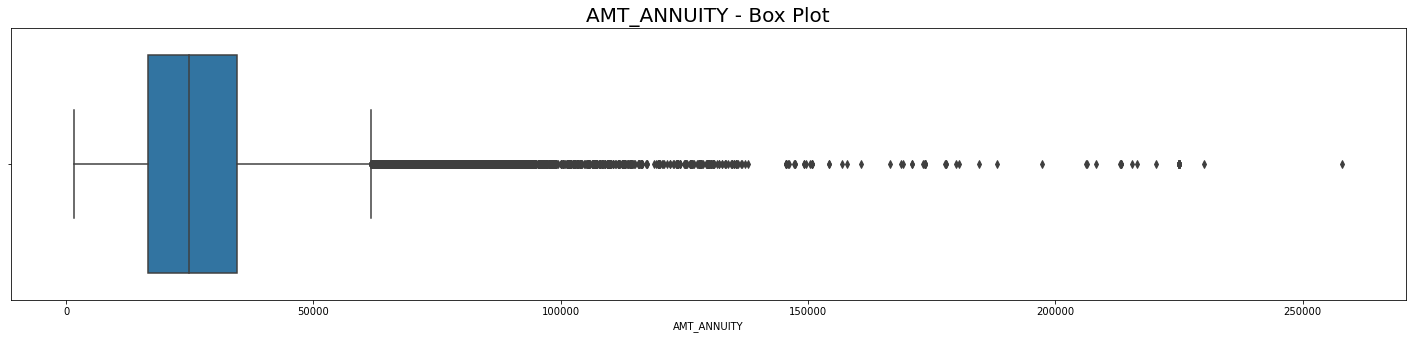

Data points appear above the UPPER_WHISKER 61704.0 can be statistically considered as the Outliers.


In [47]:
print(" Statistical Summary :\n",application_dataset['AMT_ANNUITY'].describe())
plt.figure(figsize = (25,5))

sns.boxplot(application_dataset['AMT_ANNUITY'])
plt.title("AMT_ANNUITY - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_ANNUITY'].quantile(0.25)
Q3 = application_dataset['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))

#### Many Data points are clustered above the Upper Whisker and many appear to be far away.
#### These Annuity data points  are based on the Credit_Amount and cannot be considered as Outliers

###  AMT_GOODS_PRICE

 Statistical Summary :
 count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


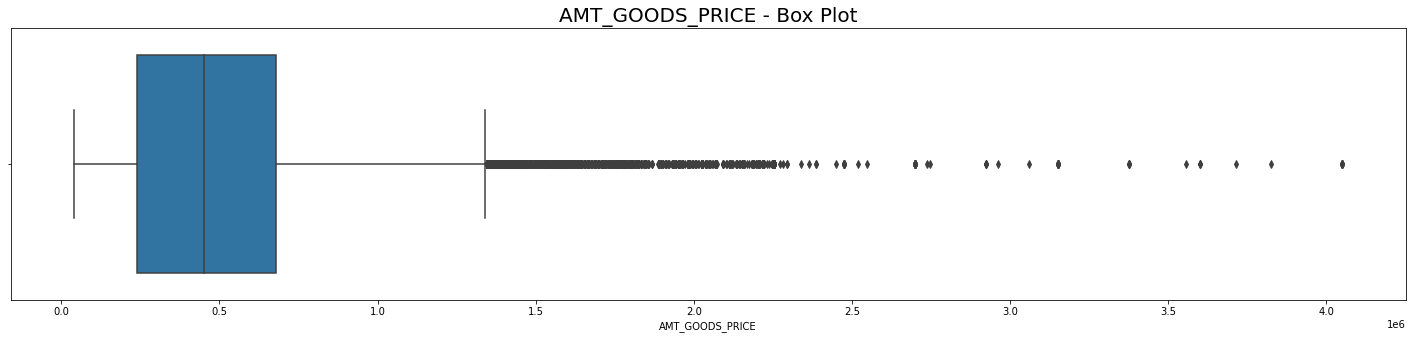

Data points appear above the UPPER_WHISKER 1341000.0 can be statistically considered as the Outliers.


In [48]:
print(" Statistical Summary :\n",application_dataset['AMT_GOODS_PRICE'].describe())
plt.figure(figsize = (25,5))

sns.boxplot(application_dataset['AMT_GOODS_PRICE'])
plt.title("AMT_GOODS_PRICE - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = application_dataset['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))

#### Many Data Points are clustered above UpperWhisker and far away from the upper Whisker
#### These points cannot be cosidered as Outliers as we do not enough source related to the Goods Categories & its Price to prove that this data points are outliers 

### DAYS_EMPLOYED

 Statistical Summary :
 count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


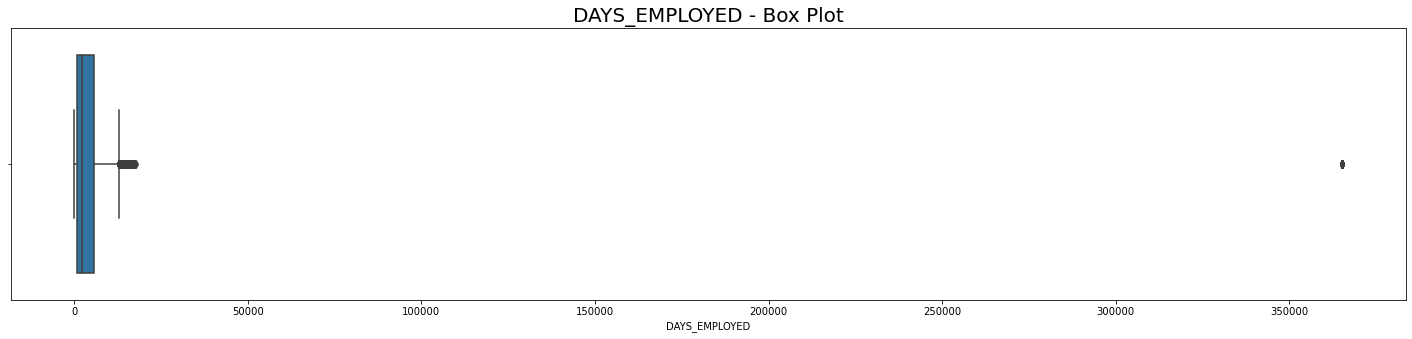

Data points appear above the UPPER_WHISKER 12868.0 can be statistically considered as the Outliers.


In [49]:
print(" Statistical Summary :\n",application_dataset['DAYS_EMPLOYED'].describe())
plt.figure(figsize = (25,5))

sns.boxplot(application_dataset['DAYS_EMPLOYED'])
plt.title("DAYS_EMPLOYED - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['DAYS_EMPLOYED'].quantile(0.25)
Q3 = application_dataset['DAYS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)
employed_max = application_dataset['DAYS_EMPLOYED'].max()

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))

#### Some data points are clusteres above the Upper Whisker & one data point is very far from the Upper Whisker.
####  Max Value of Days_Employed is 365243.0 insignificant as Days_Employed cannot exceed the Max DAYS_BIRTH 25229.0
#### This value should be considered as Outlier and replaced with "      " 

In [50]:
#print("No.of Records with Max Value is : ",len(application_dataset[application_dataset['DAYS_EMPLOYED'] == application_dataset['DAYS_EMPLOYED'].max()]))
#application_dataset[application_dataset['DAYS_EMPLOYED'] == application_dataset['DAYS_EMPLOYED'].max()]

### 3.6 Binning 2 Numerical Continous Variable:

### AMT_INCOME_TOTAL

In [51]:
application_dataset['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

#### Binning AMT_INCOME_TOTAL into AMT_INCOME_TOTAL_bin so we don't loose data and have binned values

Low          100576
High          82213
Very High     71538
medium        53182
Name: AMT_INCOME_TOTAL_bin, dtype: int64


<AxesSubplot:>

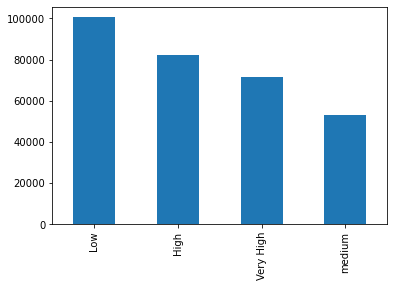

In [52]:
# AMT_INCOME_TOTAL
min = application_dataset['AMT_INCOME_TOTAL'].min()
q1 = application_dataset['AMT_INCOME_TOTAL'].quantile(0.25)
q2 = application_dataset['AMT_INCOME_TOTAL'].quantile(0.50)
q3 = application_dataset['AMT_INCOME_TOTAL'].quantile(0.75)
max  = application_dataset['AMT_INCOME_TOTAL'].max()

application_dataset['AMT_INCOME_TOTAL_bin'] = pd.cut(application_dataset['AMT_INCOME_TOTAL'],
                                                     bins = [min ,q1, q2, q3, max ], 
                                                     labels = ['Low', 'medium', 'High','Very High'])
print(application_dataset['AMT_INCOME_TOTAL_bin'].value_counts())
application_dataset['AMT_INCOME_TOTAL_bin'].value_counts().plot.bar()

### AMT_CREDIT

In [53]:
application_dataset['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

#### Binning AMT_CREDIT into AMT_CREDIT_bin so we don't loose data and have binned values

Low          78191
High         77786
Very High    75876
medium       75428
Name: AMT_CREDIT_bin, dtype: int64


<AxesSubplot:>

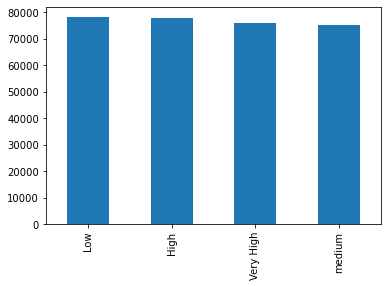

In [54]:
# AMT_CREDIT
min = application_dataset['AMT_CREDIT'].min()
q1 = application_dataset['AMT_CREDIT'].quantile(0.25)
q2 = application_dataset['AMT_CREDIT'].quantile(0.50)
q3 = application_dataset['AMT_CREDIT'].quantile(0.75)
max  = application_dataset['AMT_CREDIT'].max()

# Binning AMT_INCOME_TOTAL into AMT_INCOME_TOTAL_bin so we don't loose data and have binned values

application_dataset['AMT_CREDIT_bin'] = pd.cut(application_dataset['AMT_CREDIT'],
                                               bins = [min ,q1, q2, q3, max ],
                                               labels = ['Low', 'medium', 'High' , 'Very High'])
print(application_dataset['AMT_CREDIT_bin'].value_counts())
application_dataset['AMT_CREDIT_bin'].value_counts().plot.bar()

## 3.7 Unnecesary / Irrelevant Columns Elimination:

In [55]:
unnecessary_columns = ['SK_ID_CURR','EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 
                       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
                       'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
                       'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
                       'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
                       'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 
                       'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [56]:
len(unnecessary_columns)

31

In [57]:
application_dataset =  application_dataset.drop(unnecessary_columns, axis = 1)

In [58]:
application_dataset.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,High,medium
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Very High,Very High
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,medium,medium
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,1,1,1,1,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,medium,medium


In [59]:
len(application_dataset.columns)

52

#### Reasons for Irrelevant columns : 

####  External sources:
1.These columns are irreleveant because it has the information collected from the external data,since we dont know the exact source from this data collected we cannot get any meaningful insights from them.
#### Flag Documents:
2.Flag documents are the various types of documents provided by customer , since we dont know what types of documents provided by the customer, we can eliminate them completely.
#### Apartment Variables:
3.These are the normalized information from the external source.These might not be helpful in analysis with target variable. 
   
#### Note: I am not eliminating these columns from the original dataset..!!

## 4. Analysis:

### 4.1 Check the data balance Percentage

### Target Variable :

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


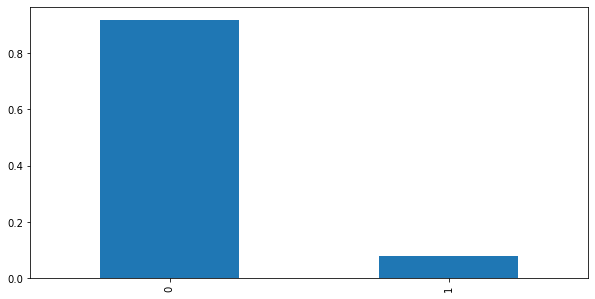

In [60]:
print(application_dataset['TARGET'].value_counts(normalize = True) * 100 )
application_dataset['TARGET'].value_counts(normalize = True).plot.bar(figsize = (10,5))
plt.show()

####  Insights:
1. Data is highly Imbalanced
2. Target  = 0 is 91.93% , Client without Payemnt Diffiluties - Non Default
3. Target  = 1 is 8.07%  , Client with Payment Difficulties -   Default
4. Lets understand how the numerical & categorical variables impact the Approval or denial of the Credit.

### 4.2 Divide / Segment the data into 2  datasets

In [61]:
# Creating 2 seperate datasets with Target == 0  & Target == 1
application_dataset_0 = application_dataset[application_dataset['TARGET'] == 0 ]
application_dataset_1 = application_dataset[application_dataset['TARGET'] == 1 ]

#### 1. Univariate Analysis:
1. Numerical - Histograms ,boxplots,distribution plots
2. Categorical - Bar, pie charts

#### 2. BI variate analysis:
1. numerical to numerical analysis(scatter plots,correlation,pairplots/jointplots)
2. numerical to categorical analysis()
3. categorical to categorical analysis(binning,segmentation)

#### 3. Multi Variate: 
#### 4.heatmap /correlation matrix 
#### 5. Stacked bar chart , stacked bar chart(trend)

### 4.3 Univariate Analysis


### Continuous Numerical  Variables:

In [62]:
application_dataset.select_dtypes(include=["number"]).columns

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

#### AMT_INCOME_TOTAL , AMT_CREDIT

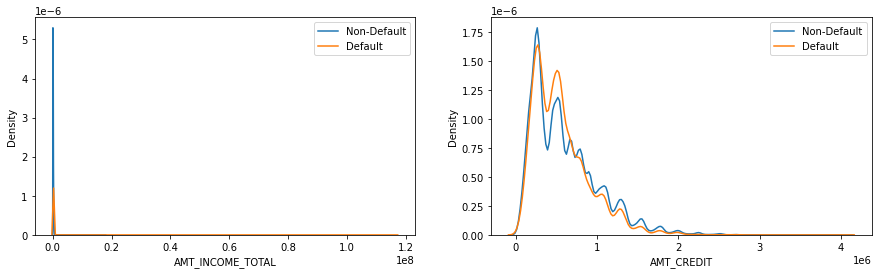

In [63]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.distplot(application_dataset_0['AMT_INCOME_TOTAL'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['AMT_INCOME_TOTAL'] , hist = False , label='Default')
plt.legend() 

plt.subplot(1,2,2)
sns.distplot(application_dataset_0['AMT_CREDIT'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['AMT_CREDIT'] , hist = False , label ='Default')
plt.legend()


#### Insights:

#### AMT_ANNUITY , AMT_GOODS_PRICE

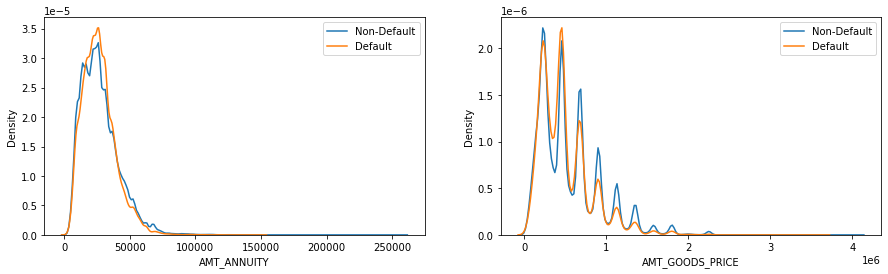

In [64]:
 plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.distplot(application_dataset_0['AMT_ANNUITY'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['AMT_ANNUITY'] , hist = False , label='Default')
plt.legend() 

plt.subplot(1,2,2)
sns.distplot(application_dataset_0['AMT_GOODS_PRICE'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['AMT_GOODS_PRICE'] , hist = False , label ='Default')
plt.legend()

#### Insights:

#### CNT_CHILDREN, CNT_FAM_MEMBERS

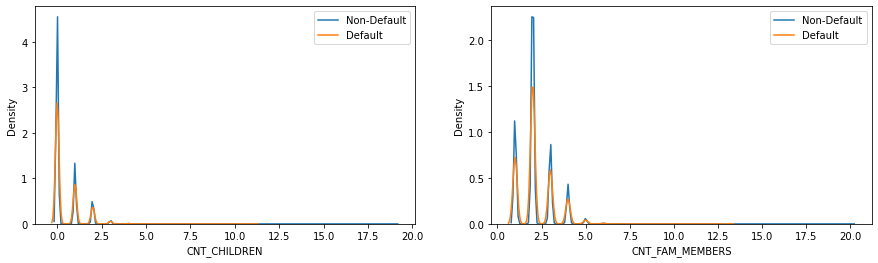

In [65]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.distplot(application_dataset_0['CNT_CHILDREN'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['CNT_CHILDREN'] , hist = False , label='Default')
plt.legend() 

plt.subplot(1,2,2)
sns.distplot(application_dataset_0['CNT_FAM_MEMBERS'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['CNT_FAM_MEMBERS'] , hist = False , label ='Default')
plt.legend()

#### Insights

#### 'REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT'

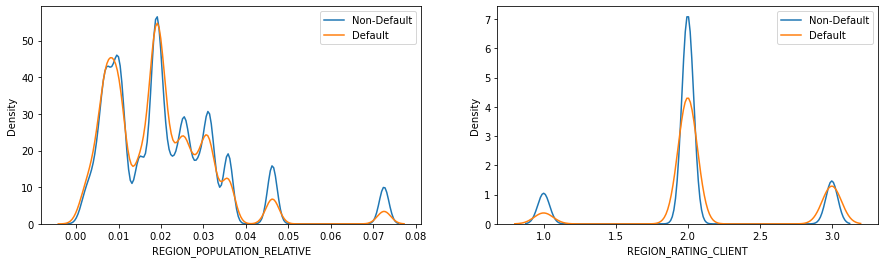

In [66]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.distplot(application_dataset_0['REGION_POPULATION_RELATIVE'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['REGION_POPULATION_RELATIVE'] , hist = False , label='Default')
plt.legend() 

plt.subplot(1,2,2)
sns.distplot(application_dataset_0['REGION_RATING_CLIENT'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['REGION_RATING_CLIENT'] , hist = False , label ='Default')
plt.legend()

#### Insights

#### 'DAYS_BIRTH', 'DAYS_EMPLOYED'

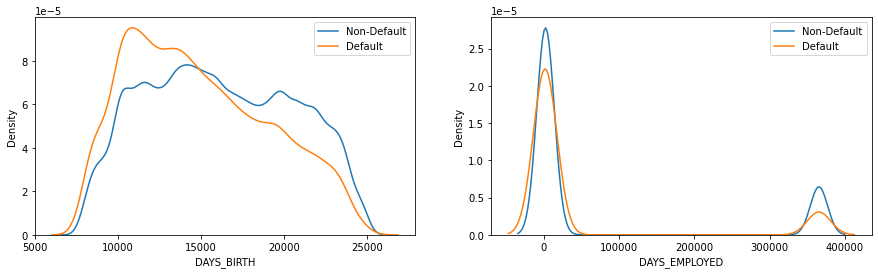

In [67]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.distplot(application_dataset_0['DAYS_BIRTH'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['DAYS_BIRTH'] , hist = False , label='Default')
plt.legend() 

plt.subplot(1,2,2)
sns.distplot(application_dataset_0['DAYS_EMPLOYED'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['DAYS_EMPLOYED'] , hist = False , label ='Default')
plt.legend()

#### Insights:

#### 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'

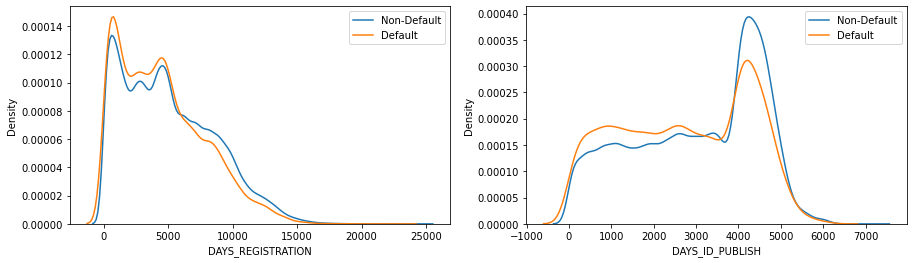

In [68]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.distplot(application_dataset_0['DAYS_REGISTRATION'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['DAYS_REGISTRATION'] , hist = False , label='Default')
plt.legend() 

plt.subplot(1,2,2)
sns.distplot(application_dataset_0['DAYS_ID_PUBLISH'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['DAYS_ID_PUBLISH'] , hist = False , label ='Default')
plt.legend()

####  Insights:

#### 'REGION_RATING_CLIENT_W_CITY'

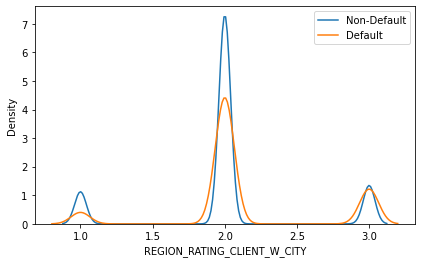

In [69]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.distplot(application_dataset_0['REGION_RATING_CLIENT_W_CITY'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['REGION_RATING_CLIENT_W_CITY'] , hist = False , label='Default')
plt.legend() 


#### Insights:

#### 'HOUR_APPR_PROCESS_START','DAYS_LAST_PHONE_CHANGE'

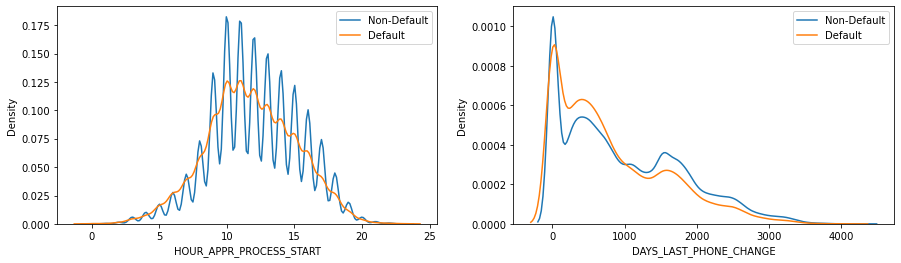

In [70]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.distplot(application_dataset_0['HOUR_APPR_PROCESS_START'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['HOUR_APPR_PROCESS_START'] , hist = False , label='Default')
plt.legend() 

plt.subplot(1,2,2)
sns.distplot(application_dataset_0['DAYS_LAST_PHONE_CHANGE'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['DAYS_LAST_PHONE_CHANGE'] , hist = False , label ='Default')
plt.legend()

#### Insights:

#### 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE' 

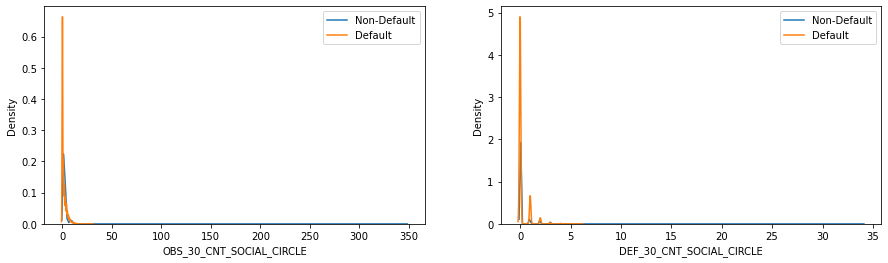

In [71]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.distplot(application_dataset_0['OBS_30_CNT_SOCIAL_CIRCLE'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['OBS_30_CNT_SOCIAL_CIRCLE'] , hist = False , label='Default')
plt.legend() 

plt.subplot(1,2,2)
sns.distplot(application_dataset_0['DEF_30_CNT_SOCIAL_CIRCLE'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['DEF_30_CNT_SOCIAL_CIRCLE'] , hist = False , label ='Default')
plt.legend()

#### Insights :

#### 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',

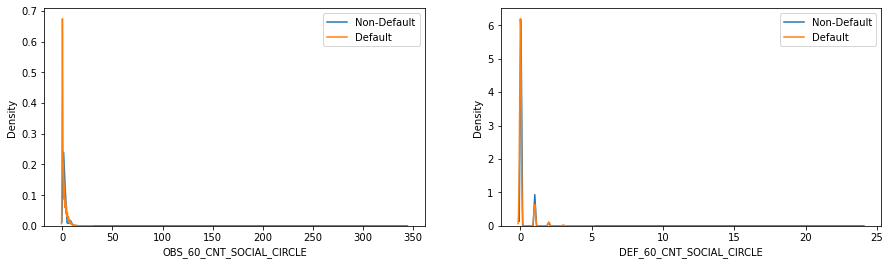

In [72]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.distplot(application_dataset_0['OBS_60_CNT_SOCIAL_CIRCLE'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['OBS_60_CNT_SOCIAL_CIRCLE'] , hist = False , label='Default')
plt.legend() 

plt.subplot(1,2,2)
sns.distplot(application_dataset_0['DEF_60_CNT_SOCIAL_CIRCLE'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['DEF_60_CNT_SOCIAL_CIRCLE'] , hist = False , label ='Default')
plt.legend()

#### Insights:

#### 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY'

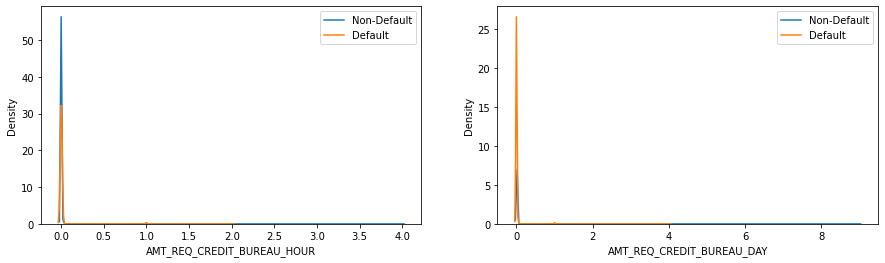

In [73]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.distplot(application_dataset_0['AMT_REQ_CREDIT_BUREAU_HOUR'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['AMT_REQ_CREDIT_BUREAU_HOUR'] , hist = False , label='Default')
plt.legend() 

plt.subplot(1,2,2)
sns.distplot(application_dataset_0['AMT_REQ_CREDIT_BUREAU_DAY'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['AMT_REQ_CREDIT_BUREAU_DAY'] , hist = False , label ='Default')
plt.legend()

#### Insights:

#### 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON'

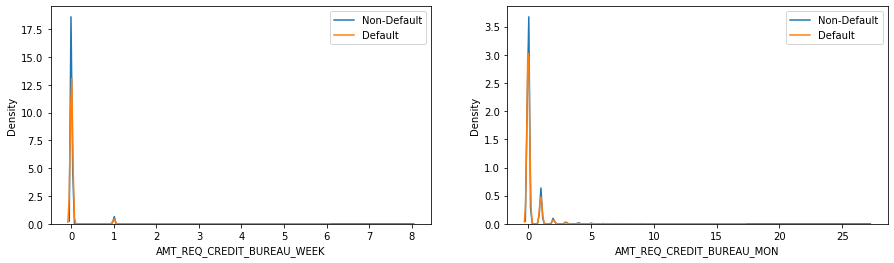

In [74]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.distplot(application_dataset_0['AMT_REQ_CREDIT_BUREAU_WEEK'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['AMT_REQ_CREDIT_BUREAU_WEEK'] , hist = False , label='Default')
plt.legend() 

plt.subplot(1,2,2)
sns.distplot(application_dataset_0['AMT_REQ_CREDIT_BUREAU_MON'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['AMT_REQ_CREDIT_BUREAU_MON'] , hist = False , label ='Default')
plt.legend()

#### Insights:

#### 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR

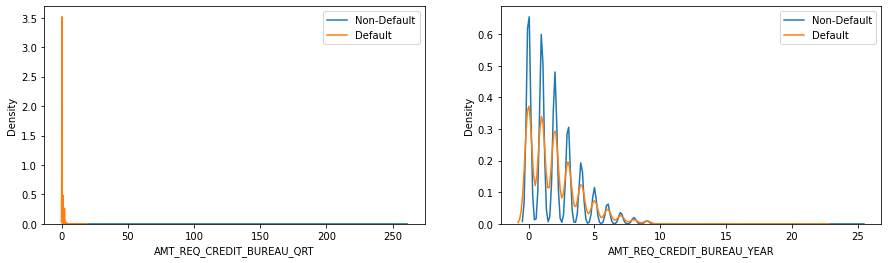

In [75]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.distplot(application_dataset_0['AMT_REQ_CREDIT_BUREAU_QRT'] , hist = False , label='Non-Default')
sns.distplot(application_dataset_1['AMT_REQ_CREDIT_BUREAU_QRT'] , hist = False , label='Default')
plt.legend() 

plt.subplot(1,2,2)
sns.distplot(application_dataset_0['AMT_REQ_CREDIT_BUREAU_YEAR'] , hist = False , label ='Non-Default')
sns.distplot(application_dataset_1['AMT_REQ_CREDIT_BUREAU_YEAR'] , hist = False , label ='Default')
plt.legend()

#### Insights:

### Categorical Columns:

In [76]:
application_dataset.select_dtypes(include=["bool","object","category"]).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'AMT_INCOME_TOTAL_bin', 'AMT_CREDIT_bin'],
      dtype='object')

<AxesSubplot:title={'center':'Default'}, xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

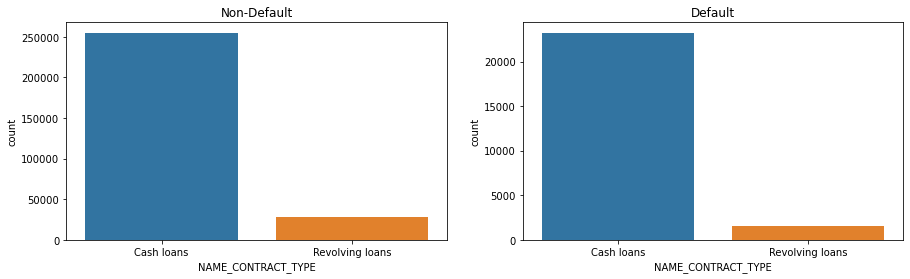

In [77]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['NAME_CONTRACT_TYPE']) 
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['NAME_CONTRACT_TYPE'])
  

#### FLAG_OWN_CAR

<AxesSubplot:title={'center':'Default'}, xlabel='FLAG_OWN_CAR', ylabel='count'>

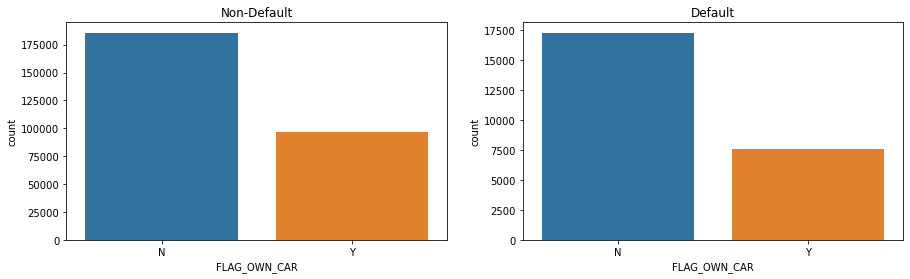

In [78]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['FLAG_OWN_CAR']) 
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['FLAG_OWN_CAR'])

#### Insights:

#### 'FLAG_OWN_REALTY'

<AxesSubplot:title={'center':'Default'}, xlabel='FLAG_OWN_REALTY', ylabel='count'>

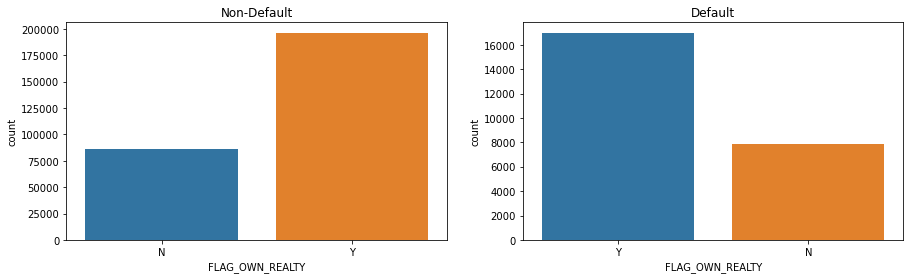

In [79]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['FLAG_OWN_REALTY']) 
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['FLAG_OWN_REALTY'])

#### Insights:

#### 'NAME_TYPE_SUITE'

<AxesSubplot:title={'center':'Default'}, xlabel='NAME_TYPE_SUITE', ylabel='count'>

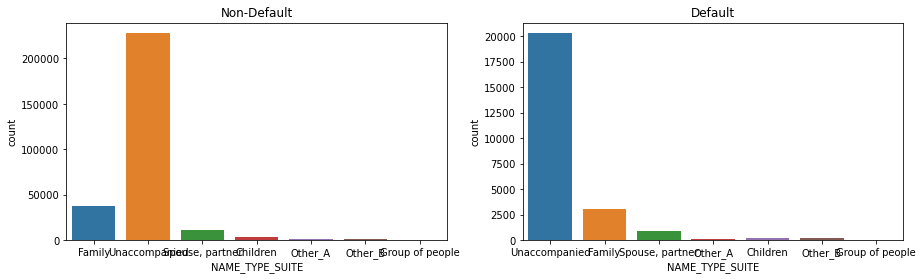

In [80]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['NAME_TYPE_SUITE']) 
plt.xticks(rotation = 90 , fontsize = 12 )

plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['NAME_TYPE_SUITE'])
plt.xticks(rotation = 90 , fontsize = 12 )

plt.show()

#### Insights:

#### 'NAME_INCOME_TYPE'

<AxesSubplot:title={'center':'Default'}, xlabel='NAME_INCOME_TYPE', ylabel='count'>

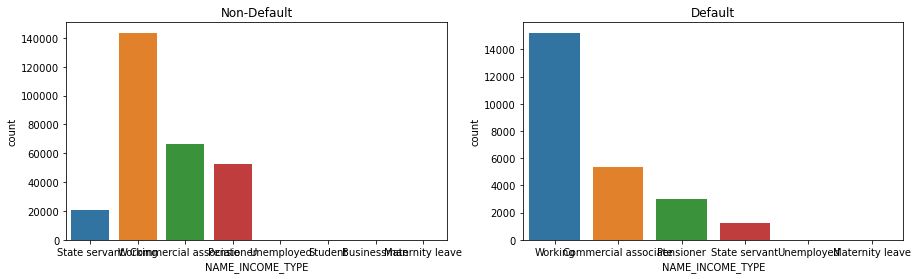

In [81]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['NAME_INCOME_TYPE'])
plt.xticks(rotation = 90 , fontsize = 12 )
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['NAME_INCOME_TYPE'])
plt.xticks(rotation = 90 , fontsize = 12 )

plt.show()

#### Insights:

#### 'NAME_EDUCATION_TYPE'

<AxesSubplot:title={'center':'Default'}, xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

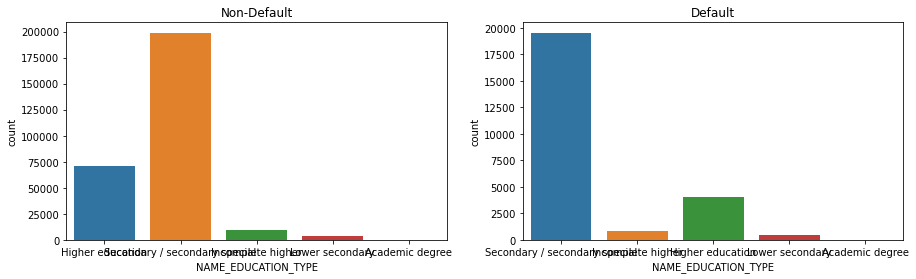

In [82]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['NAME_EDUCATION_TYPE']) 
plt.xticks(rotation = 90 , fontsize = 12 )

plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['NAME_EDUCATION_TYPE'])
plt.xticks(rotation = 90 , fontsize = 12 )

plt.show()

#### Insights:

#### 'NAME_FAMILY_STATUS'

<AxesSubplot:title={'center':'Default'}, xlabel='NAME_FAMILY_STATUS', ylabel='count'>

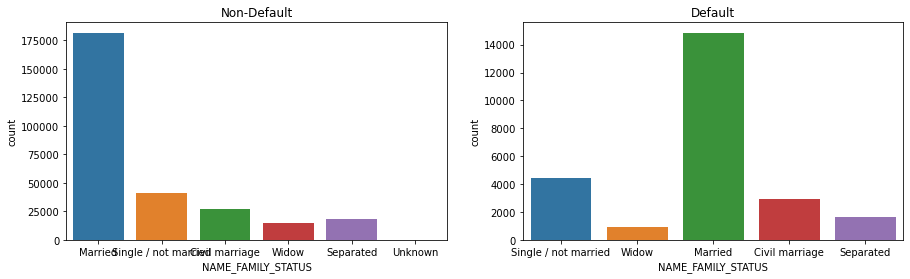

In [83]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['NAME_FAMILY_STATUS']) 
plt.xticks(rotation = 90 , fontsize = 12 )

plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['NAME_FAMILY_STATUS'])
plt.xticks(rotation = 90 , fontsize = 12 )

plt.show()

#### Insights:

#### 'NAME_HOUSING_TYPE'

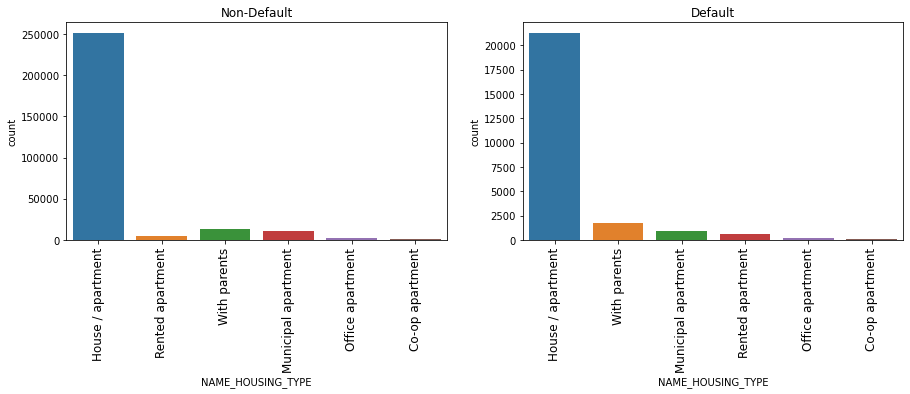

In [171]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['NAME_HOUSING_TYPE']) 
plt.xticks(rotation = 90 , fontsize = 12 )
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['NAME_HOUSING_TYPE'])
plt.xticks(rotation = 90 , fontsize = 12 )

plt.show()

#### Insights:

 #### 'FLAG_MOBIL'

<AxesSubplot:title={'center':'Default'}, xlabel='FLAG_MOBIL', ylabel='count'>

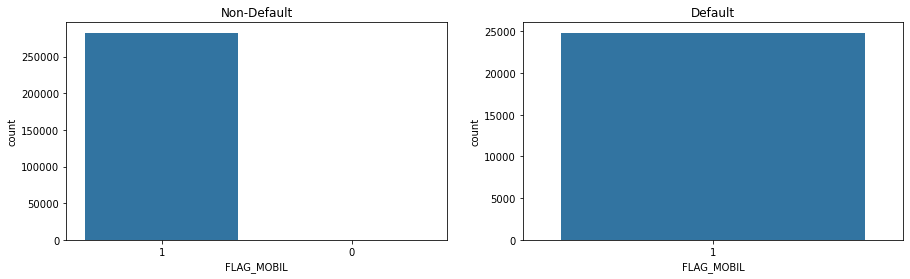

In [85]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['FLAG_MOBIL']) 
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['FLAG_MOBIL'])

#### Insights:

#### 'FLAG_EMP_PHONE'

<AxesSubplot:title={'center':'Default'}, xlabel='FLAG_EMP_PHONE', ylabel='count'>

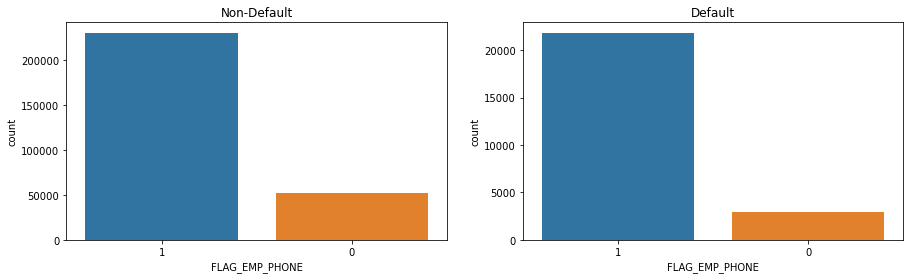

In [86]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['FLAG_EMP_PHONE']) 
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['FLAG_EMP_PHONE'])

#### Insights:

#### 'FLAG_WORK_PHONE

<AxesSubplot:title={'center':'Default'}, xlabel='FLAG_WORK_PHONE', ylabel='count'>

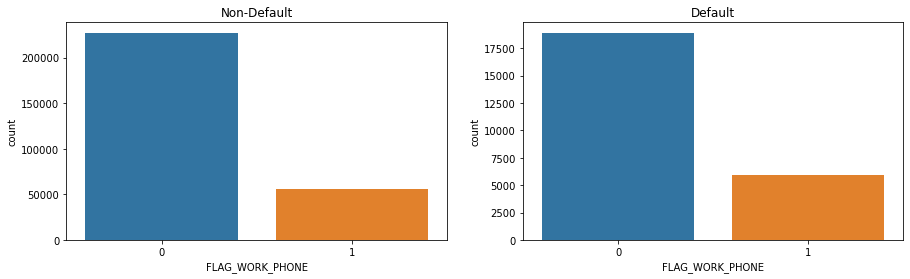

In [87]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['FLAG_WORK_PHONE']) 
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['FLAG_WORK_PHONE'])

#### Insights:

#### 'FLAG_CONT_MOBILE' 

<AxesSubplot:title={'center':'Default'}, xlabel='FLAG_CONT_MOBILE', ylabel='count'>

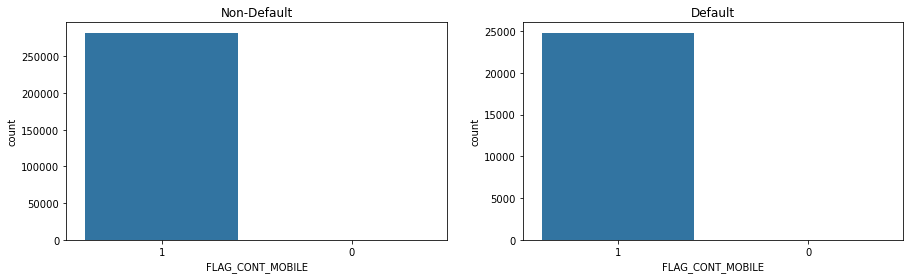

In [88]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['FLAG_CONT_MOBILE']) 
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['FLAG_CONT_MOBILE'])

#### Insights:

#### 'FLAG_PHONE'

<AxesSubplot:title={'center':'Default'}, xlabel='FLAG_PHONE', ylabel='count'>

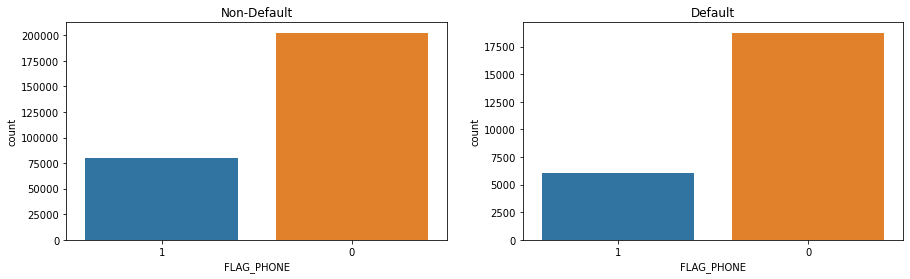

In [89]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['FLAG_PHONE']) 
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['FLAG_PHONE'])

#### Insights:

#### 'FLAG_EMAIL'

<AxesSubplot:title={'center':'Default'}, xlabel='FLAG_EMAIL', ylabel='count'>

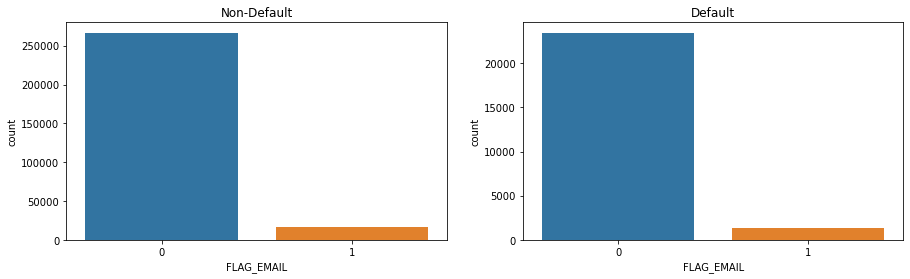

In [90]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['FLAG_EMAIL']) 
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['FLAG_EMAIL'])

#### Insights:

#### 'OCCUPATION_TYPE'

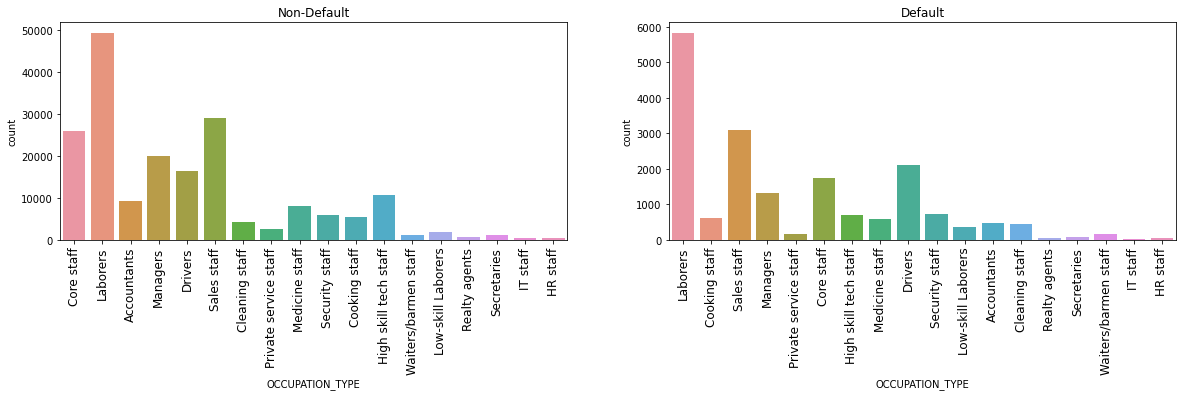

In [170]:
plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['OCCUPATION_TYPE']) 
plt.xticks(rotation = 90 , fontsize = 12 )

plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['OCCUPATION_TYPE'])
plt.xticks(rotation = 90 , fontsize = 12 )

plt.show()

#### Insights:

#### 'WEEKDAY_APPR_PROCESS_START'

<AxesSubplot:title={'center':'Default'}, xlabel='WEEKDAY_APPR_PROCESS_START', ylabel='count'>

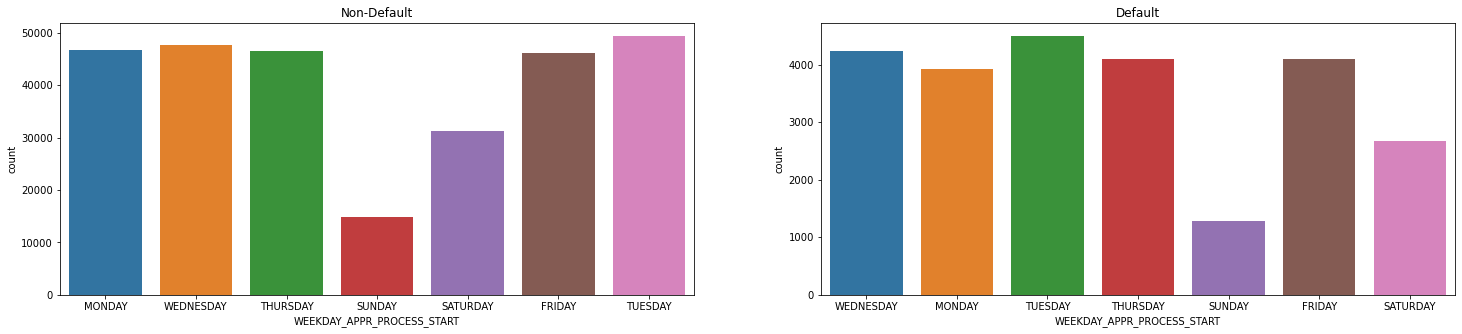

In [169]:
plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['WEEKDAY_APPR_PROCESS_START']) 
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['WEEKDAY_APPR_PROCESS_START'])

#### Insights:

#### 'ORGANIZATION_TYPE'

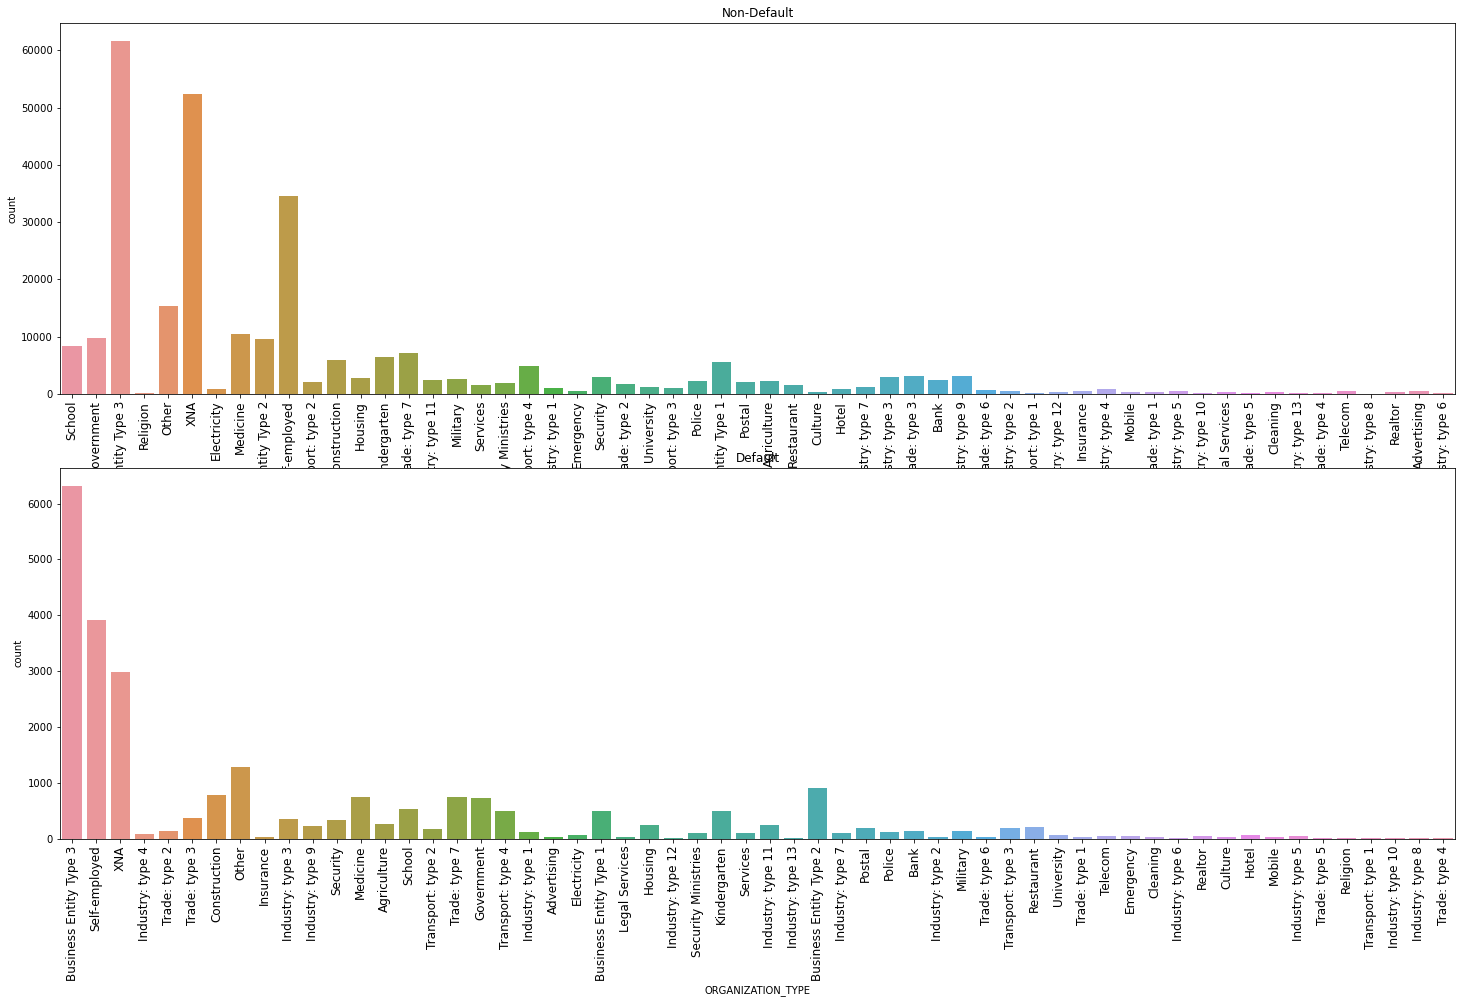

In [166]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['ORGANIZATION_TYPE'])
plt.xticks(rotation = 90 , fontsize = 12 )
              
plt.subplot(2,1,2)
plt.title("Default")
sns.countplot(application_dataset_1['ORGANIZATION_TYPE'])
plt.xticks(rotation = 90 , fontsize = 12 )

plt.show()

#### Insights:

#### 'AMT_INCOME_TOTAL_bin',

<AxesSubplot:title={'center':'Default'}, xlabel='AMT_INCOME_TOTAL_bin', ylabel='count'>

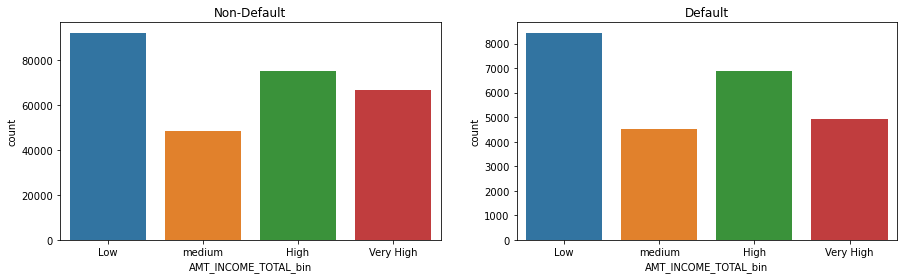

In [94]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['AMT_INCOME_TOTAL_bin']) 
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(application_dataset_1['AMT_INCOME_TOTAL_bin'])


#### Insights:

#### 'AMT_CREDIT_bin'

<AxesSubplot:title={'center':'Default'}, xlabel='AMT_CREDIT_bin', ylabel='count'>

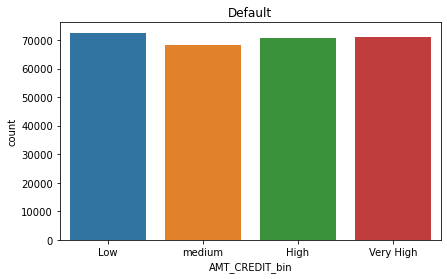

In [95]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['AMT_CREDIT_bin']) 
              
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(application_dataset_1['AMT_CREDIT_bin'])

#### Insights:

#### REG_REGION_NOT_LIVE_REGION

<AxesSubplot:title={'center':'Default'}, xlabel='REG_REGION_NOT_LIVE_REGION', ylabel='count'>

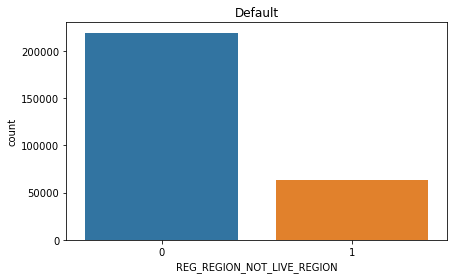

In [96]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['REG_REGION_NOT_LIVE_REGION']) 
              
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(application_dataset_1['REG_REGION_NOT_LIVE_REGION'])

#### Insights:

#### REG_REGION_NOT_WORK_REGION'

<AxesSubplot:title={'center':'Default'}, xlabel='REG_REGION_NOT_WORK_REGION', ylabel='count'>

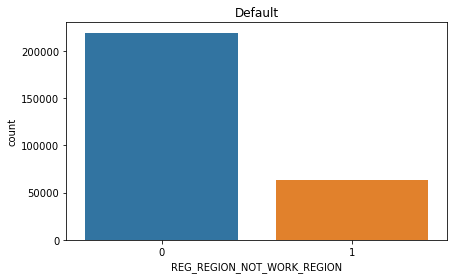

In [97]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['REG_REGION_NOT_WORK_REGION']) 
              
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(application_dataset_1['REG_REGION_NOT_WORK_REGION'])

#### Insights:

#### 'LIVE_REGION_NOT_WORK_REGION'

<AxesSubplot:title={'center':'Default'}, xlabel='REG_REGION_NOT_WORK_REGION', ylabel='count'>

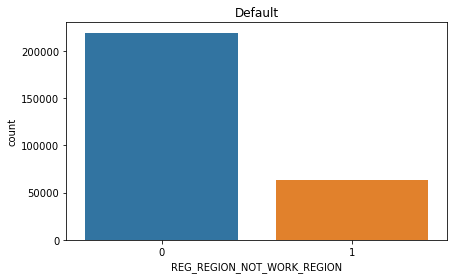

In [98]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['REG_REGION_NOT_WORK_REGION']) 
              
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(application_dataset_1['REG_REGION_NOT_WORK_REGION'])

#### Insights:

#### 'REG_CITY_NOT_LIVE_CITY'

<AxesSubplot:title={'center':'Default'}, xlabel='REG_CITY_NOT_LIVE_CITY', ylabel='count'>

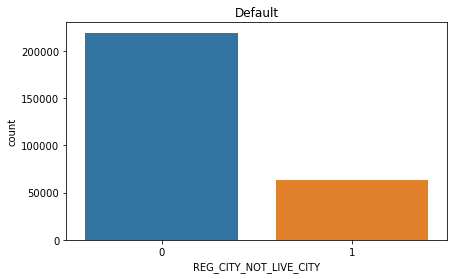

In [99]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['REG_CITY_NOT_LIVE_CITY']) 
              
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(application_dataset_1['REG_CITY_NOT_LIVE_CITY'])

#### Insights:

#### 'REG_CITY_NOT_WORK_CITY'

<AxesSubplot:title={'center':'Default'}, xlabel='REG_CITY_NOT_WORK_CITY', ylabel='count'>

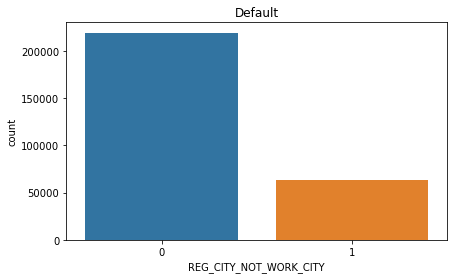

In [100]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['REG_CITY_NOT_WORK_CITY']) 
              
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(application_dataset_1['REG_CITY_NOT_WORK_CITY'])

#### Insights:

#### 'LIVE_CITY_NOT_WORK_CITY'

<AxesSubplot:title={'center':'Default'}, xlabel='LIVE_CITY_NOT_WORK_CITY', ylabel='count'>

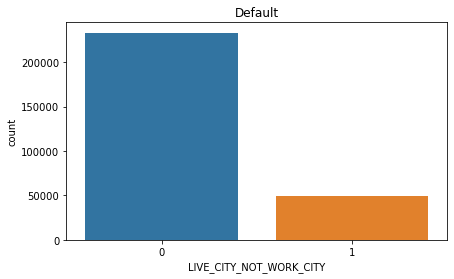

In [101]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot(application_dataset_0['LIVE_CITY_NOT_WORK_CITY']) 
              
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(application_dataset_1['LIVE_CITY_NOT_WORK_CITY'])

#### Insights:

## Bivariate Analysis

### Catergorical - Continuos

#### CODE_GENDER Vs AMT_INCOME_TOTAL , AMT_CREDIT , DAYS_BIRTH, DAYS_EMPLOYED

<AxesSubplot:title={'center':'Default'}, xlabel='CODE_GENDER', ylabel='DAYS_EMPLOYED'>

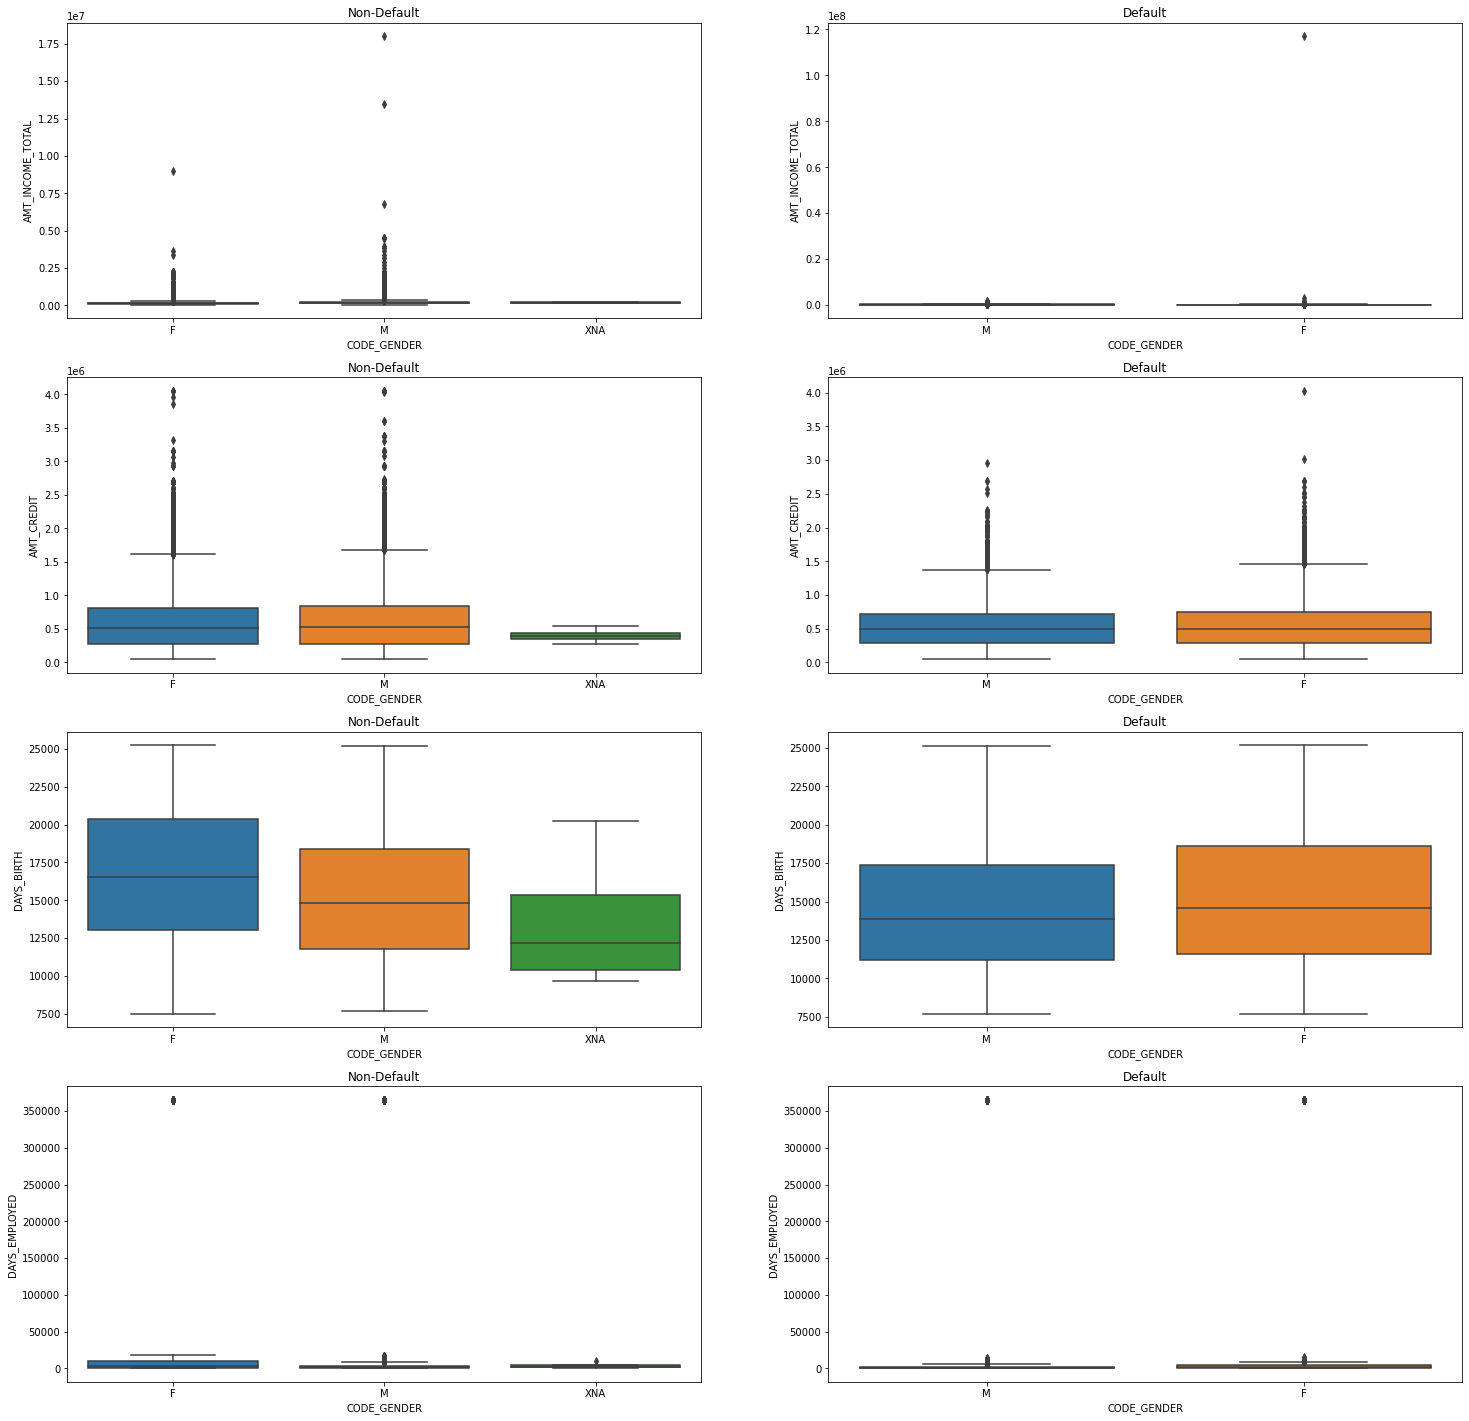

In [173]:
plt.figure(figsize = (25,25))

plt.subplot(4,2,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'CODE_GENDER' , y = 'AMT_INCOME_TOTAL' )
  
              
plt.subplot(4,2,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'CODE_GENDER' , y = 'AMT_INCOME_TOTAL')

plt.subplot(4,2,3)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'CODE_GENDER' , y = 'AMT_CREDIT' )
  
              
plt.subplot(4,2,4)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'CODE_GENDER' , y = 'AMT_CREDIT')


plt.subplot(4,2,5)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'CODE_GENDER' , y = 'DAYS_BIRTH' )
  
              
plt.subplot(4,2,6)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'CODE_GENDER' , y = 'DAYS_BIRTH')


plt.subplot(4,2,7)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'CODE_GENDER' , y = 'DAYS_EMPLOYED' )
  
              
plt.subplot(4,2,8)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'CODE_GENDER' , y = 'DAYS_EMPLOYED')



#### Insights:


<AxesSubplot:title={'center':'Default'}, xlabel='CODE_GENDER', ylabel='CNT_CHILDREN'>

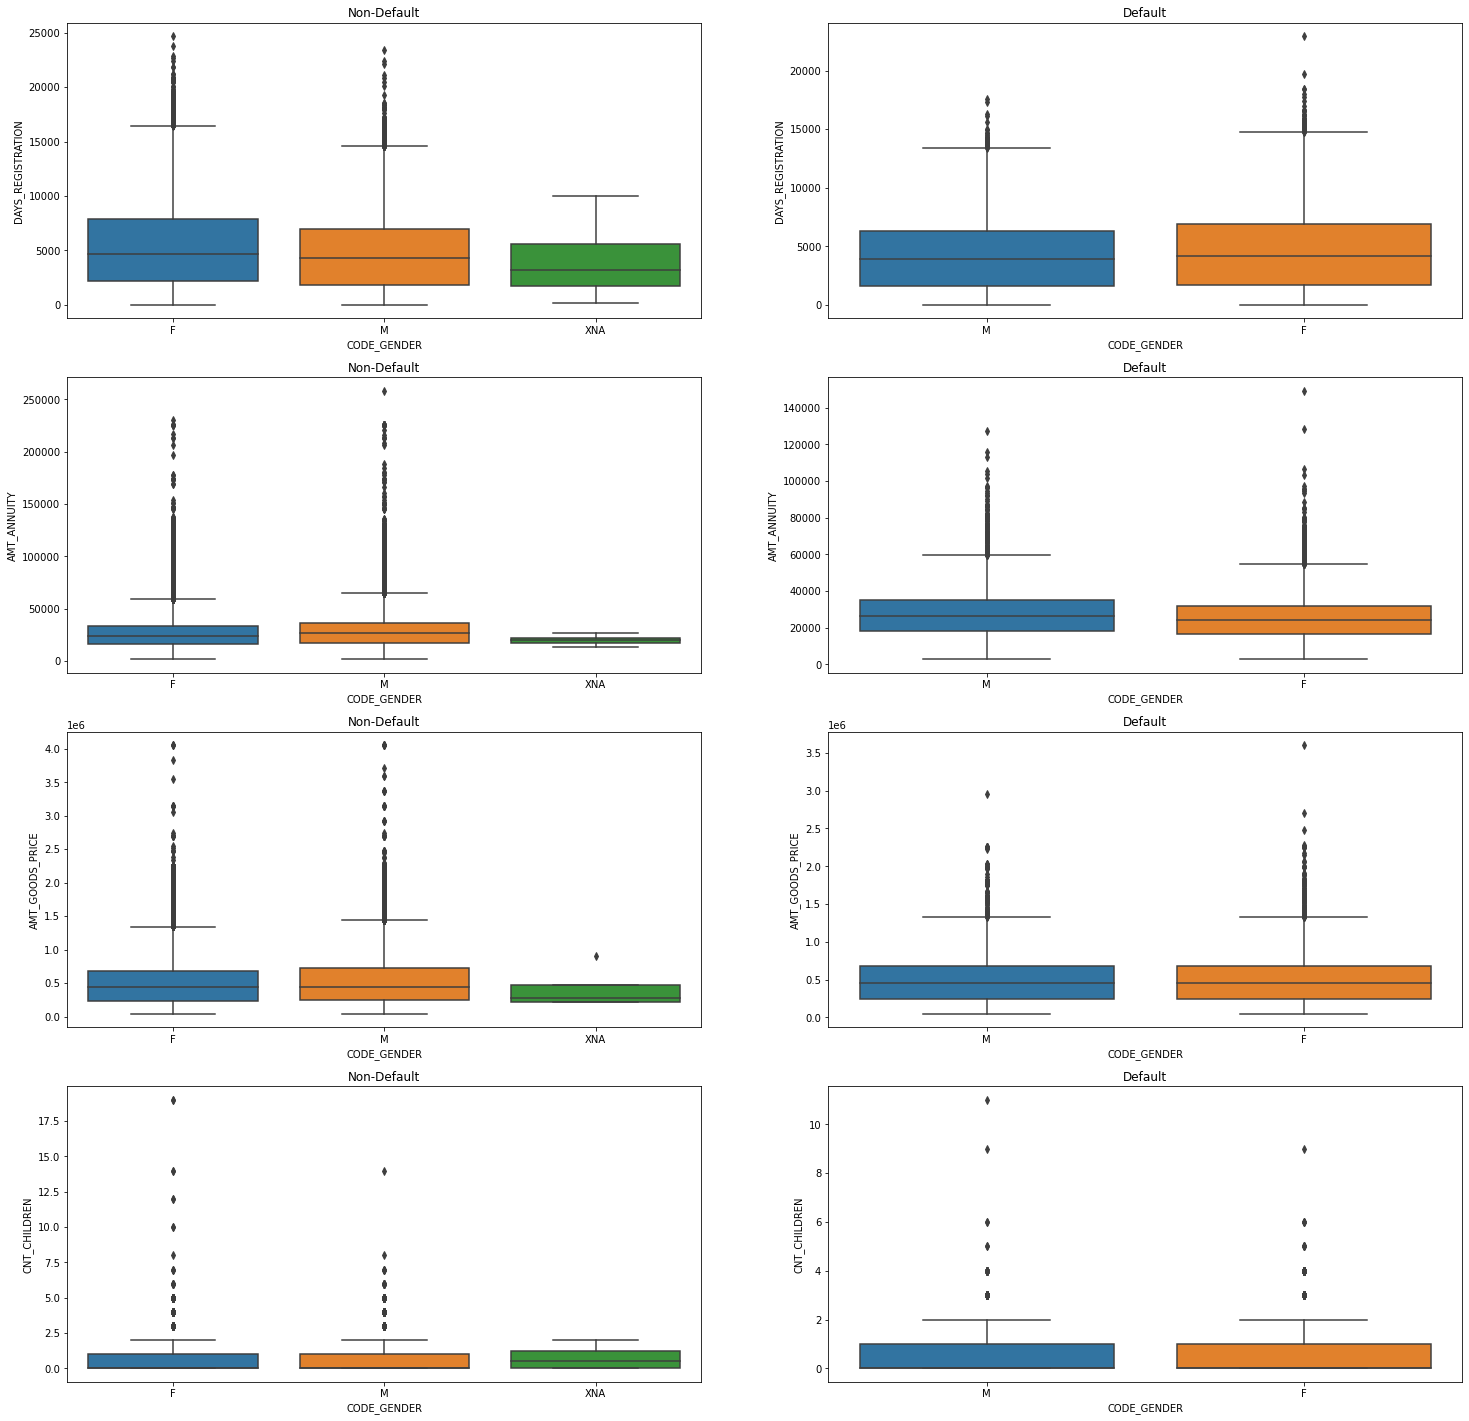

In [174]:
plt.figure(figsize = (25,25))

plt.subplot(4,2,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'CODE_GENDER' , y = 'DAYS_REGISTRATION' )
  
              
plt.subplot(4,2,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'CODE_GENDER' , y = 'DAYS_REGISTRATION')

plt.subplot(4,2,3)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'CODE_GENDER' , y = 'AMT_ANNUITY' )
              
plt.subplot(4,2,4)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'CODE_GENDER' , y = 'AMT_ANNUITY') 


plt.subplot(4,2,5)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'CODE_GENDER' , y = 'AMT_GOODS_PRICE' )

plt.subplot(4,2,6)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'CODE_GENDER' , y = 'AMT_GOODS_PRICE')

plt.subplot(4,2,7)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'CODE_GENDER' , y = 'CNT_CHILDREN' )

plt.subplot(4,2,8)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'CODE_GENDER' , y = 'CNT_CHILDREN')


#### Insights:

#### NAME_CONTRACT_TYPE' -  'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY',AMT_GOODS_PRICE

<AxesSubplot:title={'center':'Default'}, xlabel='NAME_CONTRACT_TYPE', ylabel='AMT_GOODS_PRICE'>

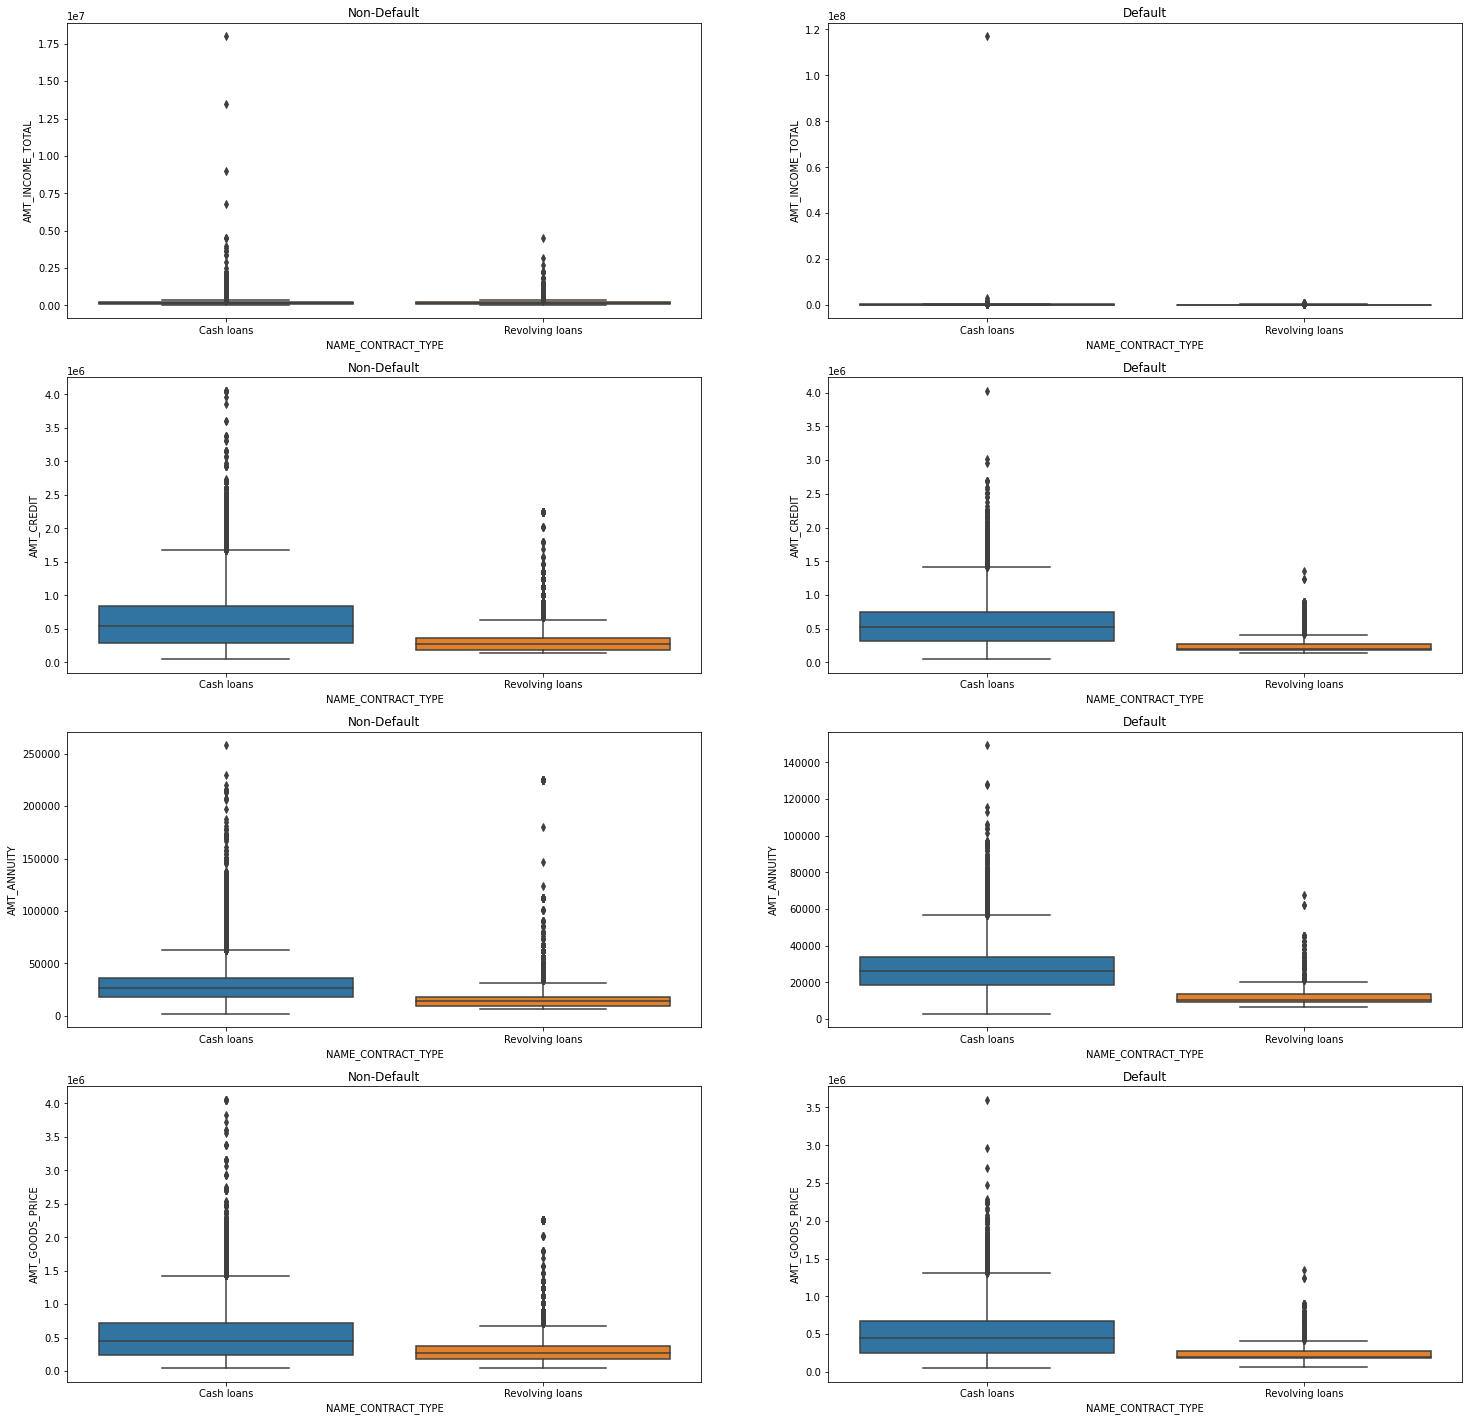

In [175]:
plt.figure(figsize = (25,25))

plt.subplot(4,2,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_CONTRACT_TYPE' , y = 'AMT_INCOME_TOTAL' )
  
              
plt.subplot(4,2,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_CONTRACT_TYPE' , y = 'AMT_INCOME_TOTAL')

plt.subplot(4,2,3)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_CONTRACT_TYPE' , y = 'AMT_CREDIT' )
  
              
plt.subplot(4,2,4)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_CONTRACT_TYPE' , y = 'AMT_CREDIT')


plt.subplot(4,2,5)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_CONTRACT_TYPE' , y = 'AMT_ANNUITY' )
  
              
plt.subplot(4,2,6)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_CONTRACT_TYPE' , y = 'AMT_ANNUITY')


plt.subplot(4,2,7)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_CONTRACT_TYPE' , y = 'AMT_GOODS_PRICE' )
  
              
plt.subplot(4,2,8)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_CONTRACT_TYPE' , y = 'AMT_GOODS_PRICE')


#### Insights:

#### ORGANIZATION_TYPE -  'AMT_INCOME_TOTAL'

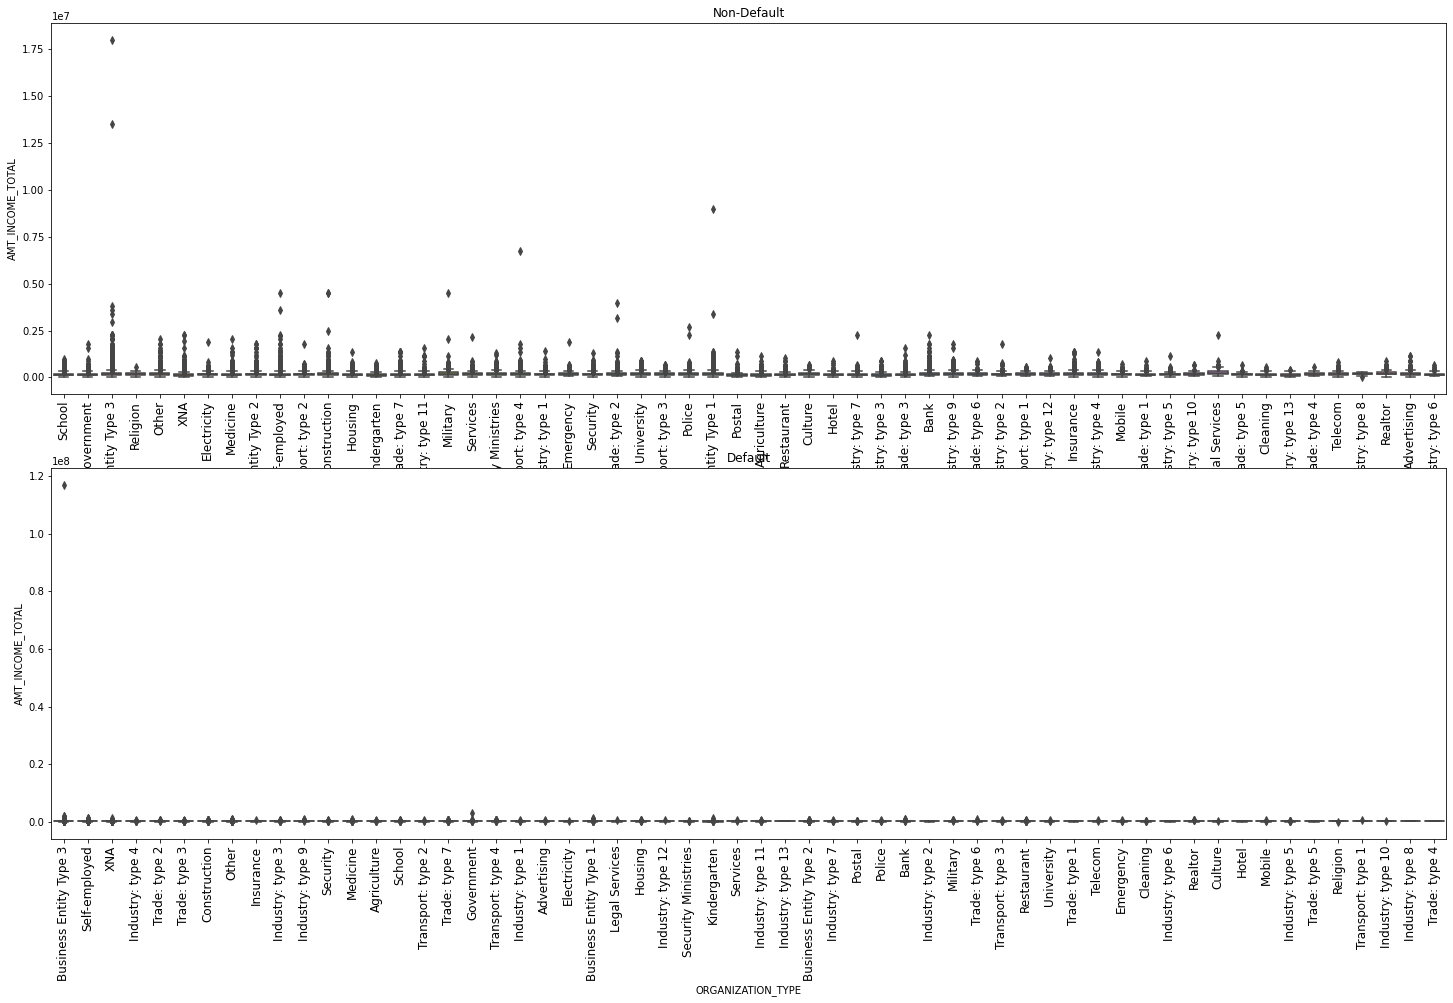

In [105]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'ORGANIZATION_TYPE' , y = 'AMT_INCOME_TOTAL' )
plt.xticks(rotation = 90 , fontsize = 12) 
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'ORGANIZATION_TYPE' , y = 'AMT_INCOME_TOTAL')
plt.xticks(rotation = 90 , fontsize = 12) 

plt.show()

#### Insights:

#### ORGANIZATION_TYPE - 'AMT_CREDIT'

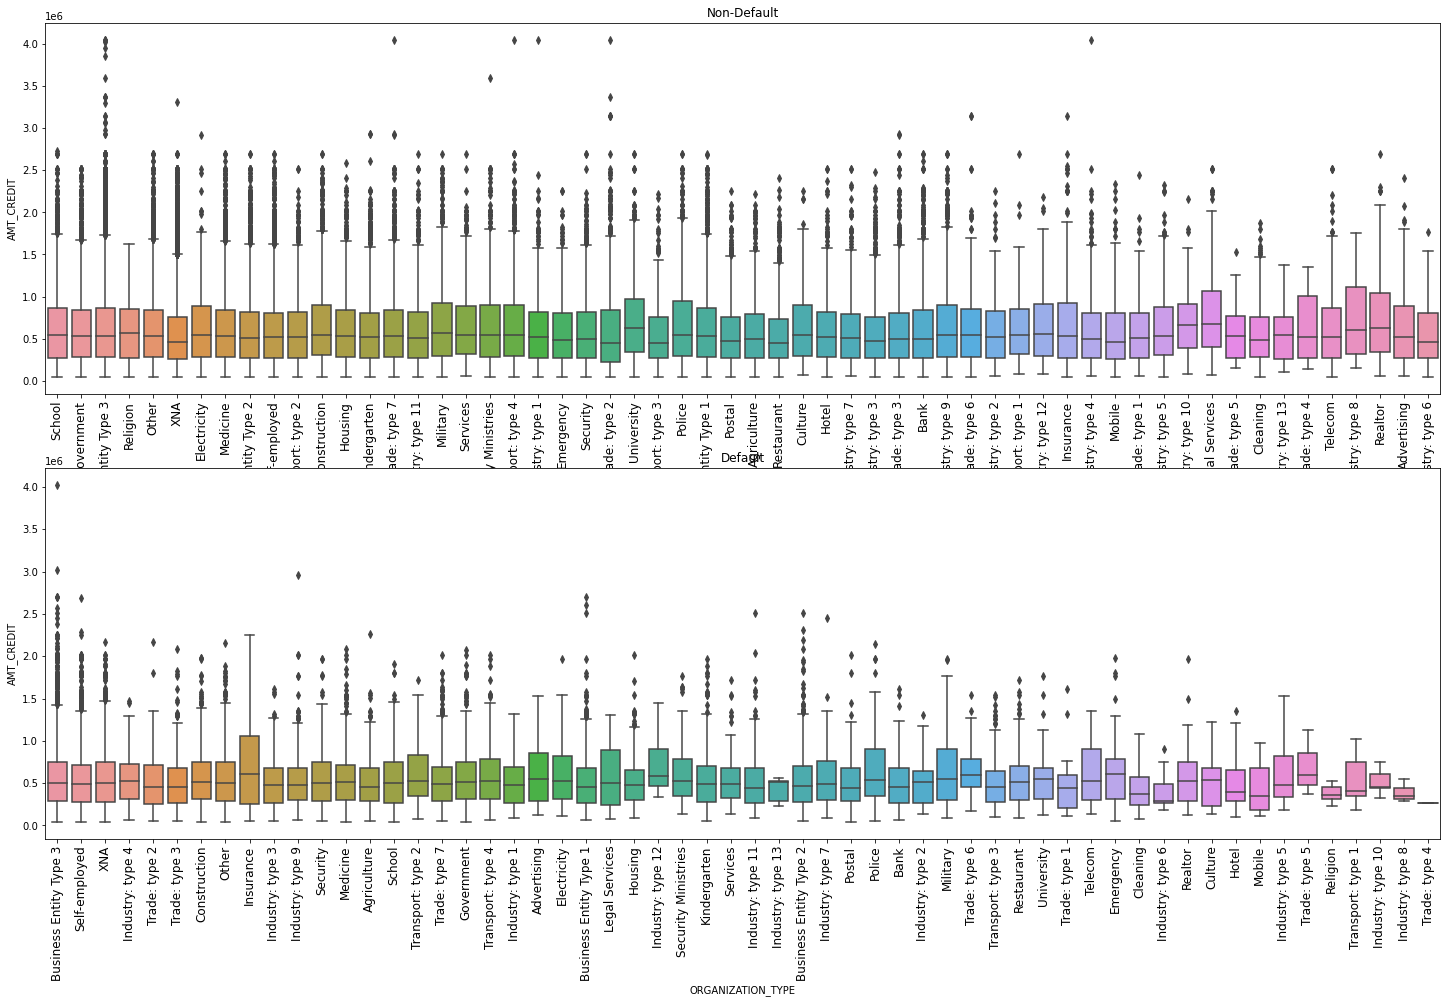

In [106]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'ORGANIZATION_TYPE' , y = 'AMT_CREDIT' )
plt.xticks(rotation = 90, fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'ORGANIZATION_TYPE' , y = 'AMT_CREDIT')
plt.xticks(rotation = 90, fontsize = 12) 
plt.show()

#### Insights:

#### ORGANIZATION_TYPE - AMT_ANNUITY

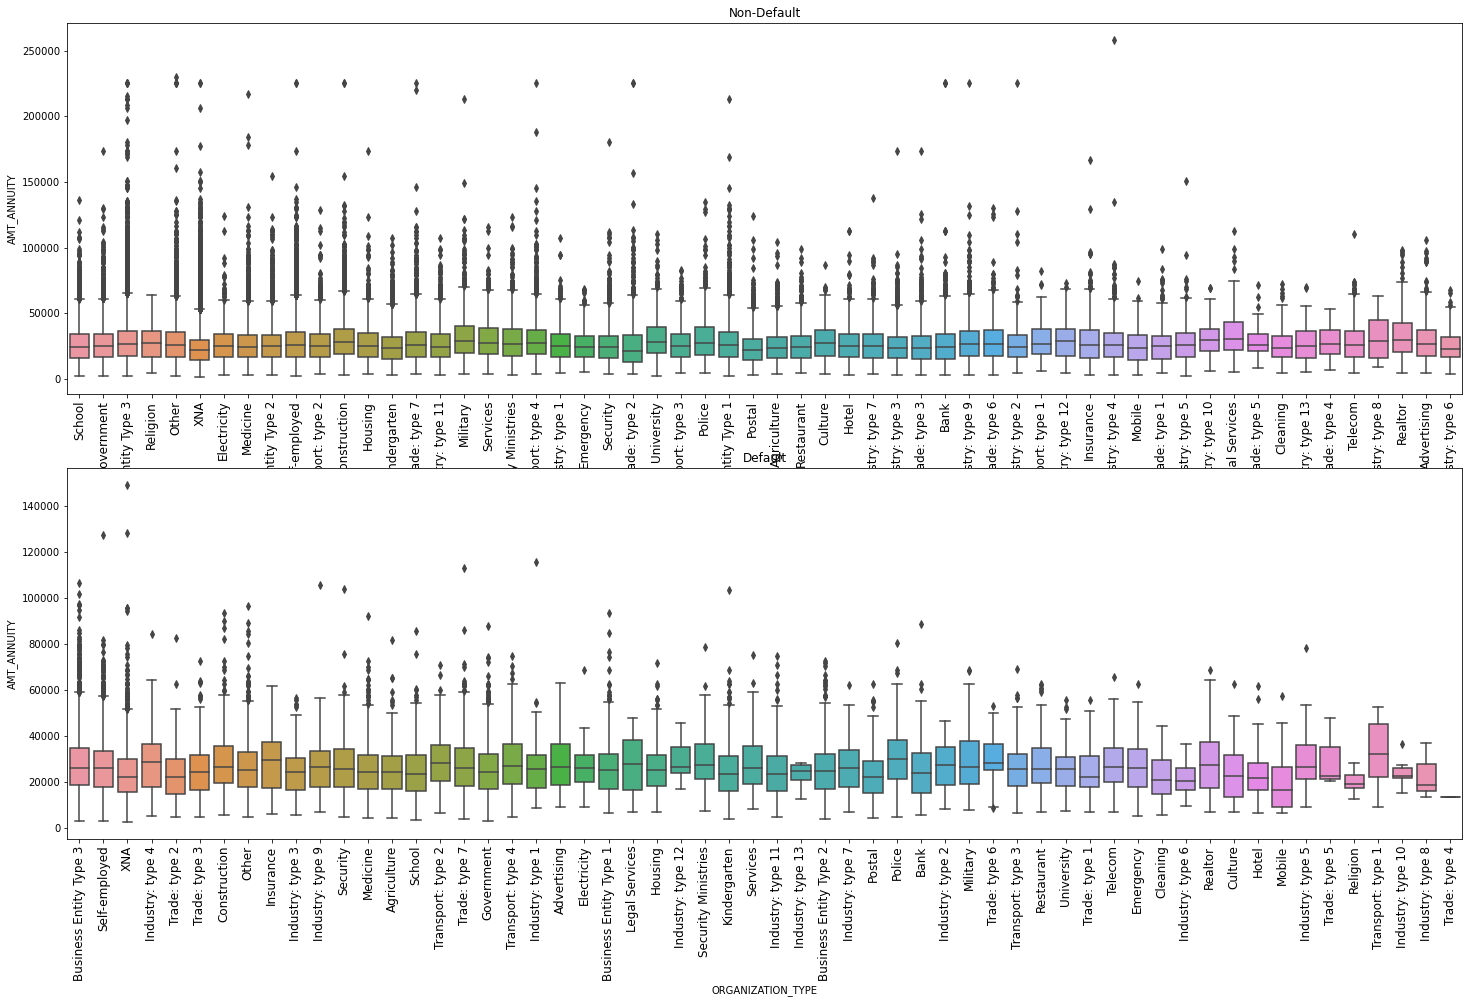

In [107]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'ORGANIZATION_TYPE' , y = 'AMT_ANNUITY' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'ORGANIZATION_TYPE' , y = 'AMT_ANNUITY')
plt.xticks(rotation = 90 , fontsize = 12) 
plt.show()

#### Insights:

#### ORGANIZATION_TYPE - AMT_GOODS_PRICE

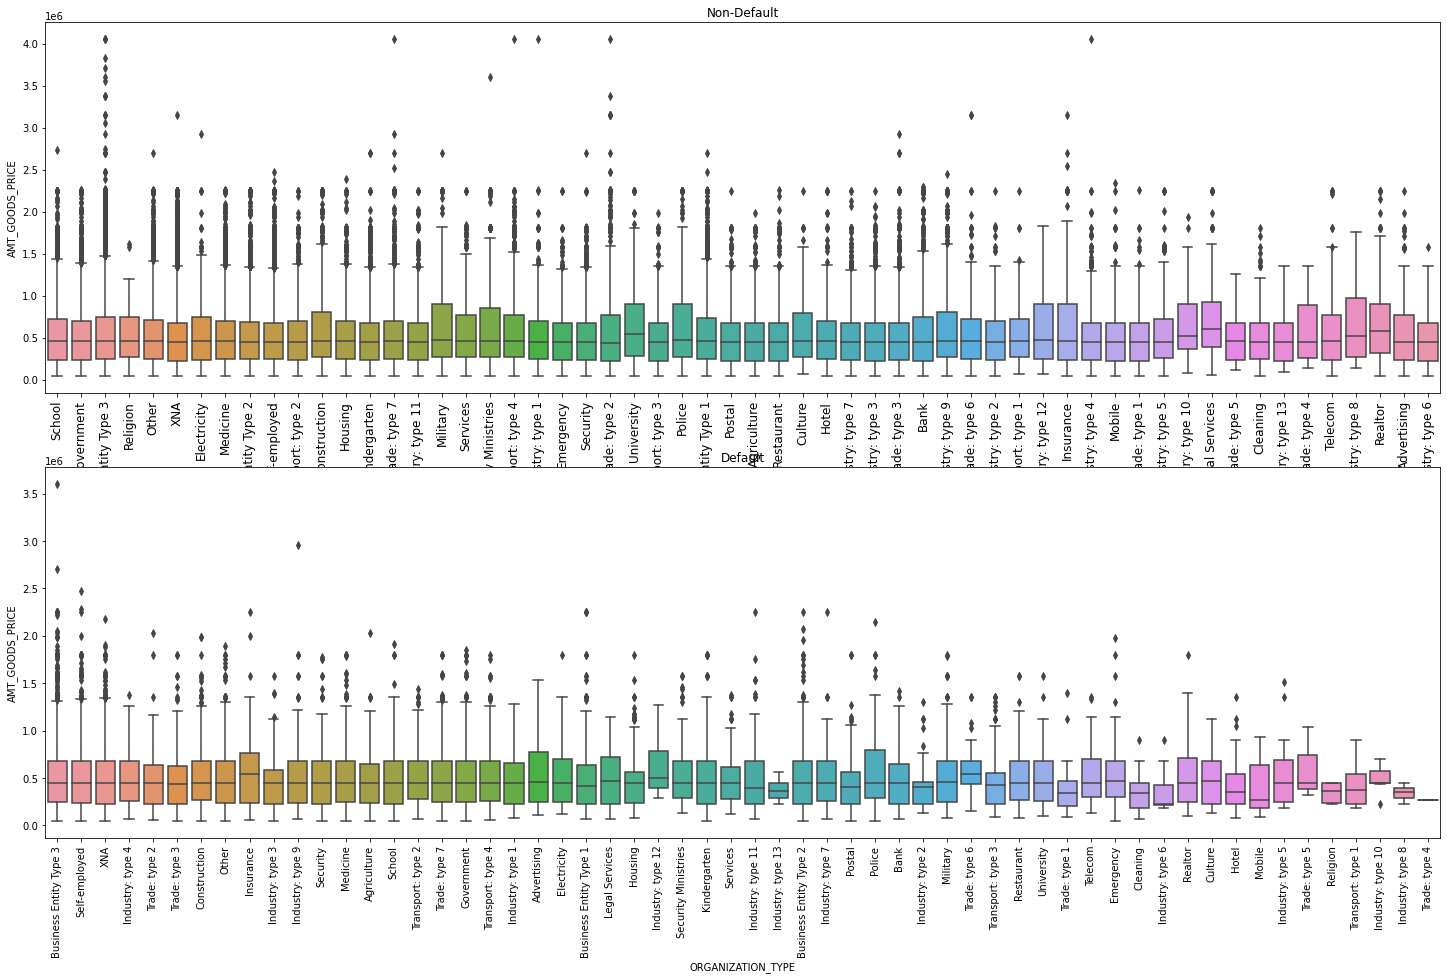

In [108]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'ORGANIZATION_TYPE' , y = 'AMT_GOODS_PRICE' )
plt.xticks(rotation = 90 , fontsize = 12) 
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'ORGANIZATION_TYPE' , y = 'AMT_GOODS_PRICE')
plt.xticks(rotation = 90) 
plt.show()

#### Insights:

#### OCCUPATION_TYPE -  'AMT_INCOME_TOTAL' 

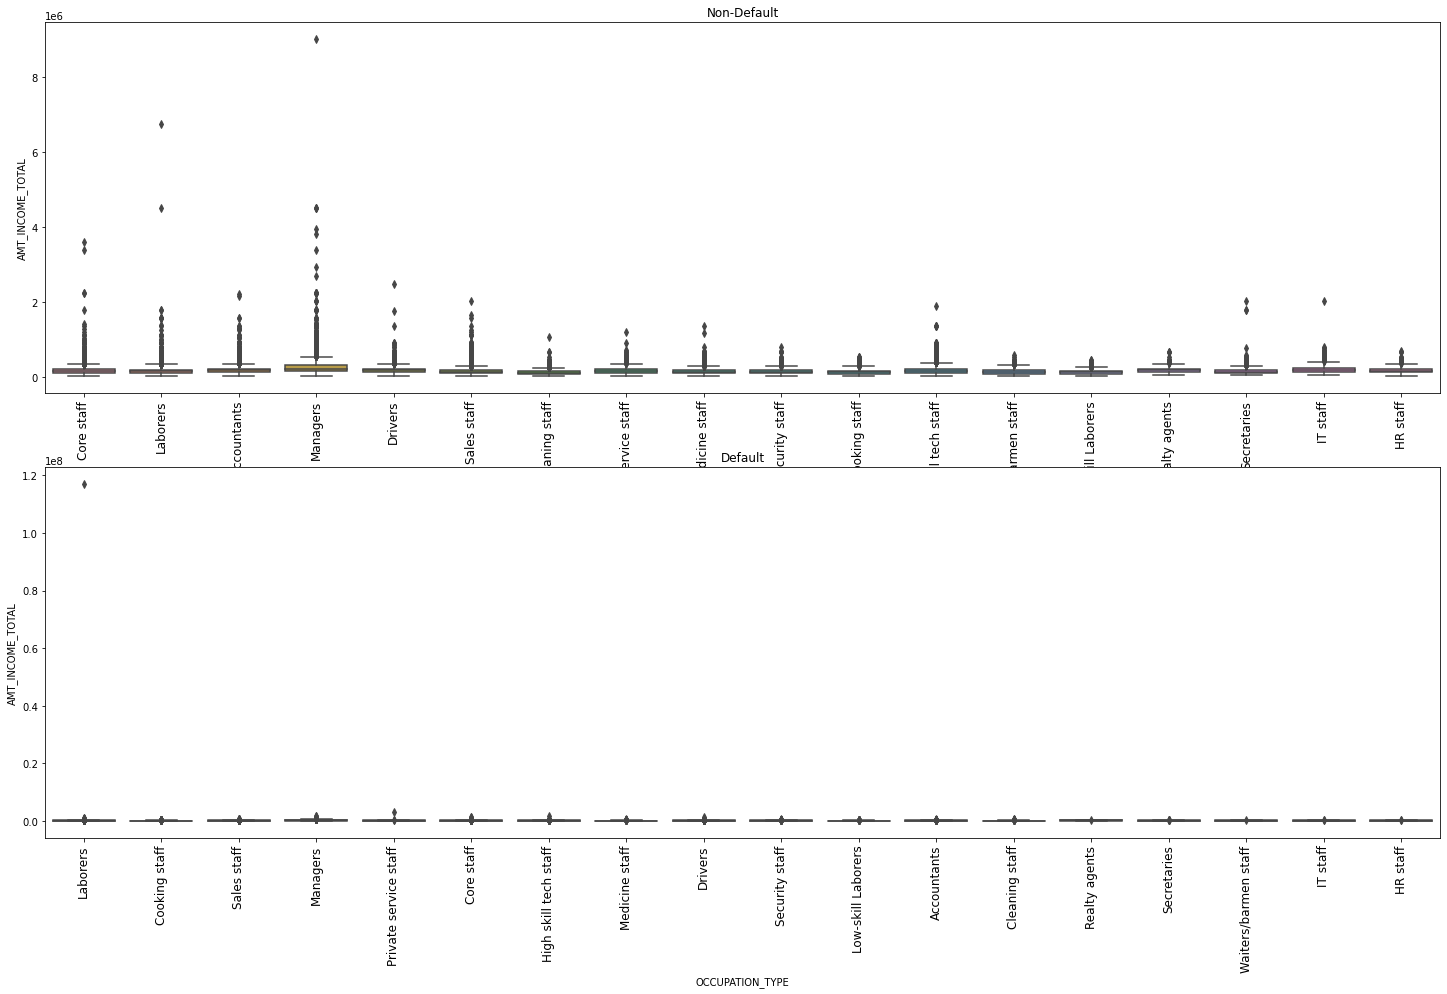

In [109]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'OCCUPATION_TYPE' , y = 'AMT_INCOME_TOTAL' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'OCCUPATION_TYPE' , y = 'AMT_INCOME_TOTAL')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

#### OCCUPATION_TYPE - 'AMT_CREDIT' 

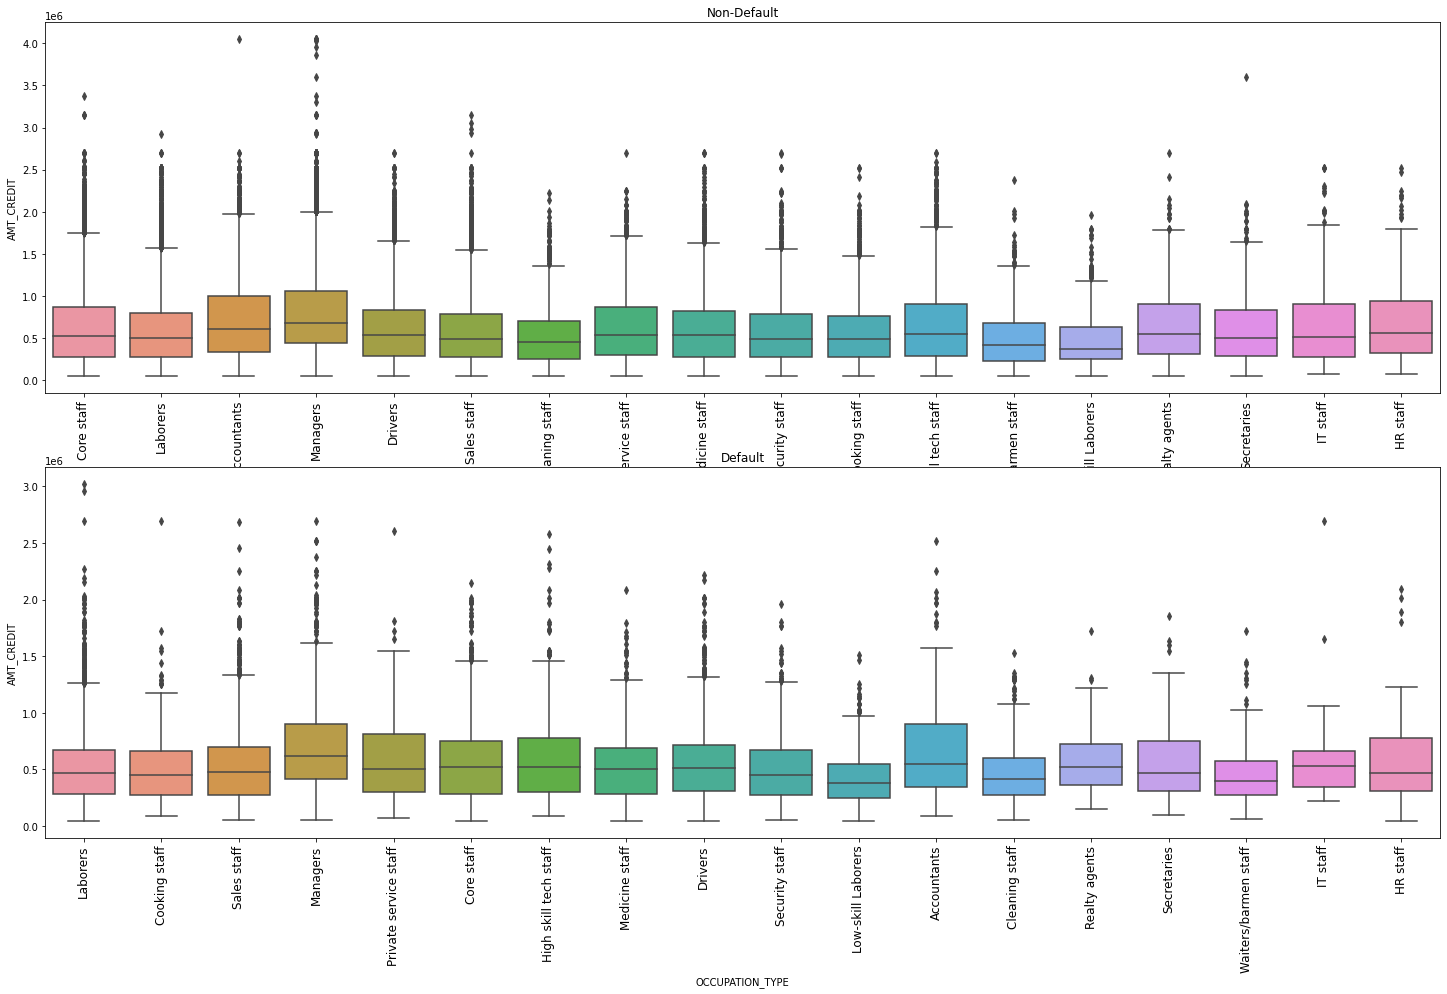

In [110]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'OCCUPATION_TYPE' , y = 'AMT_CREDIT' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'OCCUPATION_TYPE' , y = 'AMT_CREDIT')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

#### OCCUPATION_TYPE - 'AMT_ANNUITY' 

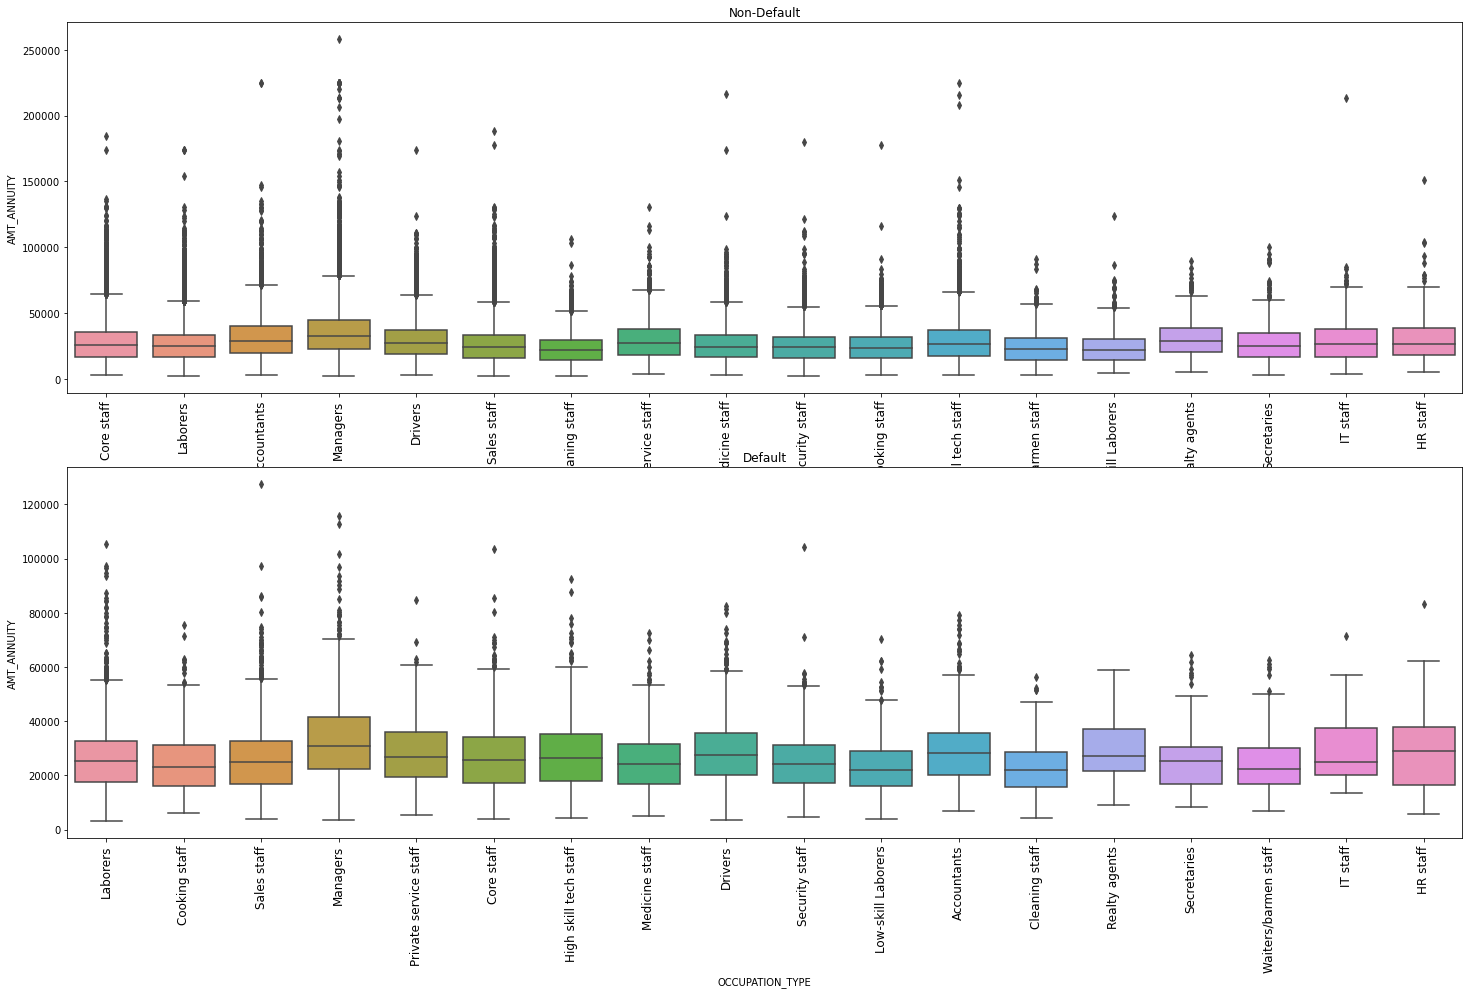

In [111]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'OCCUPATION_TYPE' , y = 'AMT_ANNUITY' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'OCCUPATION_TYPE' , y = 'AMT_ANNUITY')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

#### OCCUPATION_TYPE -  AMT_GOODS_PRICE

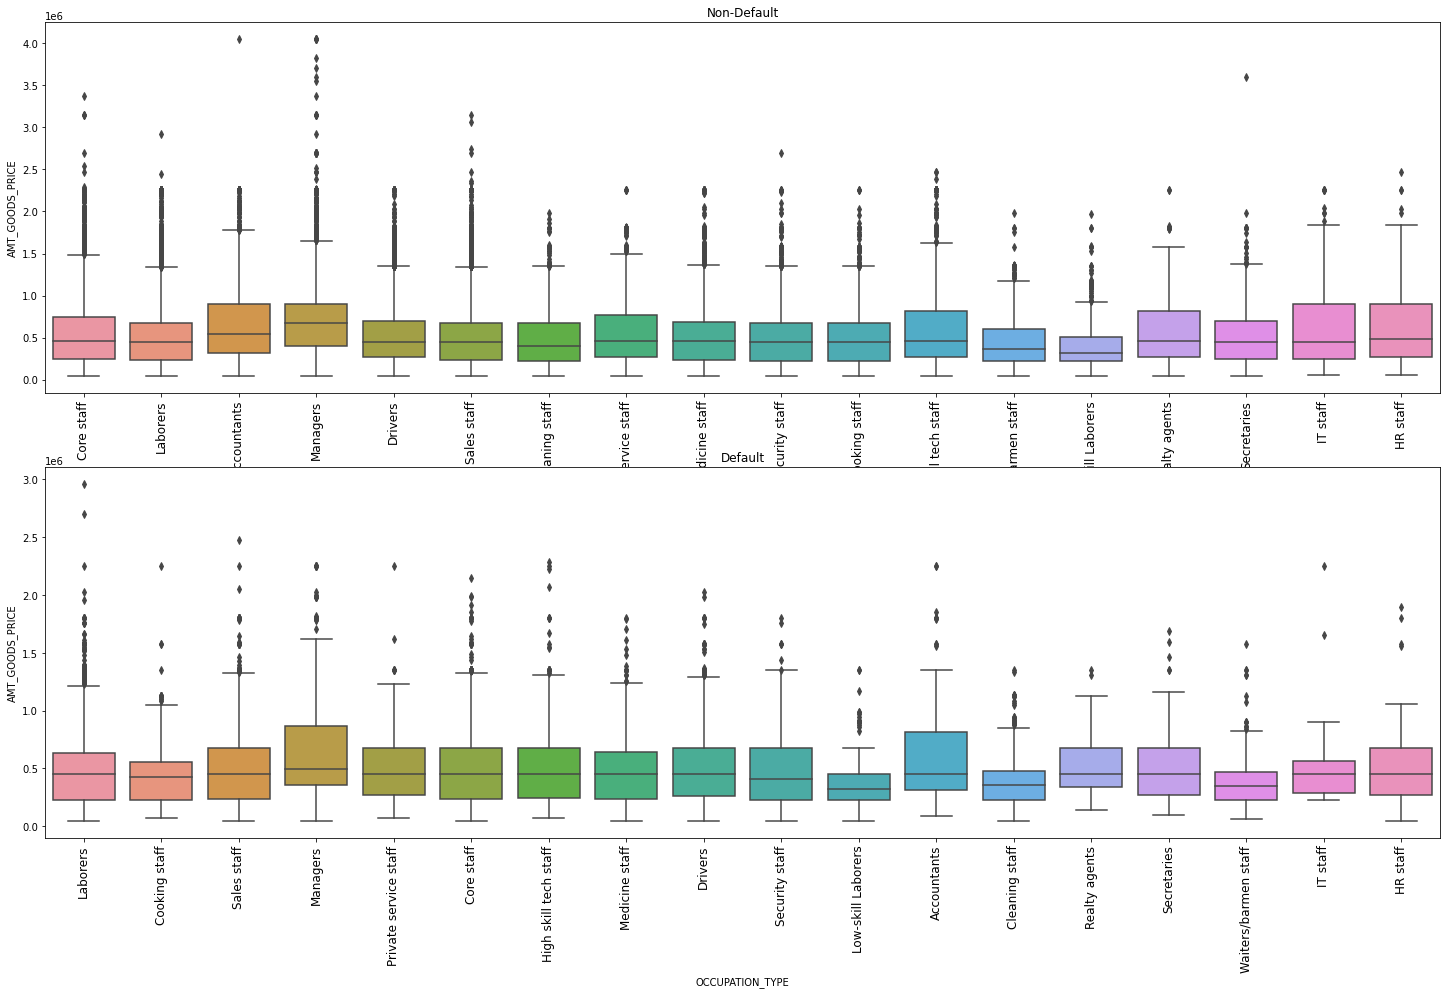

In [112]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'OCCUPATION_TYPE' , y = 'AMT_GOODS_PRICE' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'OCCUPATION_TYPE' , y = 'AMT_GOODS_PRICE')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

#### NAME_INCOME_TYPE - 'DAYS_BIRTH',

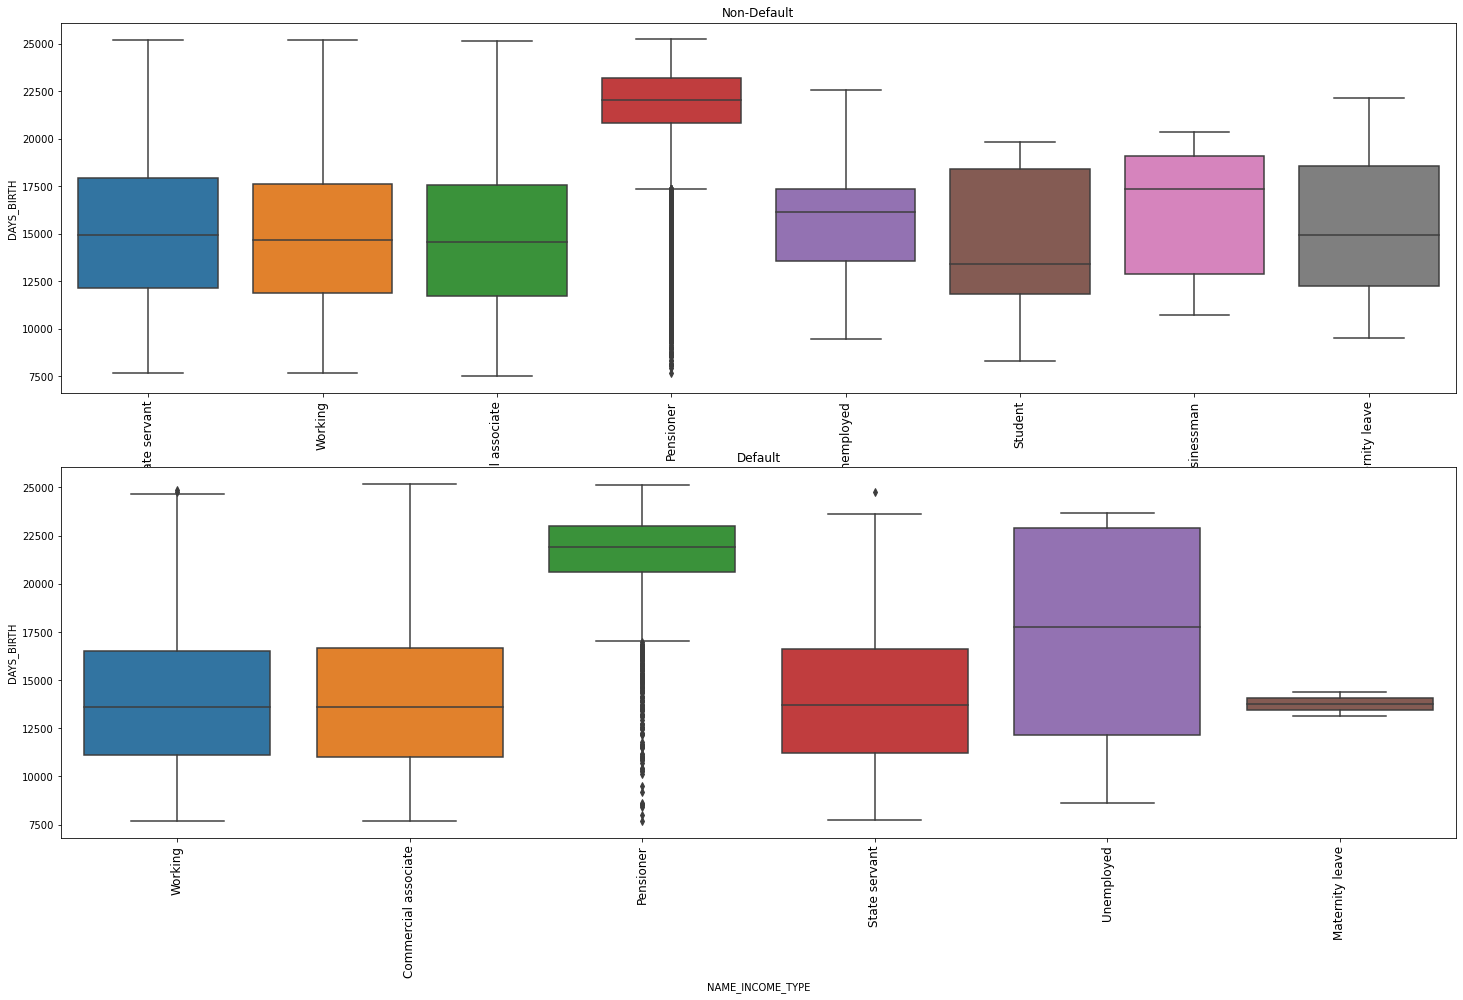

In [113]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_INCOME_TYPE' , y = 'DAYS_BIRTH' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'DAYS_BIRTH')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

#### NAME_INCOME_TYPE - 'DAYS_EMPLOYED'

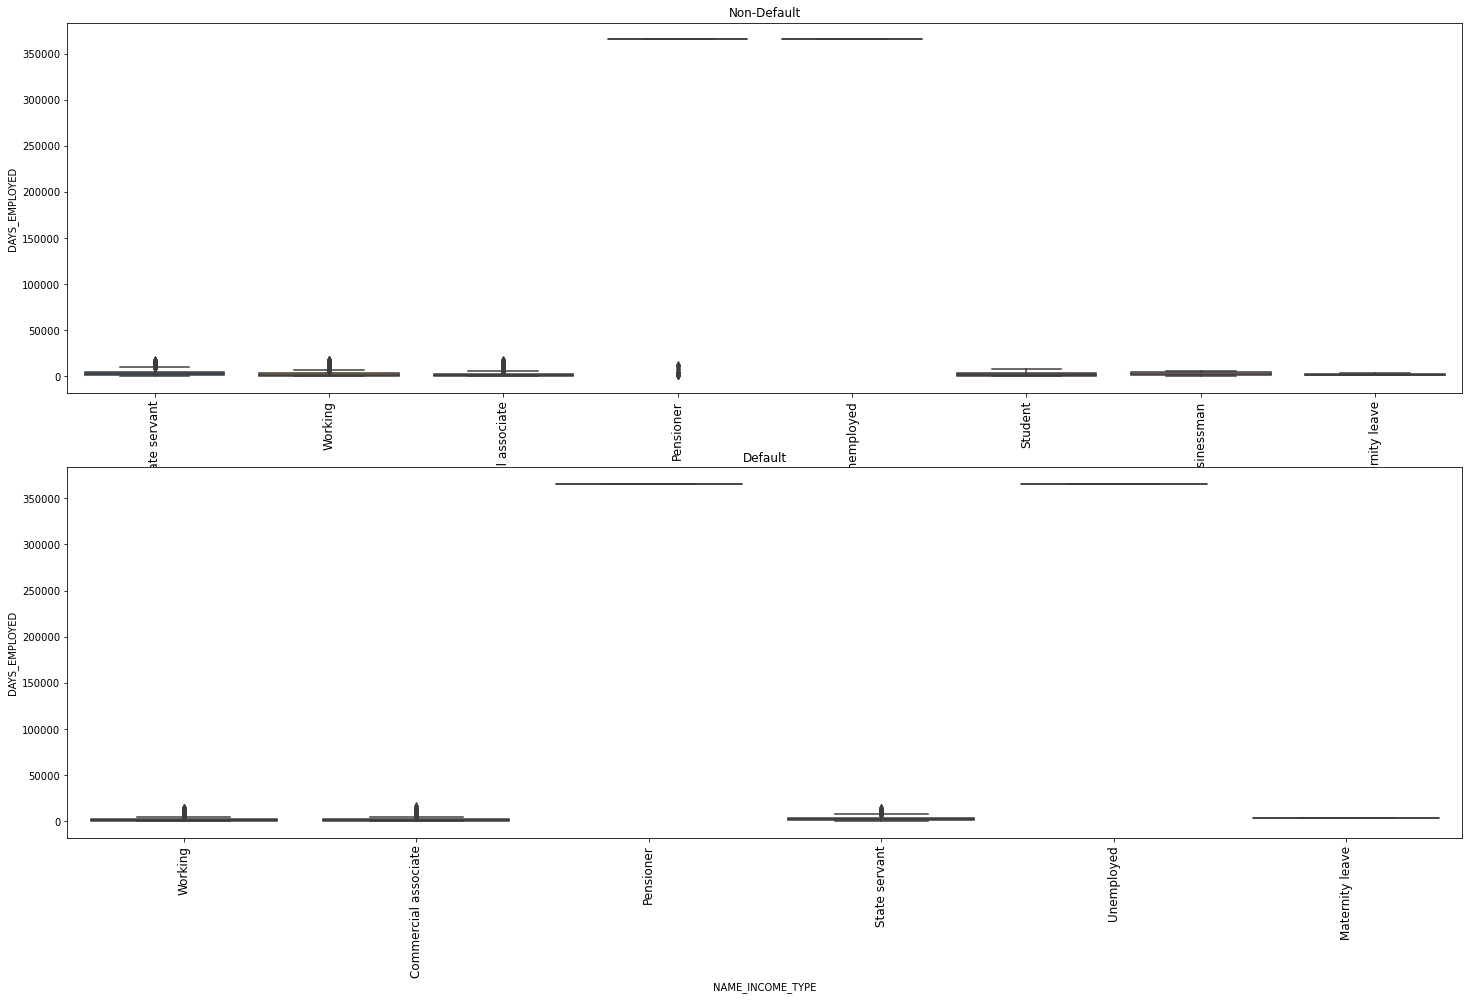

In [114]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_INCOME_TYPE' , y = 'DAYS_EMPLOYED' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'DAYS_EMPLOYED')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

#### NAME_INCOME_TYPE - 'AMT_INCOME_TOTAL'

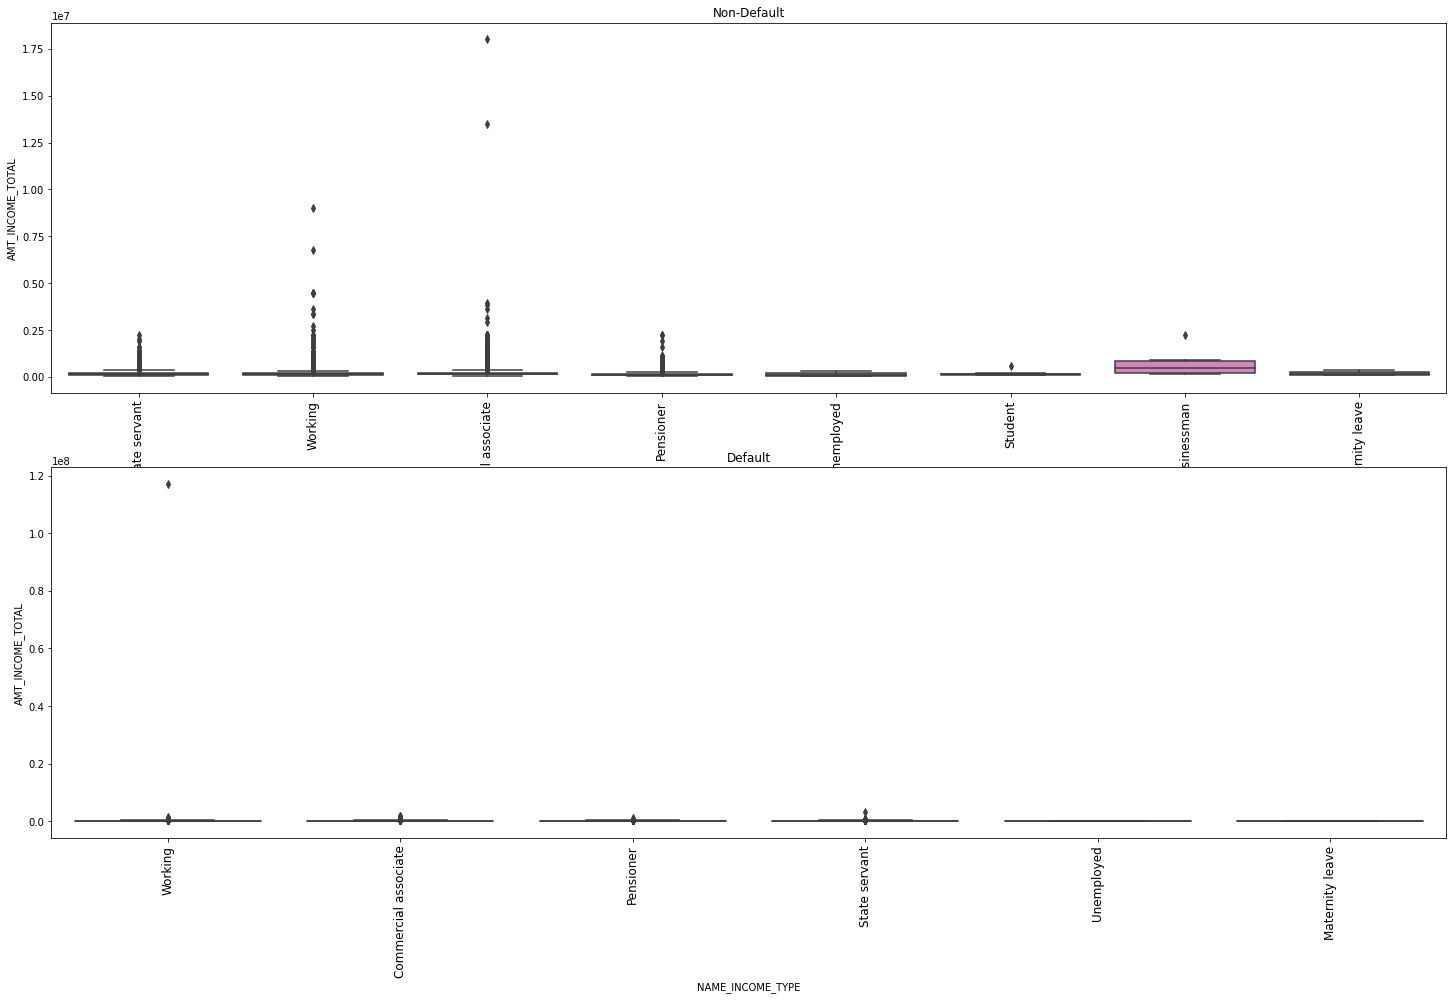

In [115]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_INCOME_TYPE' , y = 'AMT_INCOME_TOTAL' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'AMT_INCOME_TOTAL')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

#### NAME_INCOME_TYPE - 'AMT_CREDIT'

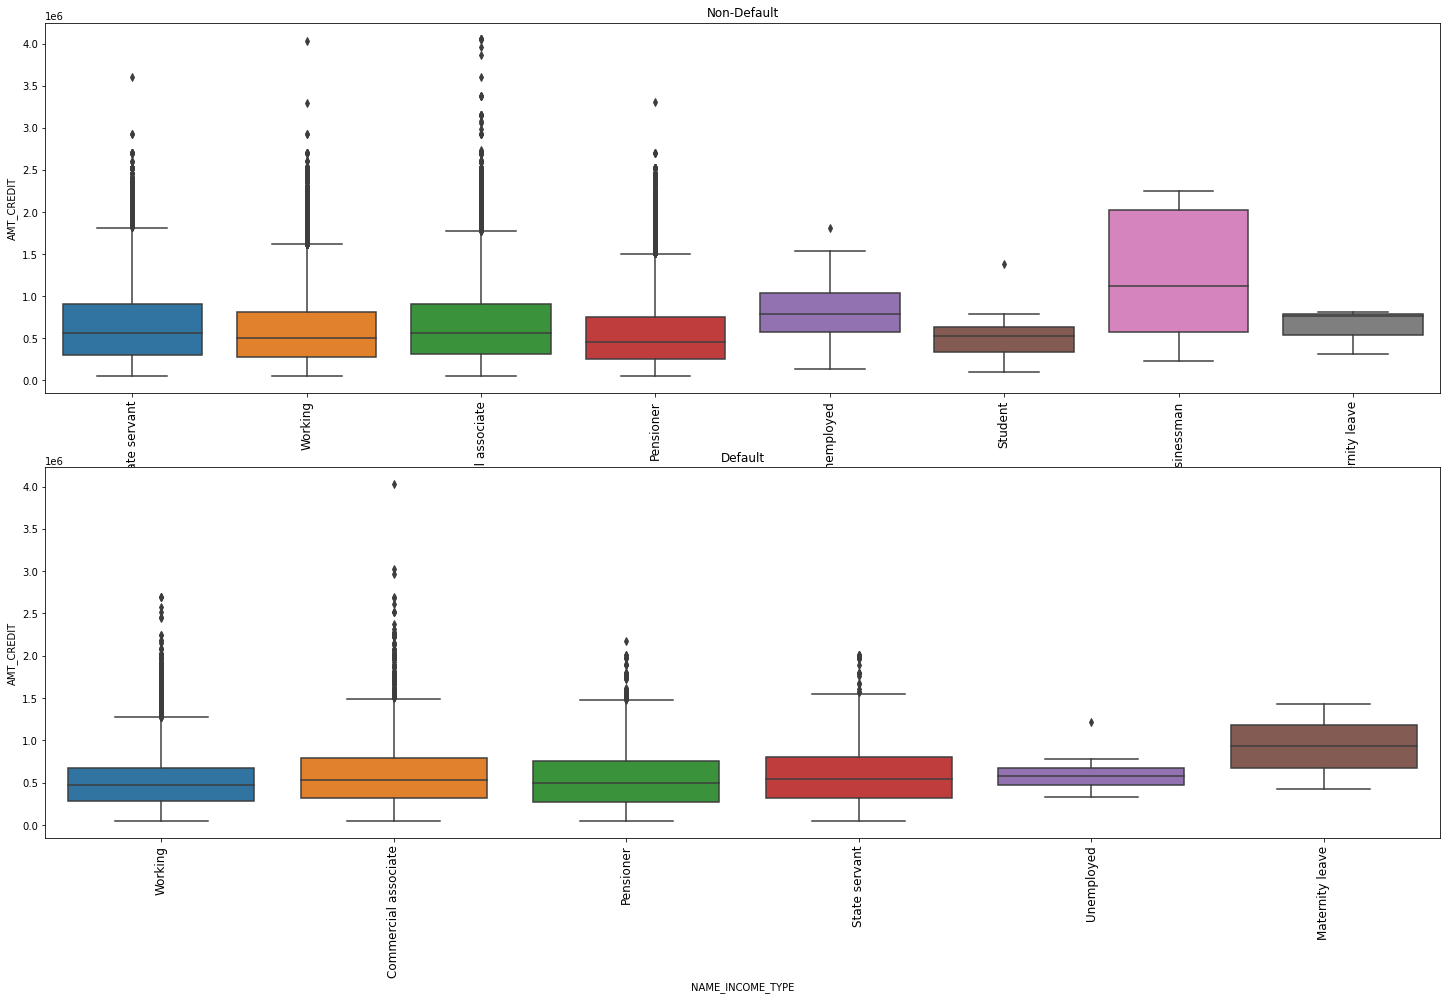

In [116]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_INCOME_TYPE' , y = 'AMT_CREDIT' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'AMT_CREDIT')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

#### NAME_INCOME_TYPE - 'AMT_ANNUITY', 

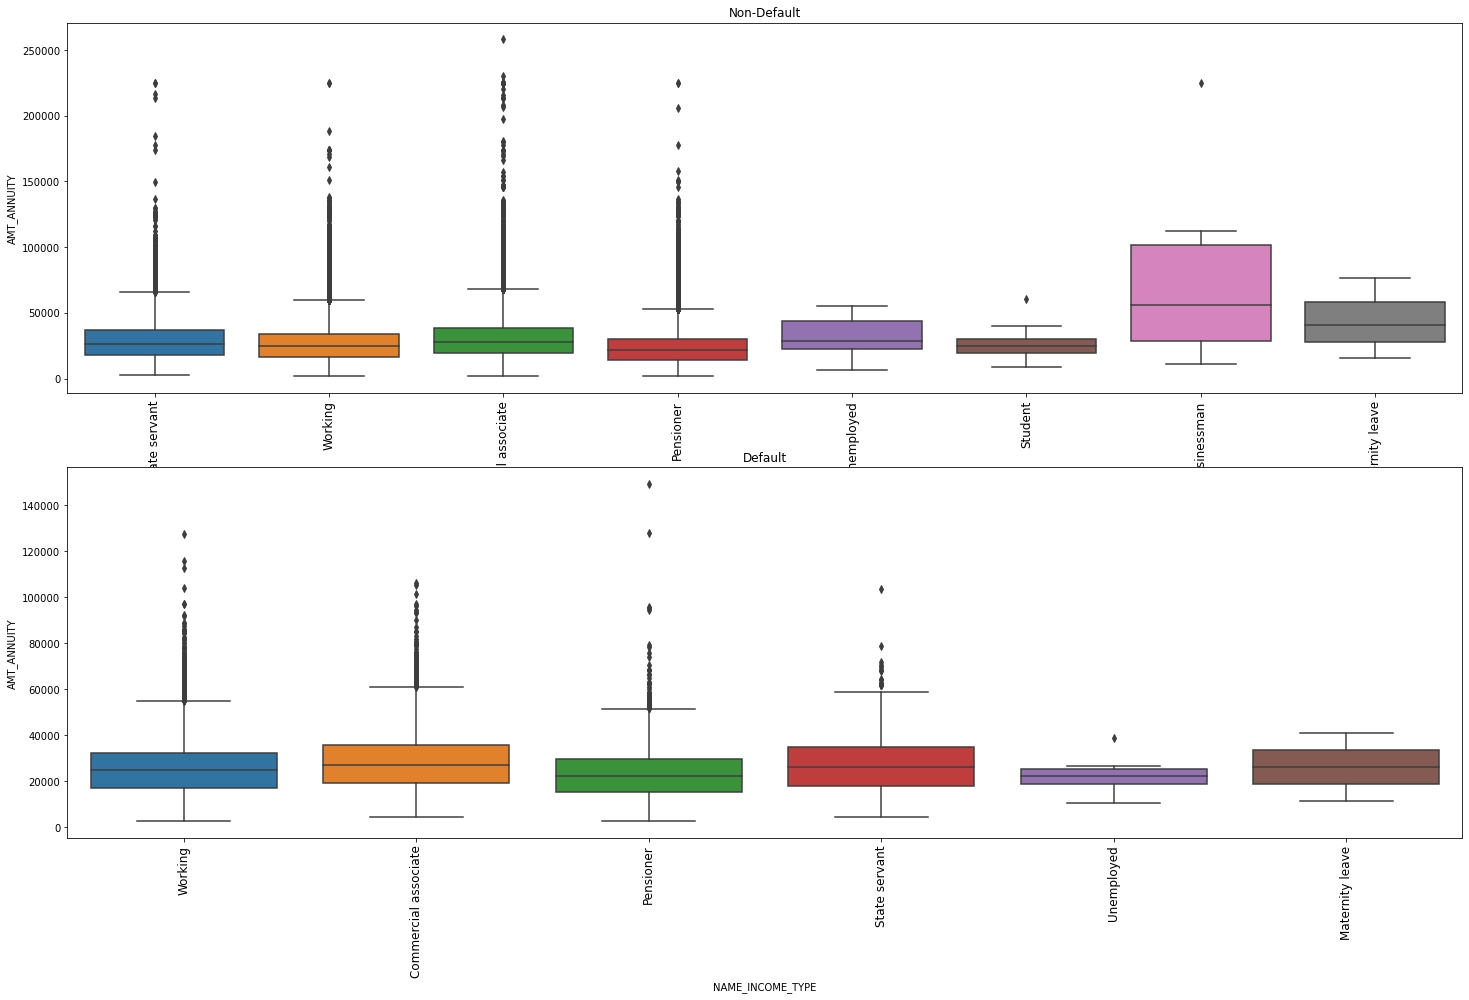

In [117]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_INCOME_TYPE' , y = 'AMT_ANNUITY' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'AMT_ANNUITY')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

#### NAME_INCOME_TYPE - AMT_GOODS_PRICE

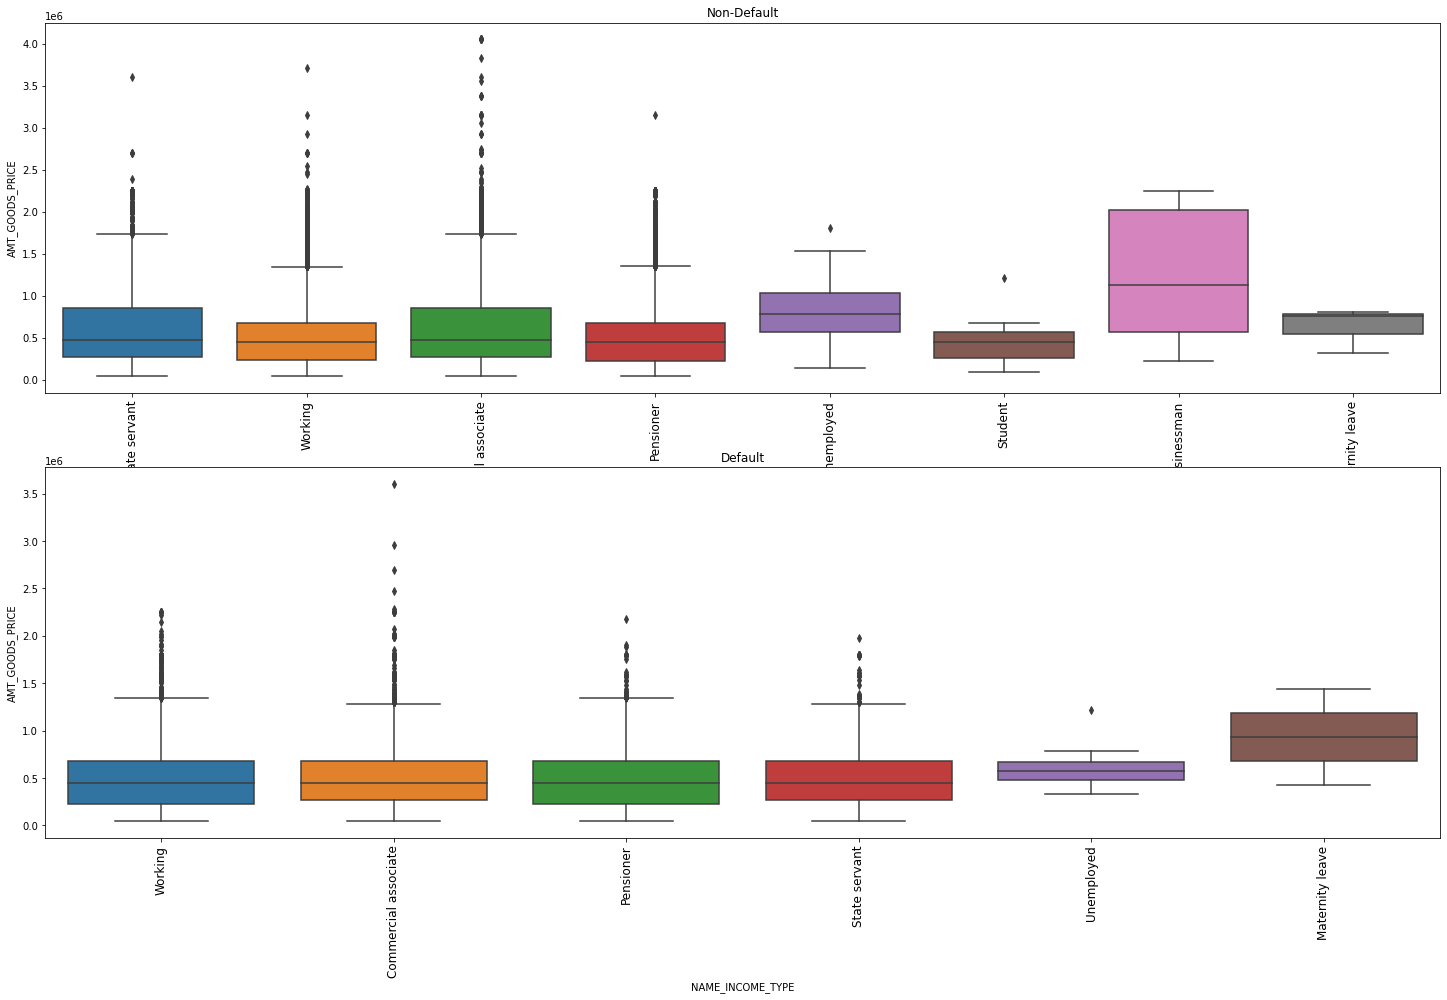

In [118]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_INCOME_TYPE' , y = 'AMT_GOODS_PRICE' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'AMT_GOODS_PRICE')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

#### NAME_FAMILY_STATUS' - AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'

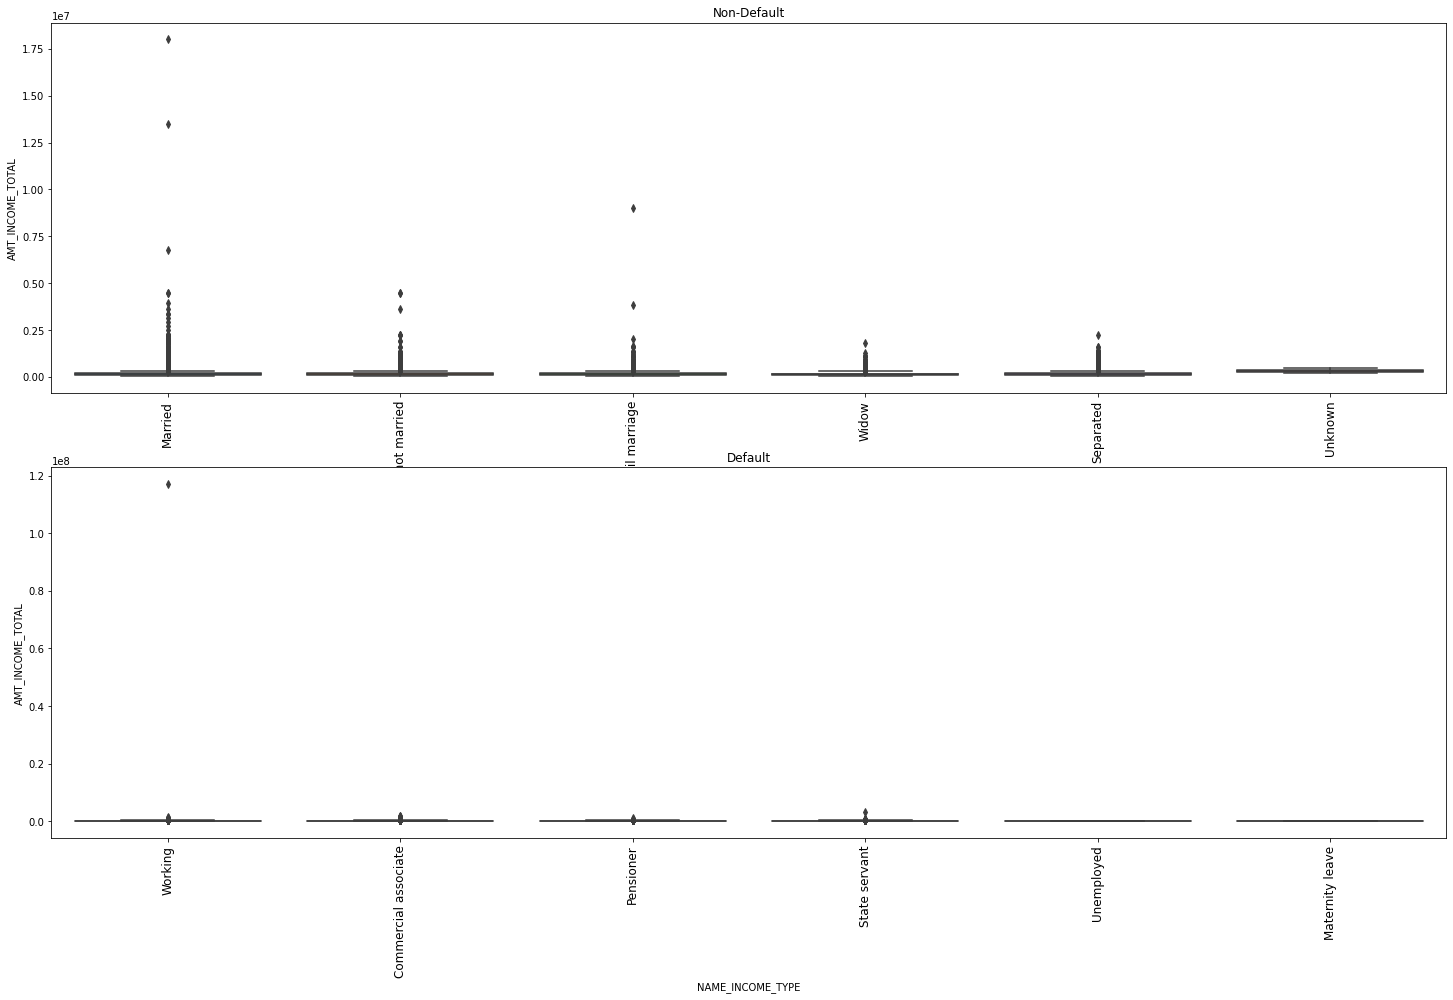

In [119]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_FAMILY_STATUS' , y = 'AMT_INCOME_TOTAL' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'AMT_INCOME_TOTAL')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

#### NAME_FAMILY_STATUS' - AMT_CREDIT

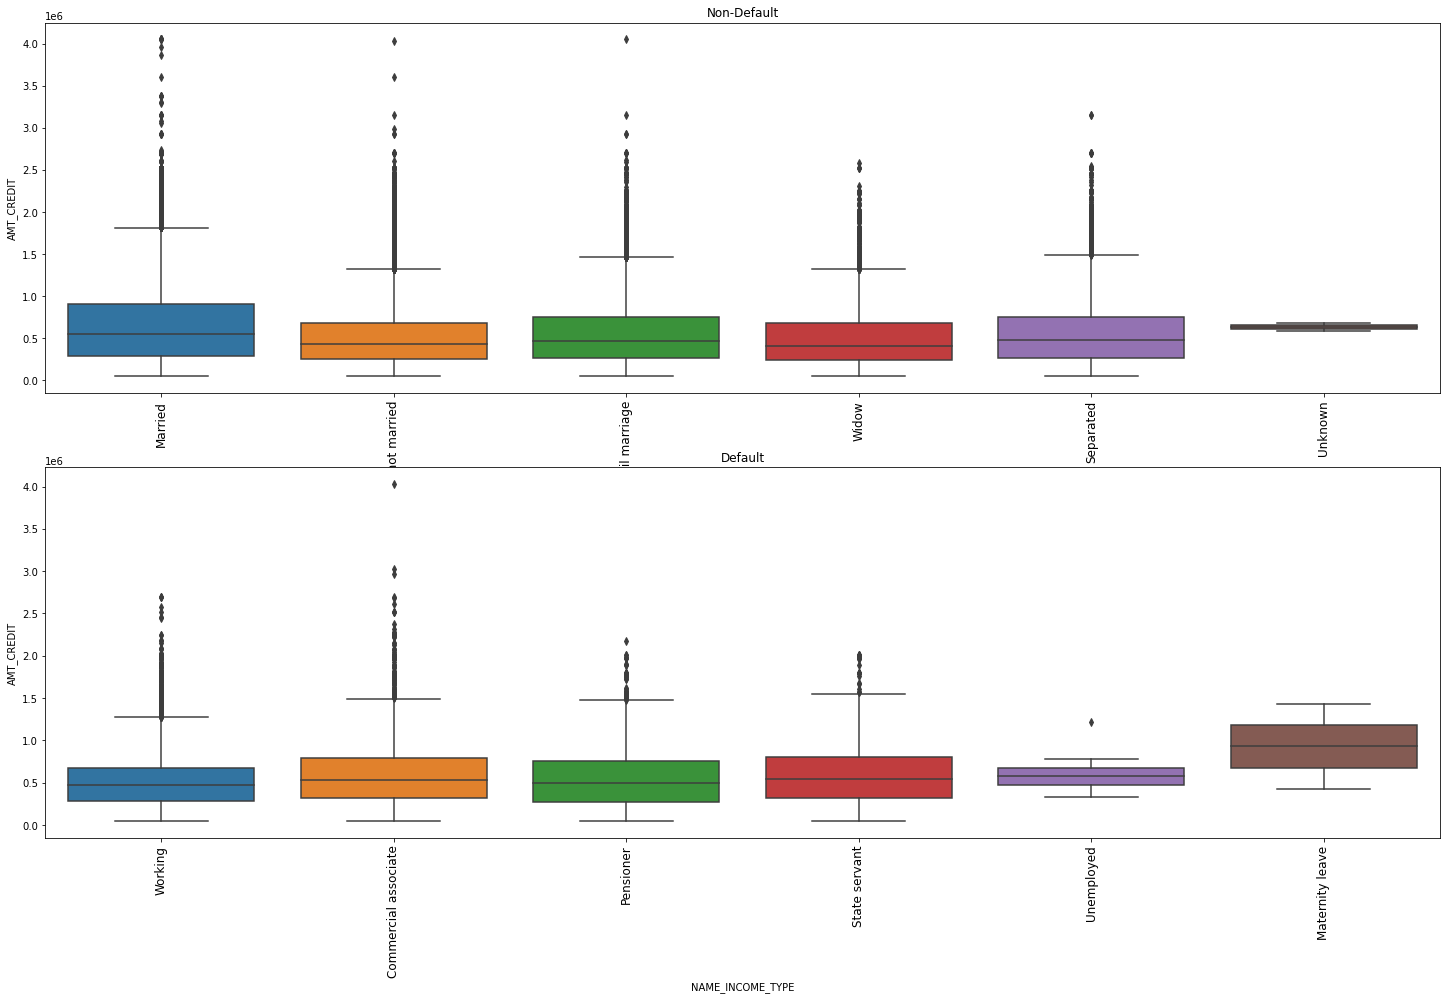

In [120]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_FAMILY_STATUS' , y = 'AMT_CREDIT' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'AMT_CREDIT')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

#### NAME_FAMILY_STATUS' -AMT_ANNUITY

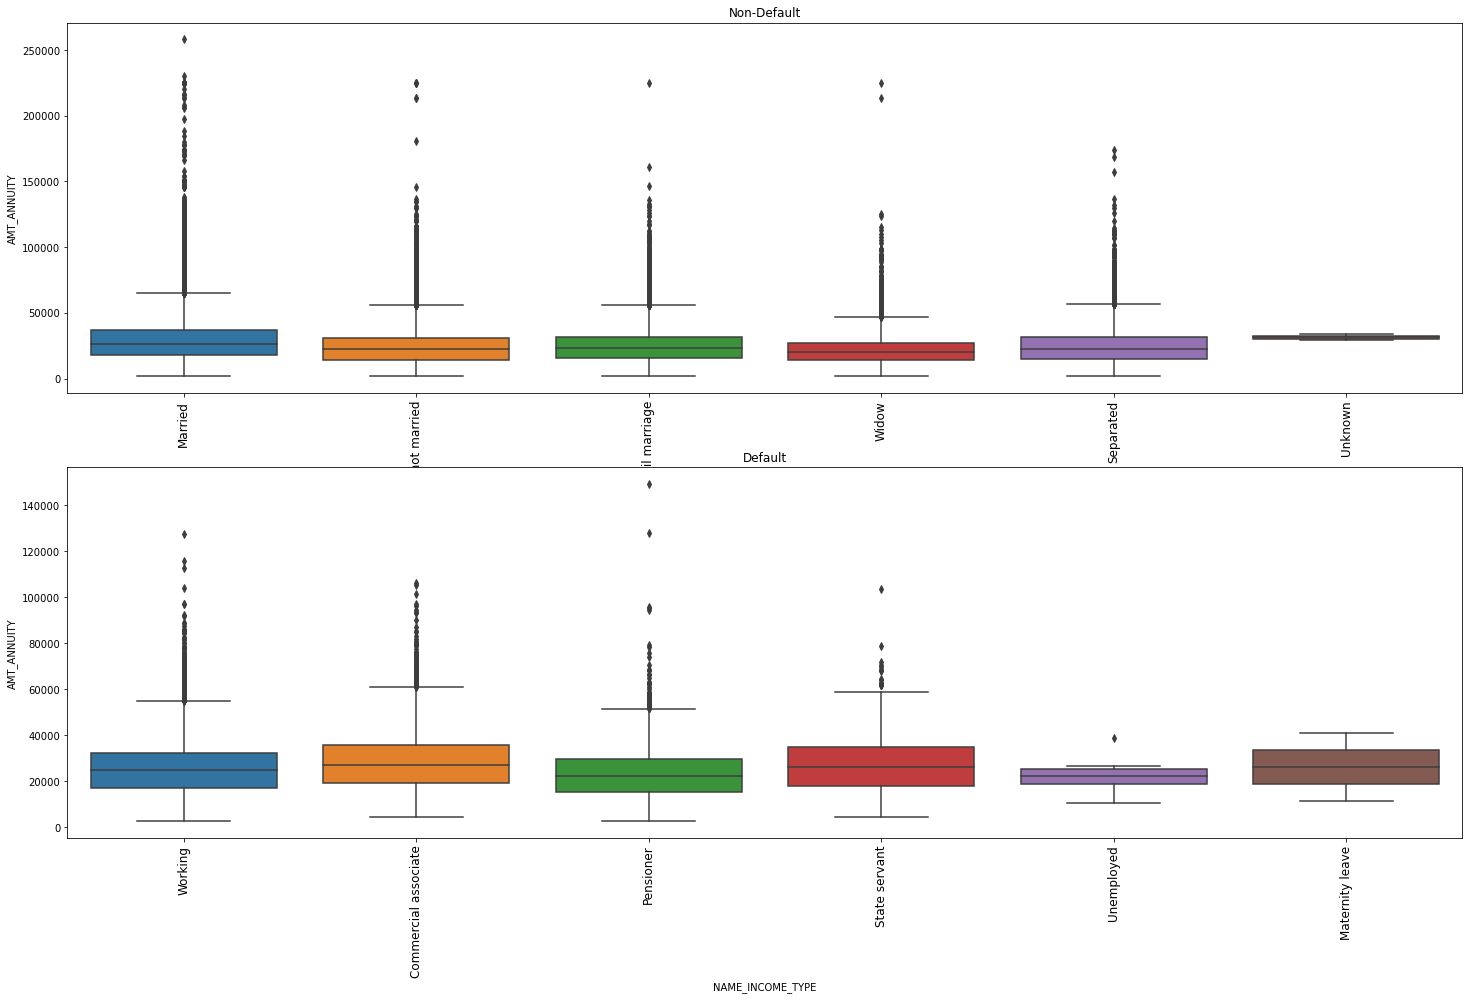

In [121]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_FAMILY_STATUS' , y = 'AMT_ANNUITY' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'AMT_ANNUITY')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

#### NAME_FAMILY_STATUS' - AMT_GOODS_PRICE

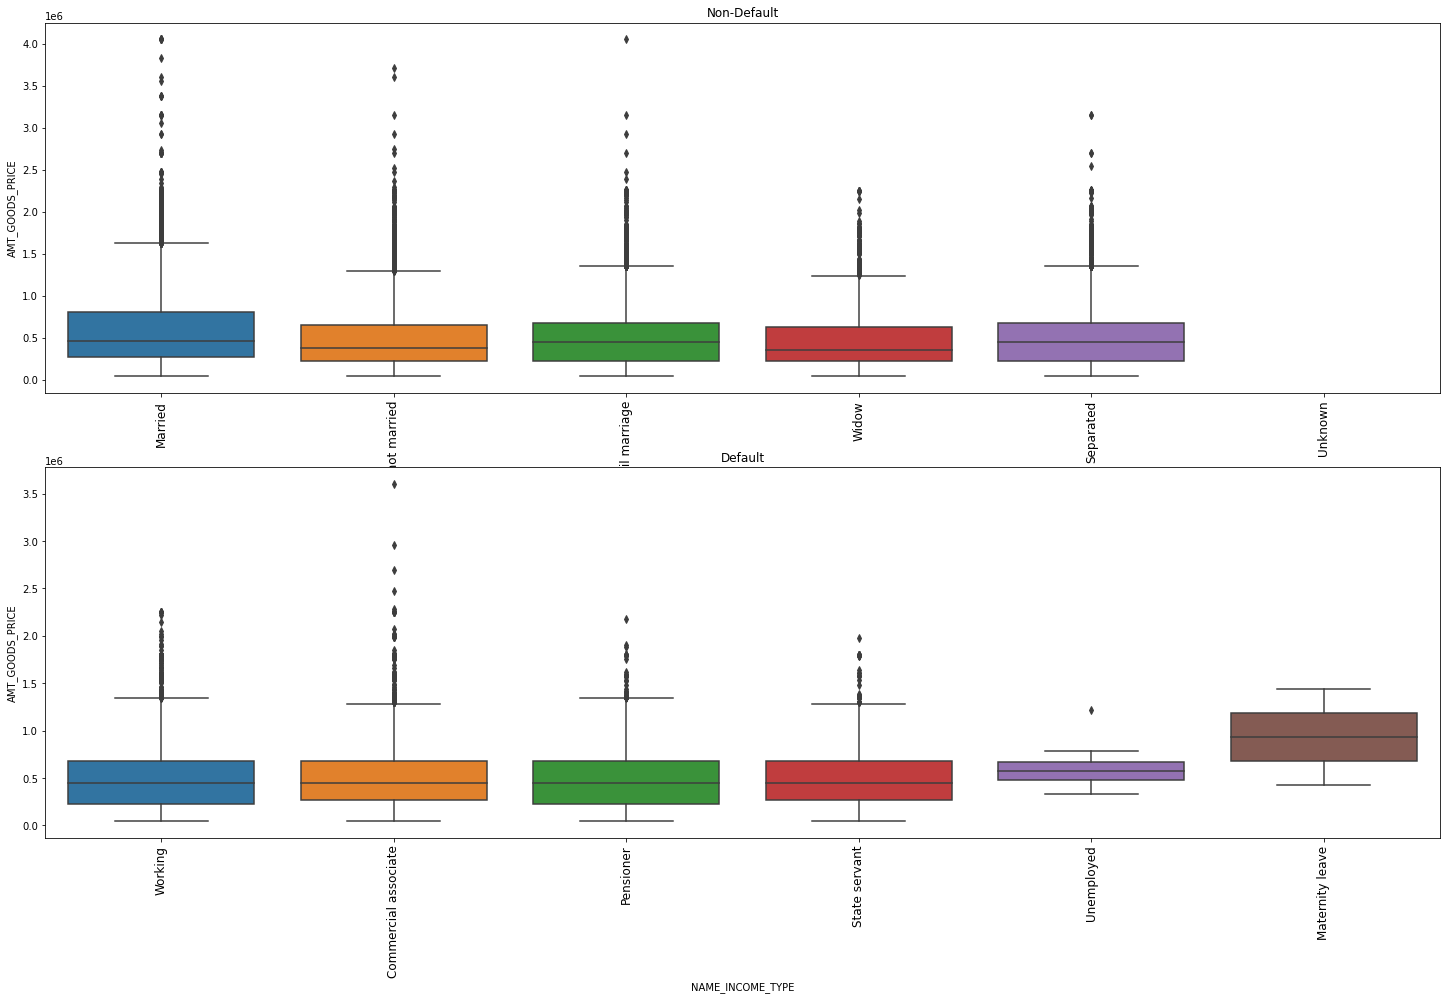

In [122]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_FAMILY_STATUS' , y = 'AMT_GOODS_PRICE' )
plt.xticks(rotation = 90 , fontsize = 12)  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'AMT_GOODS_PRICE')
plt.xticks(rotation = 90 , fontsize = 12)
plt.show()

#### Insights:

#### NAME_EDUCATION_TYPE - DAYS_BIRTH

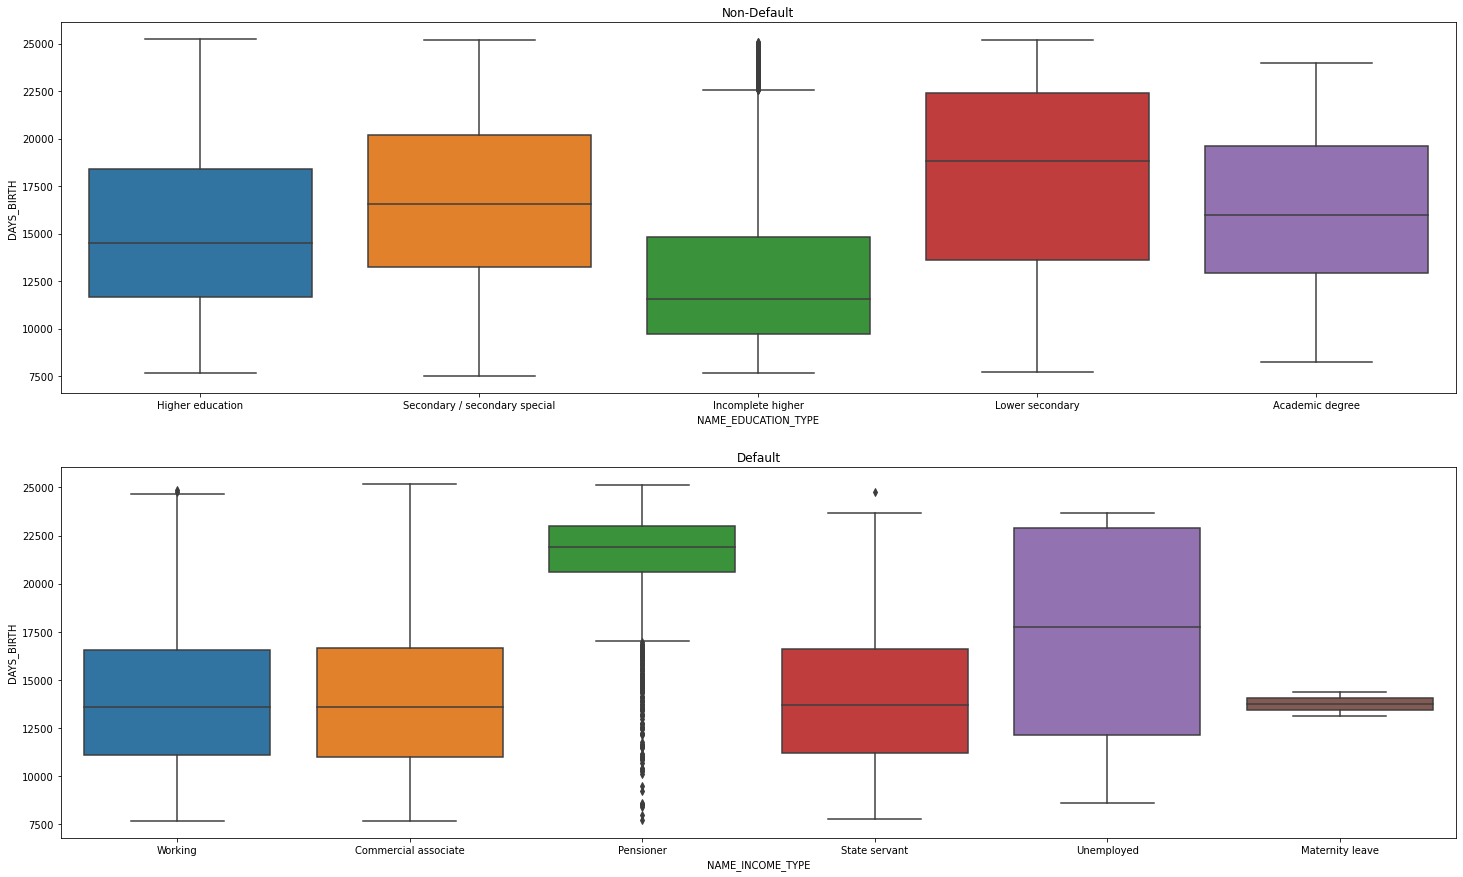

In [123]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_EDUCATION_TYPE' , y = 'DAYS_BIRTH' )
  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'DAYS_BIRTH')

plt.show()

#### Insights:

#### NAME_EDUCATION_TYPE - 'DAYS_EMPLOYED', 

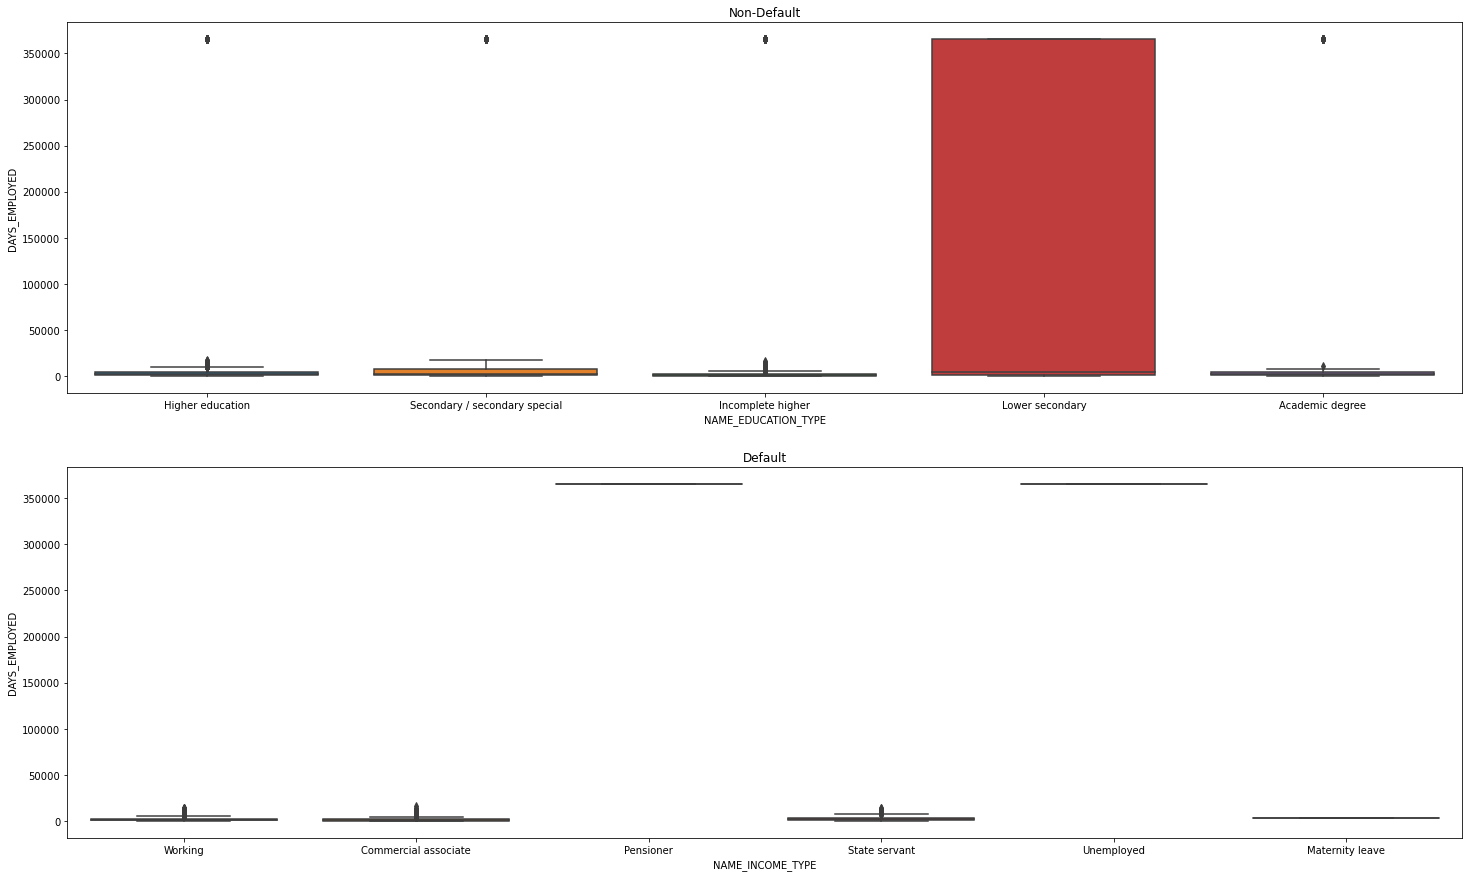

In [124]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_EDUCATION_TYPE' , y = 'DAYS_EMPLOYED' )
  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'DAYS_EMPLOYED')

plt.show()

#### Insights:

#### NAME_EDUCATION_TYPE -  AMT_INCOME_TOTAL

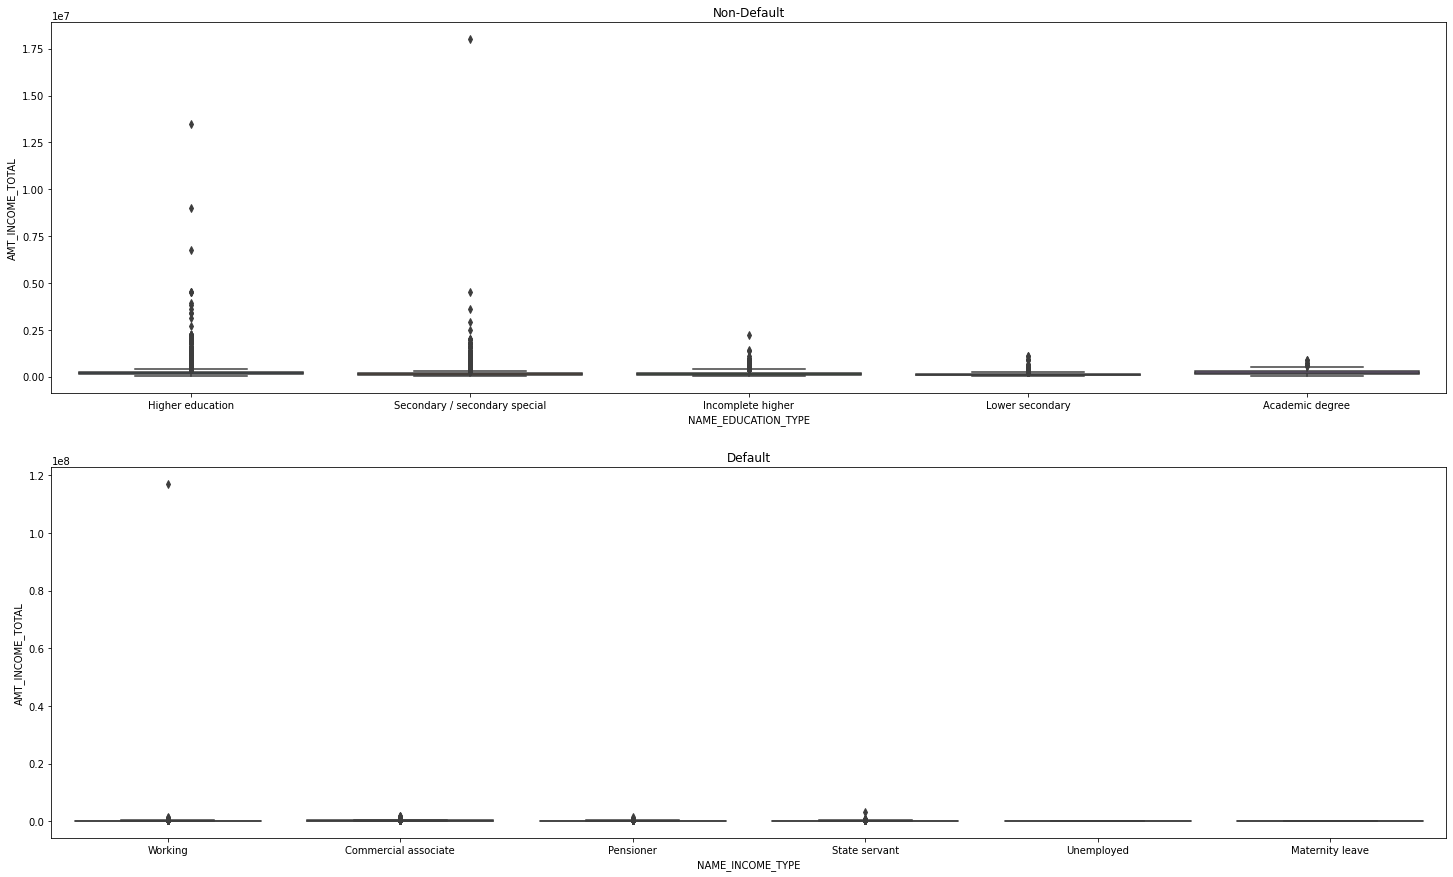

In [125]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_EDUCATION_TYPE' , y = 'AMT_INCOME_TOTAL' )
  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'AMT_INCOME_TOTAL')

plt.show()

#### Insights:

#### NAME_EDUCATION_TYPE  -  AMT_CREDIT

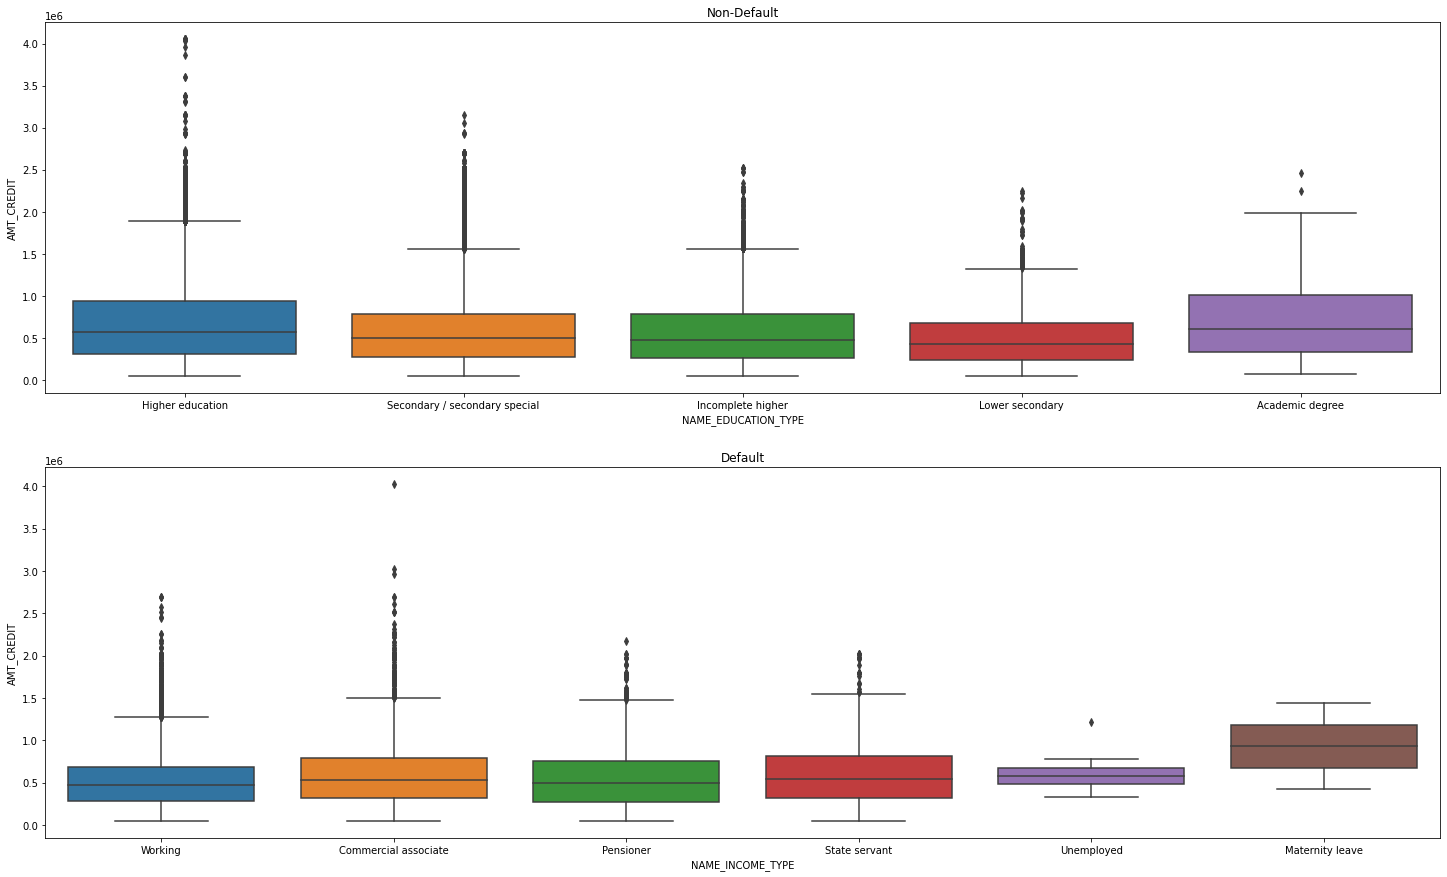

In [126]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_EDUCATION_TYPE' , y = 'AMT_CREDIT' )
  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'AMT_CREDIT')

plt.show()

#### Insights:

#### NAME_EDUCATION_TYPE  -  AMT_ANNUITY

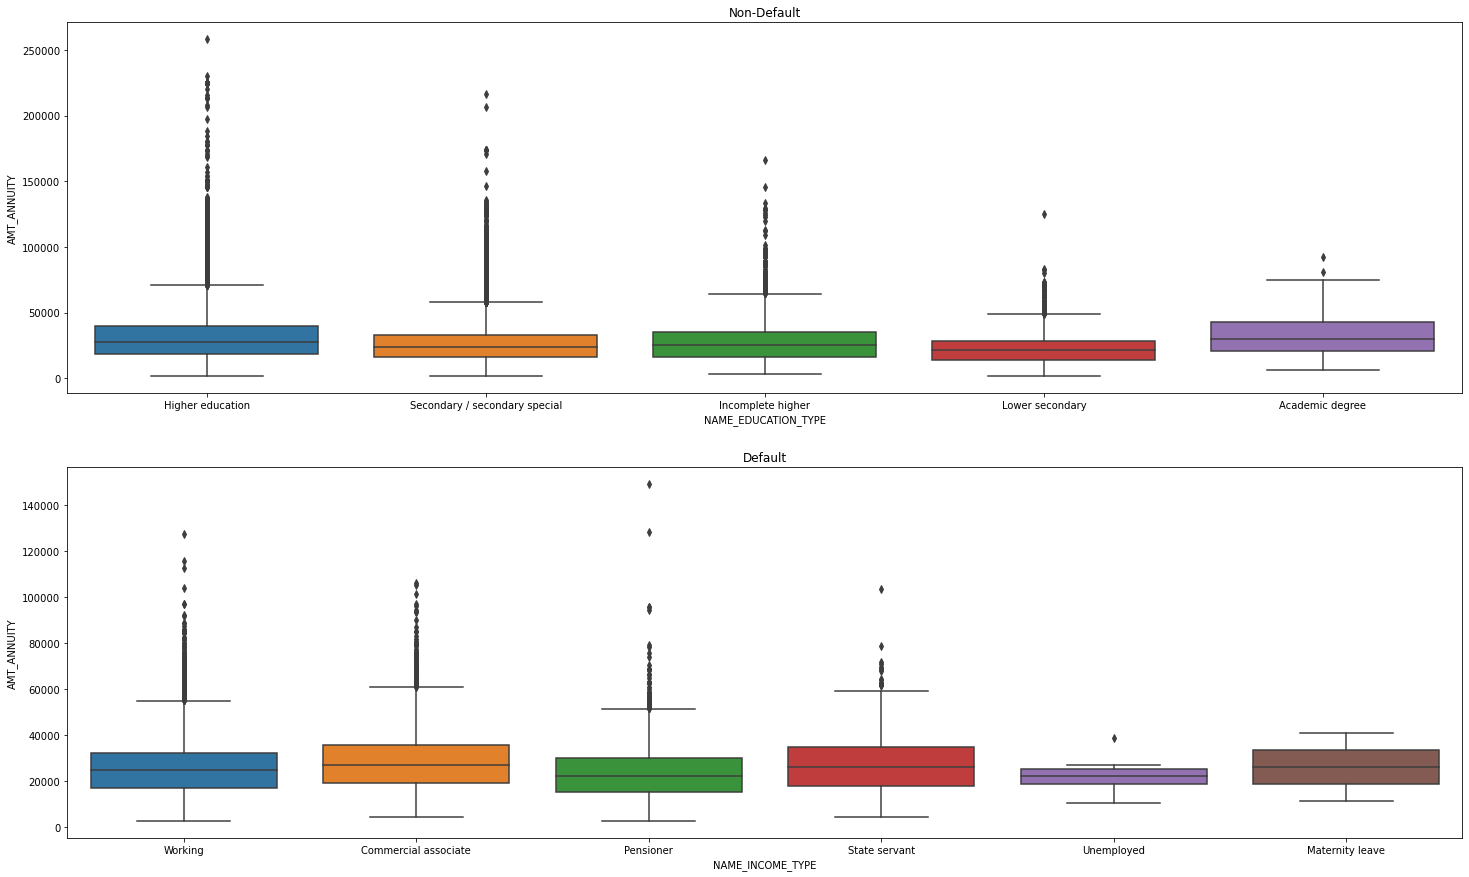

In [127]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_EDUCATION_TYPE' , y = 'AMT_ANNUITY' )
  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_INCOME_TYPE' , y = 'AMT_ANNUITY')

plt.show()

#### Insights:

#### 'WEEKDAY_APPR_PROCESS_START' - 'AMT_CREDIT'

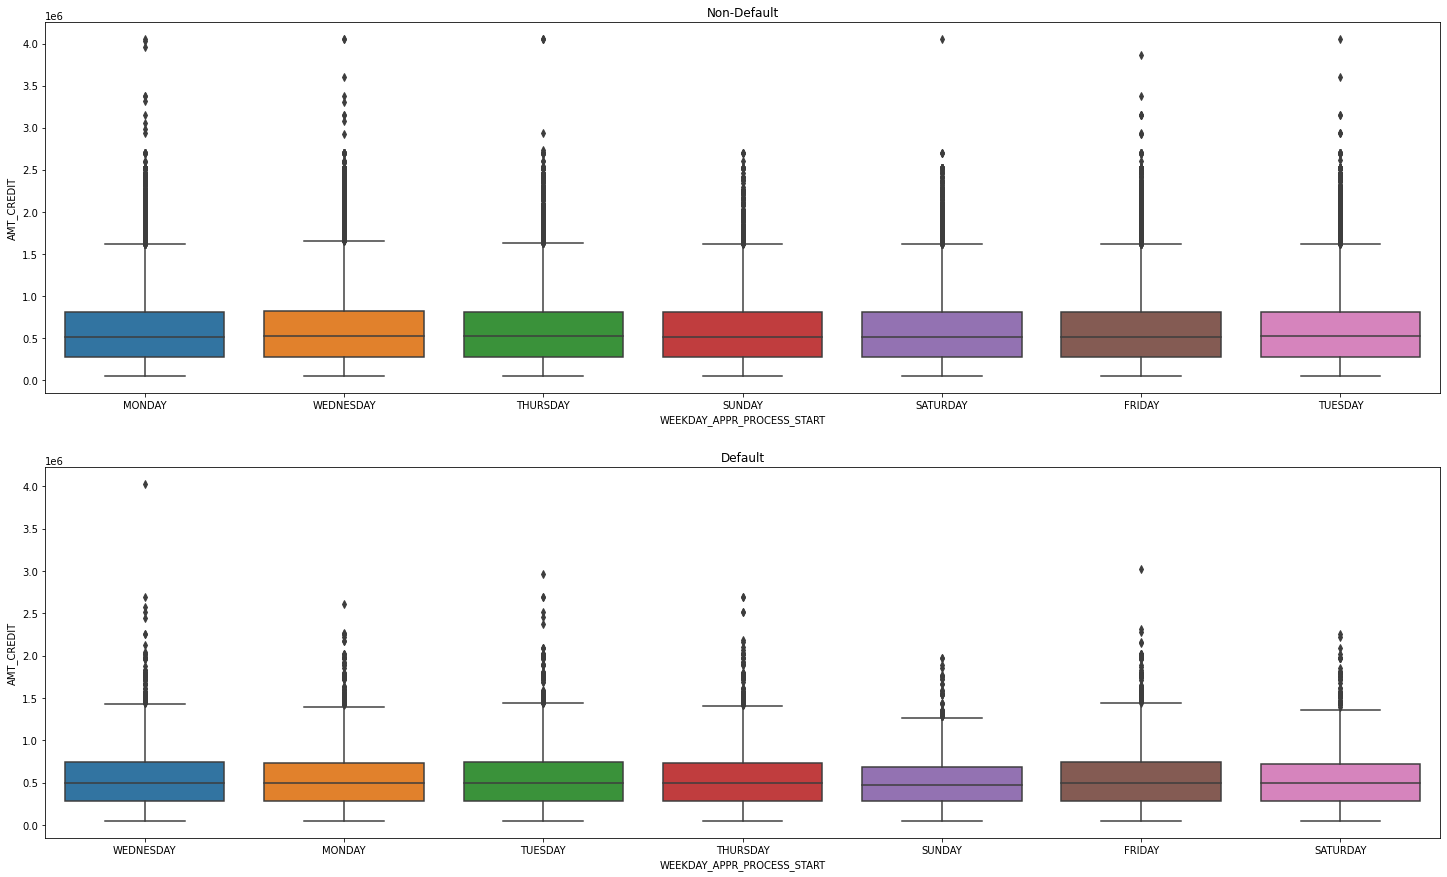

In [128]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'WEEKDAY_APPR_PROCESS_START' , y = 'AMT_CREDIT' )
  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'WEEKDAY_APPR_PROCESS_START' , y = 'AMT_CREDIT')

plt.show()

#### Insights:

#### 'WEEKDAY_APPR_PROCESS_START' -'DAYS_REGISTRATION', '

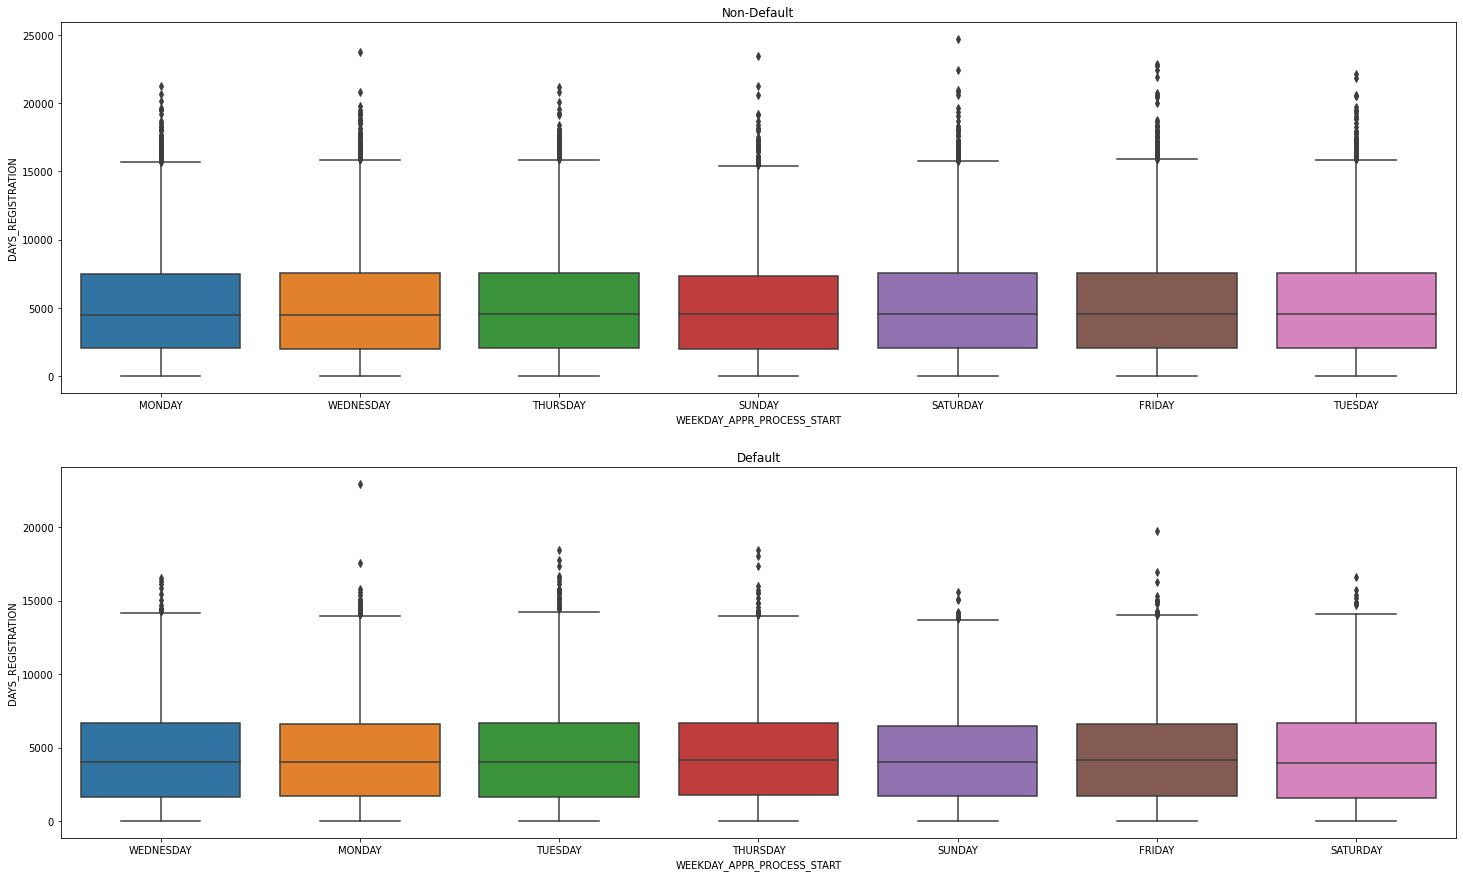

In [129]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'WEEKDAY_APPR_PROCESS_START' , y = 'DAYS_REGISTRATION' )
  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'WEEKDAY_APPR_PROCESS_START' , y = 'DAYS_REGISTRATION')

plt.show()

#### Insights:

#### 'WEEKDAY_APPR_PROCESS_START' - DAYS_ID_PUBLISH', 

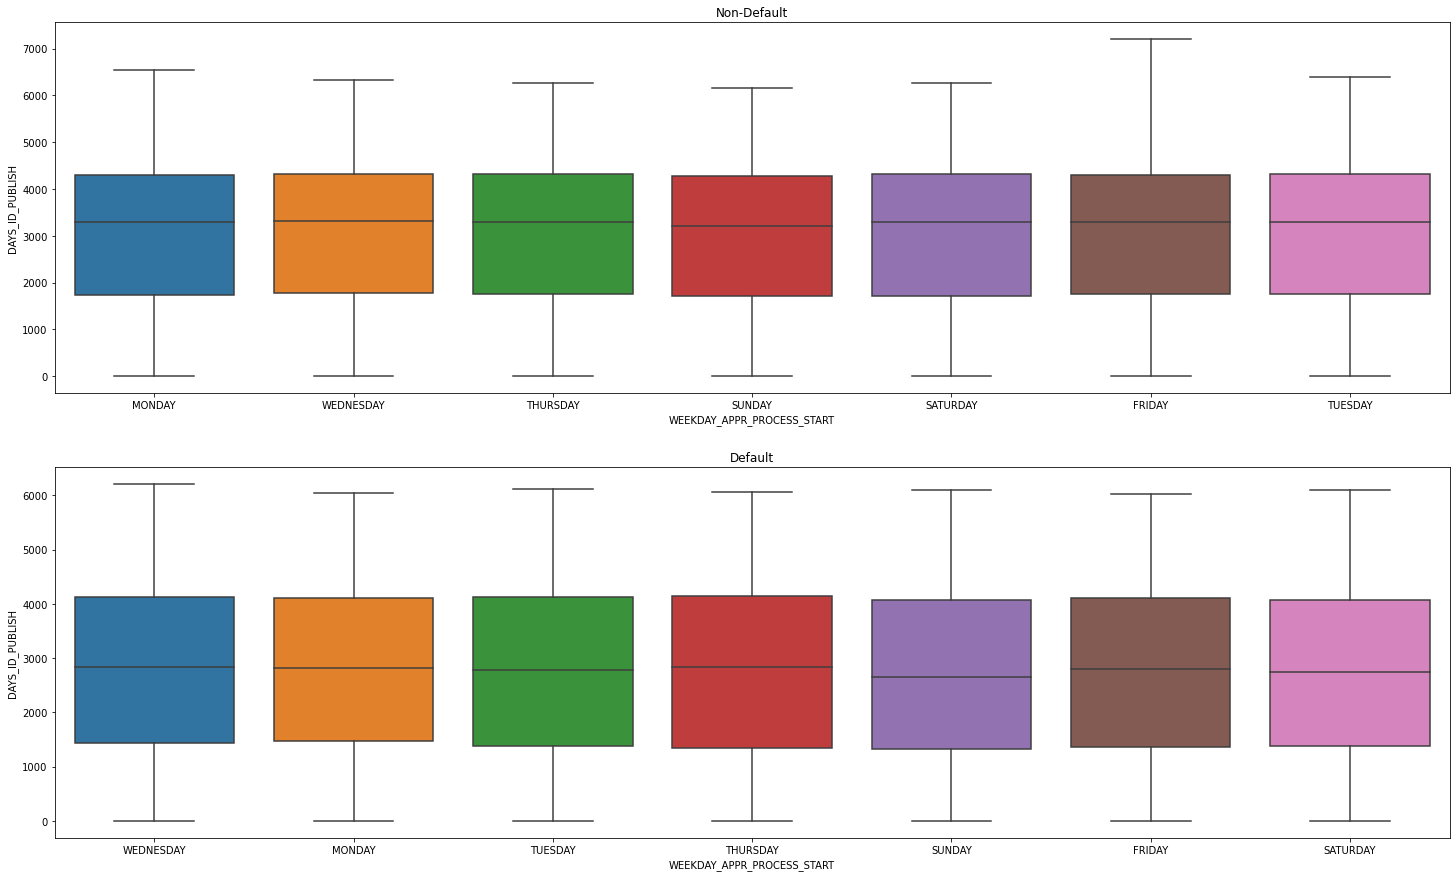

In [130]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'WEEKDAY_APPR_PROCESS_START' , y = 'DAYS_ID_PUBLISH' )
  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'WEEKDAY_APPR_PROCESS_START' , y = 'DAYS_ID_PUBLISH')

plt.show()

#### Insights:

#### 'WEEKDAY_APPR_PROCESS_START' -'HOUR_APPR_PROCESS_START',

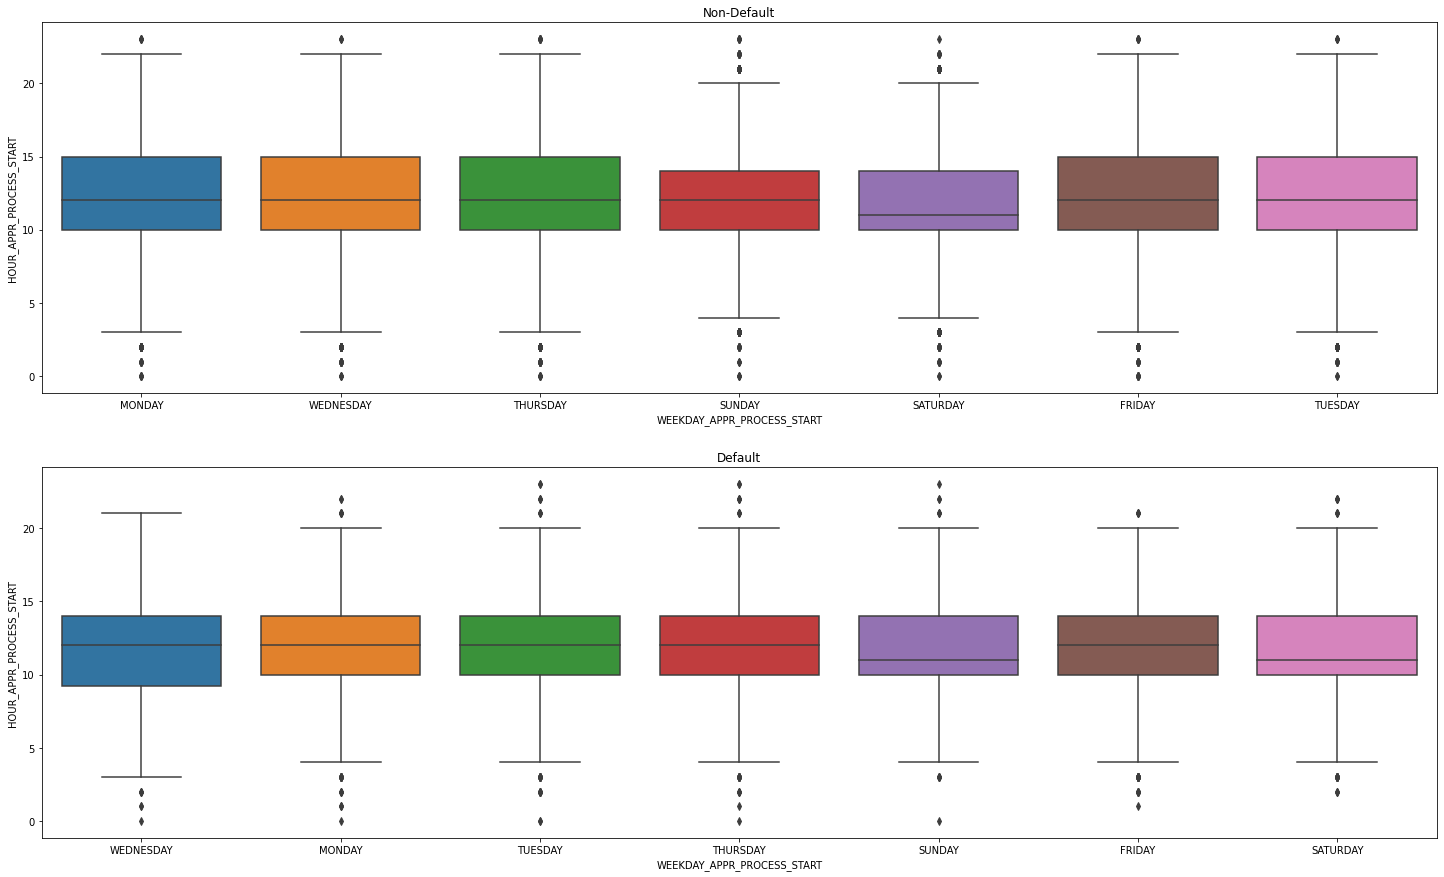

In [131]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'WEEKDAY_APPR_PROCESS_START' , y = 'HOUR_APPR_PROCESS_START' )
  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'WEEKDAY_APPR_PROCESS_START' , y = 'HOUR_APPR_PROCESS_START')

plt.show()

#### Insights:

#### NAME_TYPE_SUITE  - AMT_CREDIT

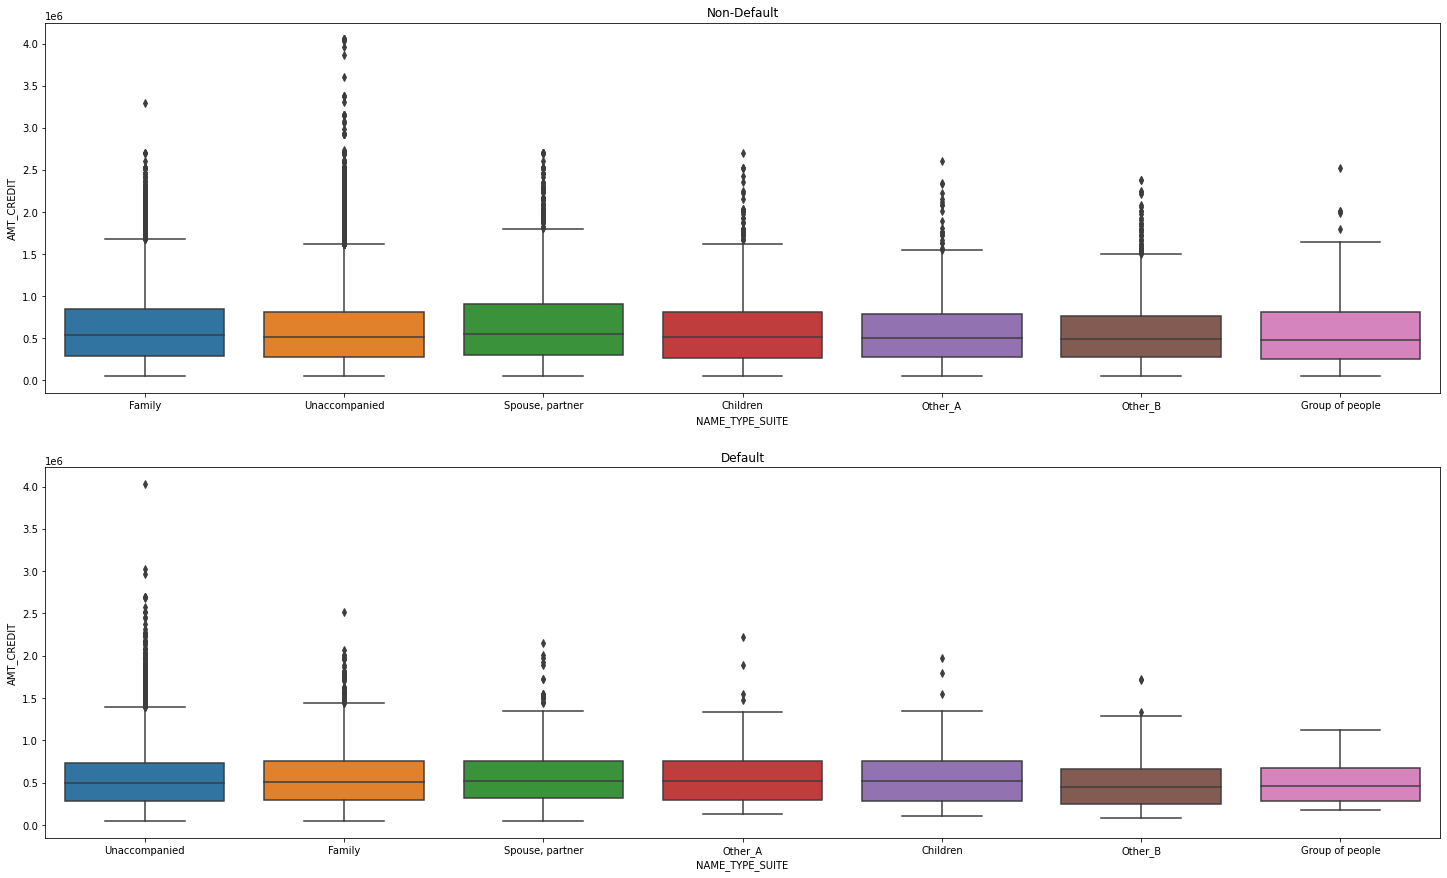

In [132]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_TYPE_SUITE' , y = 'AMT_CREDIT' )
  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_TYPE_SUITE' , y = 'AMT_CREDIT')

plt.show()

#### Insights:

#### NAME_TYPE_SUITE - AMT_INCOME_TOTAL

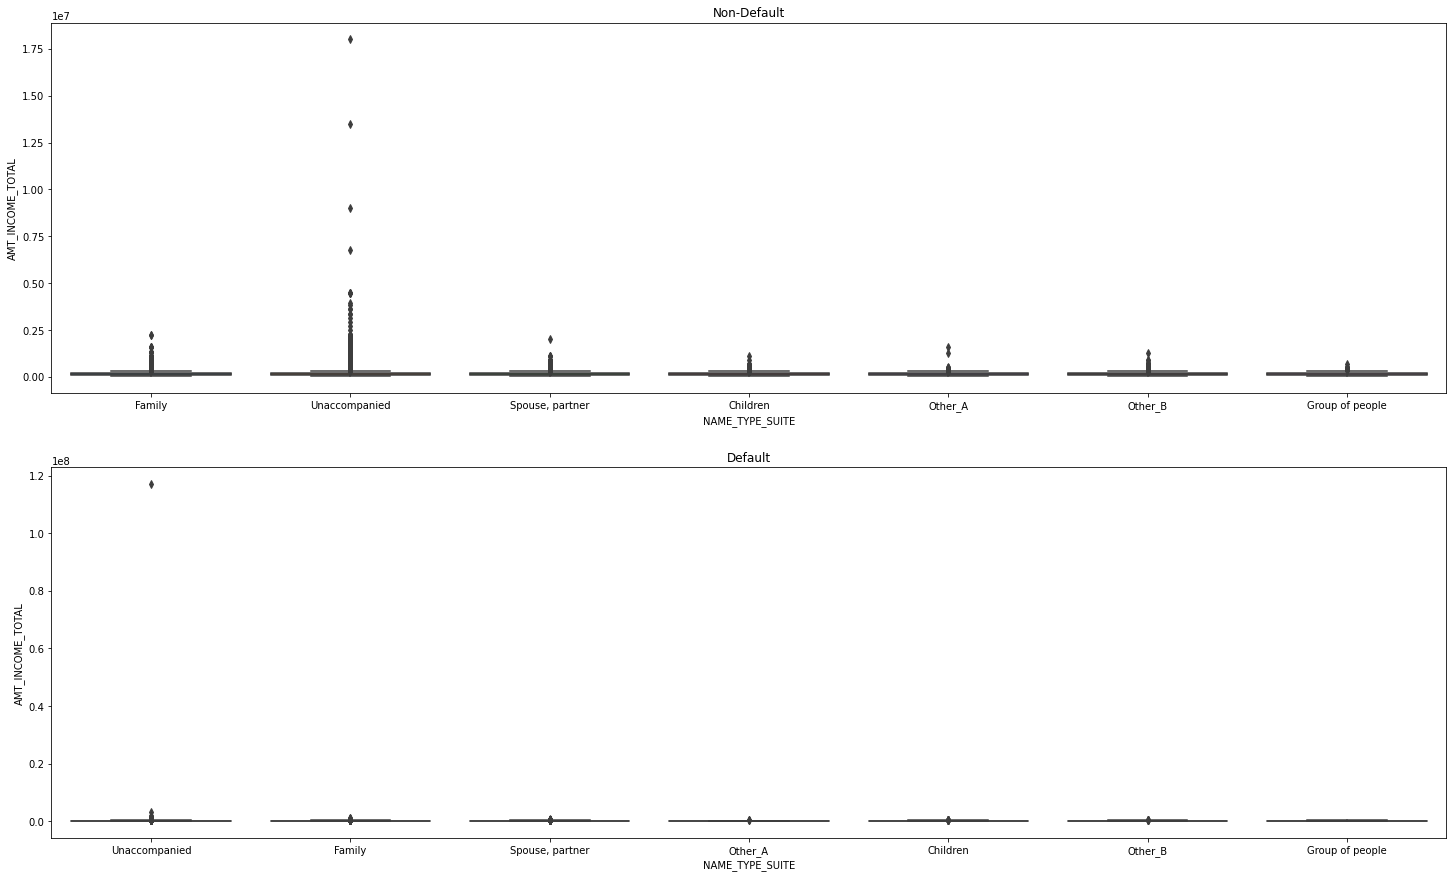

In [133]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_TYPE_SUITE' , y = 'AMT_INCOME_TOTAL' )
  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_TYPE_SUITE' , y = 'AMT_INCOME_TOTAL')

plt.show()

#### Insights:

#### NAME_TYPE_SUITE - 'AMT_ANNUITY', 

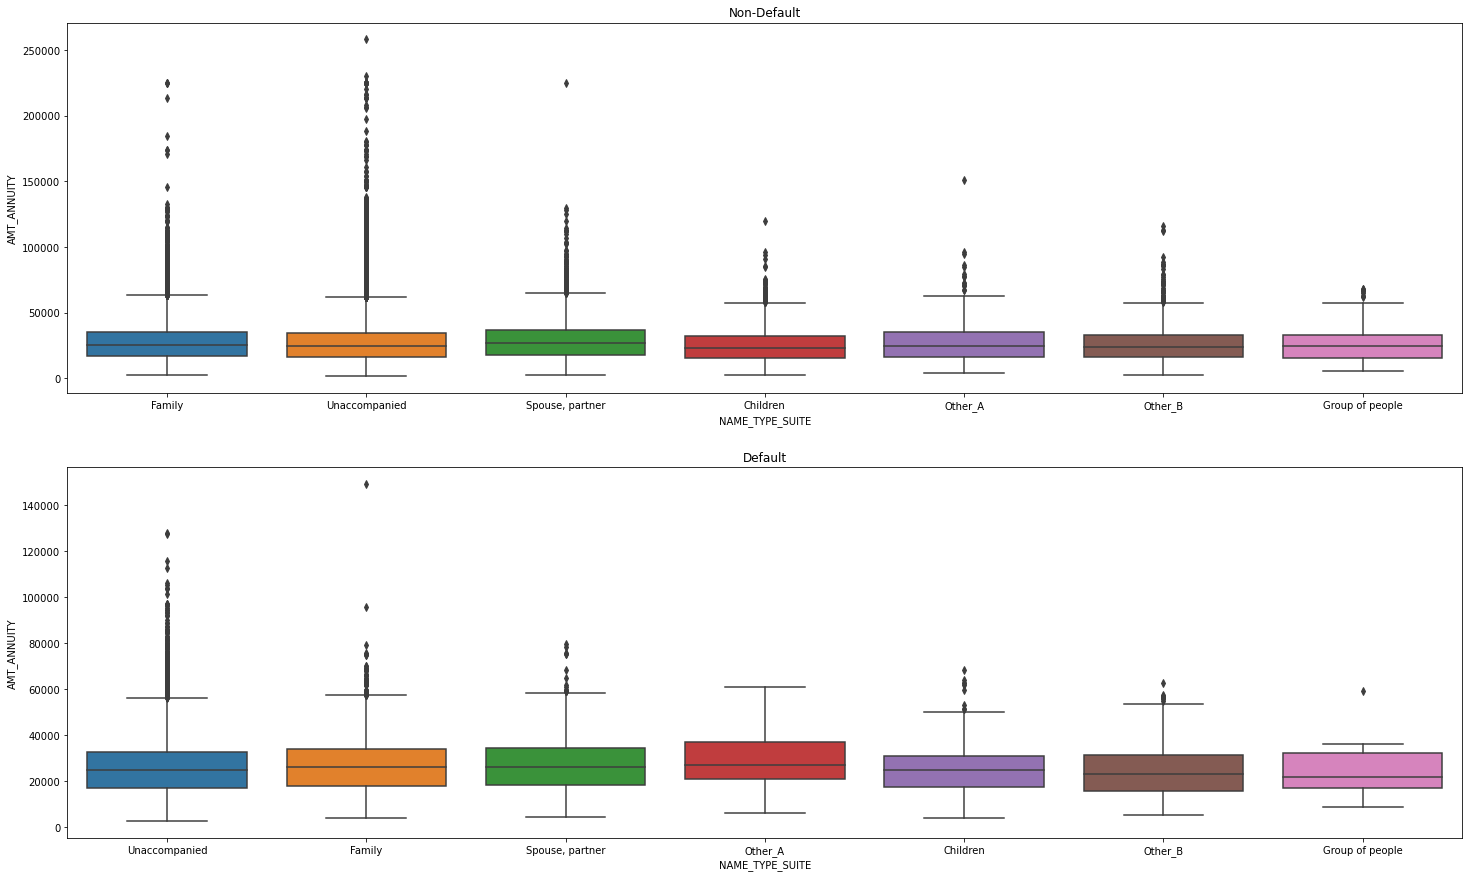

In [134]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_TYPE_SUITE' , y = 'AMT_ANNUITY' )
  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_TYPE_SUITE' , y = 'AMT_ANNUITY')

plt.show()

#### Insights:

#### NAME_TYPE_SUITE  -  'AMT_GOODS_PRICE'

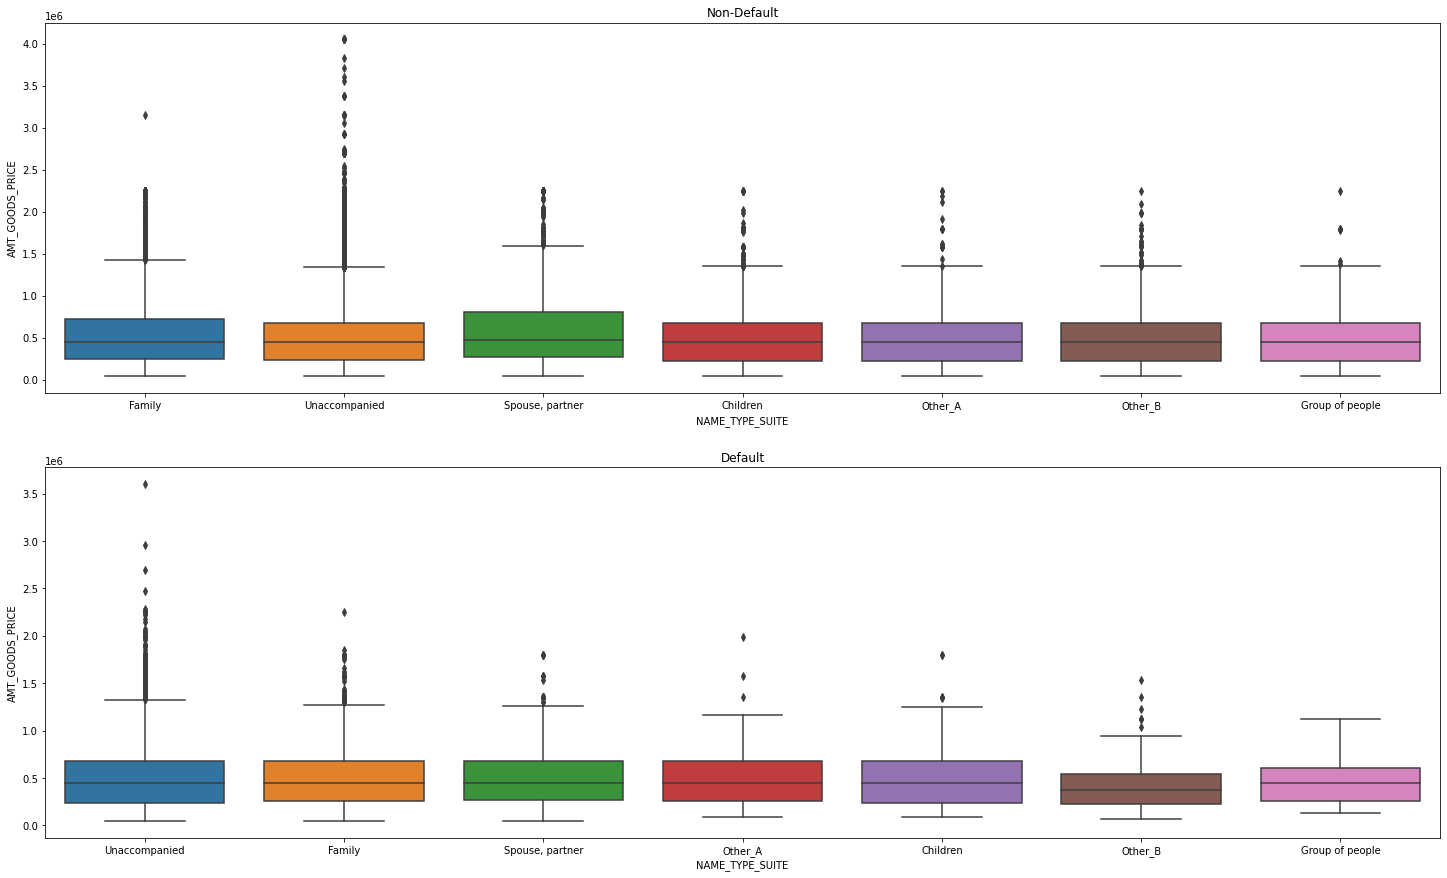

In [135]:
plt.figure(figsize = (25,15))

plt.subplot(2,1,1)
plt.title("Non-Default")
sns.boxplot(data = application_dataset_0 , x = 'NAME_TYPE_SUITE' , y = 'AMT_GOODS_PRICE' )
  
              
plt.subplot(2,1,2)
plt.title("Default")
sns.boxplot(data = application_dataset_1 , x = 'NAME_TYPE_SUITE' , y = 'AMT_GOODS_PRICE')

plt.show()

#### Insights:

### Continuos - Continous

<AxesSubplot:title={'center':'Default'}, xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL'>

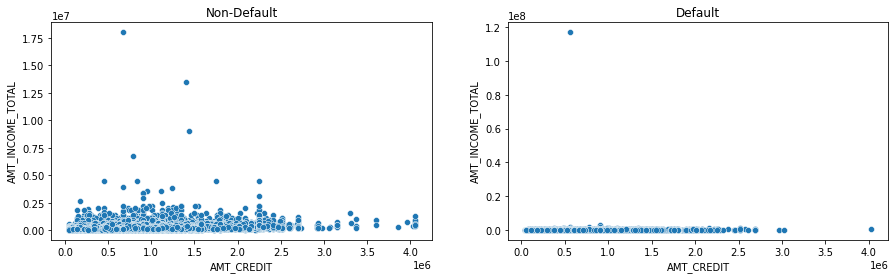

In [136]:
#Scatter plot

plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.scatterplot(data = application_dataset_0 , x = 'AMT_CREDIT', y = 'AMT_INCOME_TOTAL')
  
              
plt.subplot(1,2,2)
plt.title("Default")
sns.scatterplot(data = application_dataset_1 , x = 'AMT_CREDIT', y = 'AMT_INCOME_TOTAL')


### Catergorical - Categorical

<AxesSubplot:title={'center':'Default'}, xlabel='NAME_INCOME_TYPE', ylabel='count'>

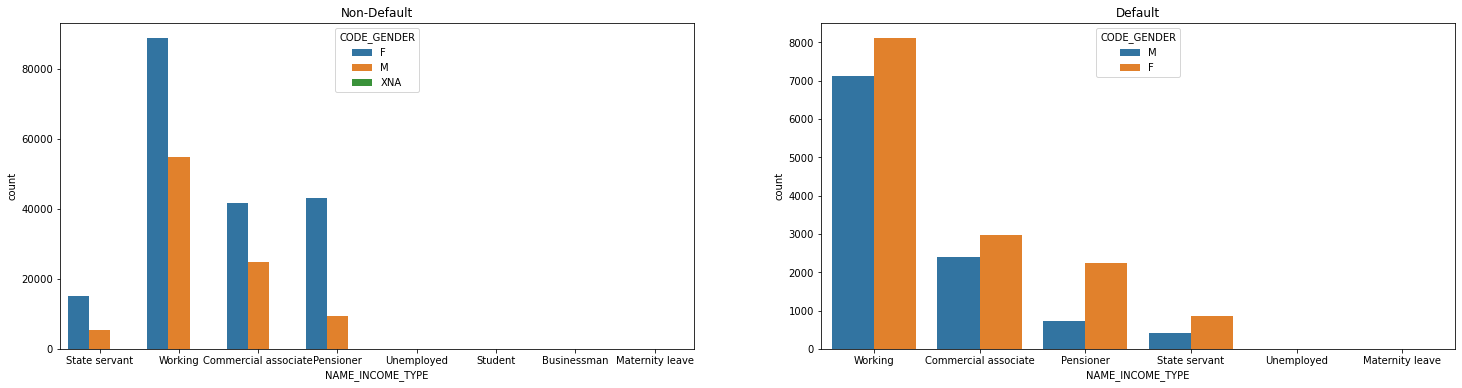

In [137]:
plt.figure(figsize = (25,6))

plt.subplot(1,2,1)
plt.title("Non-Default")
sns.countplot('NAME_INCOME_TYPE', data = application_dataset_0 , hue = 'CODE_GENDER')
  
              
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot('NAME_INCOME_TYPE', data = application_dataset_1 , hue = 'CODE_GENDER')

### Correlation

### Top 10 Correlated Variables : Target_0

In [138]:
application_dataset_0.corr()
corr_0 = application_dataset_0.corr()
corr_df = corr_0.where(np.triu(np.ones(corr_0.shape) , k = 1 ).astype (np.bool))
corr_df = corr_df.unstack().reset_index()
corr_df.columns = ['VAR1' , 'VAR_2' , 'Correlation']
corr_df.dropna(subset = ['Correlation'] , inplace = True)
corr_df['Correlation'] = round(corr_df['Correlation'],2).abs()
corr_df.sort_values(by = 'Correlation' , ascending = False).head(10)

,VAR1,VAR_2,Correlation
457,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
133,AMT_GOODS_PRICE,AMT_CREDIT,0.99
350,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
287,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
484,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
134,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
107,AMT_ANNUITY,AMT_CREDIT,0.77
215,DAYS_EMPLOYED,DAYS_BIRTH,0.63
318,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.54
344,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.54


### Observations:


### Top 10 Correlated Variables : Target_1

In [139]:
application_dataset_1.corr()
corr_1 = application_dataset_1.corr()
corr_df_1 = corr_1.where(np.triu(np.ones(corr_1.shape) , k = 1 ).astype (np.bool))
corr_df_1 = corr_df_1.unstack().reset_index()
corr_df_1.columns = ['VAR1' , 'VAR_2' , 'Correlation']
corr_df_1.dropna(subset = ['Correlation'] , inplace = True)
corr_df_1['Correlation'] = round(corr_df_1['Correlation'],2).abs()
corr_df_1.sort_values(by = 'Correlation' , ascending = False).head(10)

,VAR1,VAR_2,Correlation
457,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
133,AMT_GOODS_PRICE,AMT_CREDIT,0.98
350,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
287,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
484,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
107,AMT_ANNUITY,AMT_CREDIT,0.75
134,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
215,DAYS_EMPLOYED,DAYS_BIRTH,0.58
344,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.45
318,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.44


### Observations:

## Read Previous_Application.CSV Files from Dataset Directory

In [140]:
previous_file_path = os.path.join(os.getcwd(), os.getcwd()+"/Datasets", "previous_application.csv")

In [141]:
previous_file_path

'C:\\Users\\Gayathri\\Desktop\\UpGrad\\CREDIT-EDA\\Credit-EDA/Datasets\\previous_application.csv'

In [142]:
previous_dataset = pd.read_csv(previous_file_path)

In [143]:
previous_dataset.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
previous_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Basic stats about rows and columns and Missing values:

In [145]:
previous_dataset.shape

(1670214, 37)

### Statistics Summary of the Numerical Data Columns:

In [146]:
previous_dataset.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### From the Shape,We Can See that 1670214 rows and 37 columns, these 37 columns may not be useful for the ### analysis,we can eliminate irrelevant columns and perform analysis on the selected ones which are important to the business logic.

### Missing values Identification:



### 1 . Calculate the Missing values percentage formula = (missing values in each row/ total rows) * 100 for each and every column.

In [147]:
missing_values_previous = (previous_dataset.isnull().sum()/len(previous_dataset))*100

In [148]:
missing_values_previous

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### RATE_INTEREST_PRIMARY          99.643698
#### RATE_INTEREST_PRIVILEGED       99.643698

#### Need to understand if the specific variables data helps in Accepting or Rejecting the Loan.

In [149]:
## drop the columns whenever missing values greater than 40% because we cant use these for analysis

columns_to_drop_previous = previous_dataset.columns[previous_dataset.isnull().sum() >= (0.40*len(previous_dataset))]
len(columns_to_drop_previous)

11

In [150]:
previous_dataset.drop(columns_to_drop_previous, inplace = True, axis = 1)

In [151]:
previous_dataset.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

### Eliminate the records if missing values percentage greater  than 0% and less than or equal to 5%.
### since these are very less records proportion to total records,we can eliminate the records..!!

In [152]:
Five_percentage_columns_previous = previous_dataset.columns[(previous_dataset.isnull().sum() <= (0.05*len(previous_dataset)))&(previous_dataset.isnull().sum() > (0*len(previous_dataset)))]

In [153]:
Five_percentage_columns_previous

Index(['AMT_CREDIT', 'PRODUCT_COMBINATION'], dtype='object')

In [154]:
## verify the above records drop the above columns wherever it is null.
(previous_dataset.isnull().sum()/len(previous_dataset))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [155]:
## drop the missing values records for the above columns 
## columns used : ['AMT_CREDIT', 'PRODUCT_COMBINATION']
previous_dataset = previous_dataset.dropna(subset=Five_percentage_columns_previous).reset_index(drop=True)

In [156]:
previous_dataset.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [157]:
previous_dataset.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.669867e+06,1.669867e+06,1.297978e+06,1.669867e+06,1.669867e+06,1.284699e+06,1.669867e+06,1.669867e+06,1.669867e+06,1.669867e+06,1.297983e+06
mean,1.923089e+06,2.783587e+05,1.595513e+04,1.752703e+05,1.961547e+05,2.278473e+05,1.248412e+01,9.964668e-01,-8.807762e+02,3.140069e+02,1.605409e+01
std,5.325994e+05,1.028150e+05,1.478214e+04,2.927993e+05,3.185951e+05,3.153966e+05,3.334075e+00,5.933577e-02,7.791505e+02,7.128183e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461858e+06,1.893300e+05,6.321780e+03,1.879650e+04,2.419200e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923117e+06,2.787210e+05,1.125000e+04,7.105500e+04,8.055000e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384284e+06,3.675140e+05,2.065842e+04,1.804410e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


## Conversion of negative to positive:

In [158]:
#DAYS_DECISION,SELLERPLACE_AREA,DAYS_FIRST_DRAWING

previous_dataset['DAYS_DECISION'] = previous_dataset['DAYS_DECISION'].abs()
previous_dataset['SELLERPLACE_AREA'] = previous_dataset['SELLERPLACE_AREA'].abs()

### Why should we convert the above columns into positive values:
    
#### 1.Days & Sellar Area cannot be negative, hence to convert these Columns into positive values.

## Missing values Imputation for categorical Variables:

In [159]:
## identify the categorical columns
categorical_columns_previous = previous_dataset.select_dtypes(include=["bool","object","category"]).columns

In [160]:
categorical_columns_previous

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [161]:
## Null percentage for categorical columns
((previous_dataset[categorical_columns_previous].isnull().sum())/len(previous_dataset))*100

NAME_CONTRACT_TYPE             0.0
WEEKDAY_APPR_PROCESS_START     0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

#### No Missing values present in the Categorical Columns

## Missing values Imputation for numerical columns:

In [162]:
numerical_columns_previous = previous_dataset.select_dtypes(include=["number"]).columns

In [163]:
numerical_columns_previous

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

In [164]:
((previous_dataset[numerical_columns_previous].isnull().sum())/len(previous_dataset))*100

SK_ID_PREV                  0.000000
SK_ID_CURR                  0.000000
AMT_ANNUITY                22.270576
AMT_APPLICATION             0.000000
AMT_CREDIT                  0.000000
AMT_GOODS_PRICE            23.065789
HOUR_APPR_PROCESS_START     0.000000
NFLAG_LAST_APPL_IN_DAY      0.000000
DAYS_DECISION               0.000000
SELLERPLACE_AREA            0.000000
CNT_PAYMENT                22.270277
dtype: float64

### AMT_ANNUITY - Median

### AMT_GOODS - Median

### CNT_PAYMENT - Mode

#### All categorical with bar   
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.351475
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000

## Categorical 

#### ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']

